In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from poliastro.core.angles import M_to_E, E_to_nu
from poliastro.bodies import Sun
from poliastro.twobody import Orbit
from astropy.constants import G
import pandas as pd
from astropy.time import Time
from poliastro.bodies import Body
import emcee
from astropy.units import Quantity
from kepler_fxs import (
    solve_true_anomaly, ra_dec_to_xy, forward_model,
    log_prior, log_likelihood, log_probability
)

In [2]:
# Problem 2

# Orbital parameters
t = 2025.0 * u.yr
t_p = 2002.33 * u.yr
P = 16.00 * u.yr
e = 0.8839

# Solve Kepler's equation and get true anomaly
nu, M, E = solve_true_anomaly(t, t_p, P, e)

# Display results
print("Mean Anomaly M  =", M.to(u.deg))
print("Eccentric Anomaly E =", E.to(u.deg))
print("True Anomaly ν =", nu.to(u.deg))

Mean Anomaly M  = 150.07500000000164 deg
Eccentric Anomaly E = 164.01854704711513 deg
True Anomaly ν = 176.00831452728605 deg


In [3]:
# Problem 4

# Load Data

data = pd.read_csv("AssigmentDistance2SgrA_mockObservations.csv")

data = data.rename(columns={
    "Delta R.A. [as] (0.01as error)": "RA_offset",
    "Delta Dec. [as] (0.01as error)": "Dec_offset",
    "vz [km/s] (10km/s error)": "vz"
})

data["Time of Observation"] = pd.to_datetime(data["Time of Observation"])
obs_times = Time(data["Time of Observation"])

print('done')

done


In [4]:
D = 8000 * u.pc  # Distance to Sgr A*
x, y = ra_dec_to_xy(data["RA_offset"], data["Dec_offset"], D)

data["x_AU"] = x
data["y_AU"] = y

print(x[0])

obs_times         # time values as Astropy Time
data["x_AU"] = data["x_AU"].values / u.AU
x_obs = data["x_AU"]
data["y_AU"] = data["y_AU"].values / u.AU
y_obs = data["y_AU"]
data["vz_AU"] = data["vz"].values
vz_obs = data["vz_AU"]


print(data["vz_AU"][0])

#print(x_obs[0])

trial_params = {
    "M": 4e6,
    "D": 8000,
    "a": 0.123 * 8000,
    "ecc": 0.88,
    "inc": 135,
    "raan": 225,
    "argp": 64,
    "tp": 2002,
}

initial_theta = np.array([
    trial_params["M"],
    trial_params["D"],
    trial_params["a"],
    trial_params["ecc"],
    trial_params["inc"],
    trial_params["raan"],
    trial_params["argp"],
    trial_params["tp"]
])
print('done')

-213.793214097772 AU
-1621.7835772793485
done


In [5]:
nwalkers = 32
ndim = len(initial_theta)
nsteps = 2000

spread = np.array([
    1e4,   # mass
    100,   # distance
    10,    # a
    0.005, # e
    0.5,   # i
    2,     # raan
    2,     # argp
    0.1    # tp
])
pos = initial_theta + np.random.randn(nwalkers, ndim) * spread

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability,
    args=(obs_times, x_obs, y_obs, vz_obs, trial_params["D"])
)

sampler.run_mcmc(pos, nsteps, progress=True)

samples = sampler.get_chain(discard=700, thin=30, flat=True)
print(samples.shape)

  1%|▏                                      | 11/2000 [00:22<1:06:44,  2.01s/it]

Rejected e: 1.0129326777021666
Rejected e: 1.0534962252464681
Rejected D: 4492.473511517579


  1%|▎                                      | 13/2000 [00:25<1:05:40,  1.98s/it]

Rejected e: 1.0051569227168275
Rejected e: 1.005894353802586


  1%|▎                                      | 15/2000 [00:29<1:06:03,  2.00s/it]

Rejected D: 2964.168768233222
Rejected e: 1.00529494885954


  1%|▎                                      | 16/2000 [00:31<1:04:55,  1.96s/it]

Rejected e: 1.0216588826521158


  1%|▎                                      | 17/2000 [00:33<1:04:46,  1.96s/it]

Rejected e: 1.1413103195190077
Rejected D: 4725.016005014957
Rejected argp: -14.576520038687832


  1%|▎                                      | 18/2000 [00:35<1:03:50,  1.93s/it]

Rejected argp: -17.401792831828033
Rejected D: 4805.921417421872


  1%|▎                                      | 19/2000 [00:37<1:02:53,  1.90s/it]

Rejected D: 4900.471868625666
Rejected argp: -5.756197361097108


  1%|▍                                      | 20/2000 [00:39<1:05:01,  1.97s/it]

Rejected argp: -27.2733572796985
Rejected argp: -1.302354024903643
Rejected D: 4137.826027478533


  1%|▍                                      | 21/2000 [00:41<1:05:22,  1.98s/it]

Rejected argp: -45.01454689720825


  1%|▍                                      | 22/2000 [00:43<1:04:59,  1.97s/it]

Rejected D: 3677.5293659186646
Rejected argp: -2.575237932470891


  1%|▍                                      | 23/2000 [00:45<1:05:26,  1.99s/it]

Rejected argp: -16.83877310721266
Rejected e: 1.0028942276087216


  1%|▍                                      | 24/2000 [00:47<1:04:52,  1.97s/it]

Rejected D: 3707.8876684808884


  1%|▍                                      | 25/2000 [00:49<1:05:24,  1.99s/it]

Rejected argp: -11.584679677905328
Rejected D: 2961.743410511741


  1%|▌                                      | 26/2000 [00:51<1:04:06,  1.95s/it]

Rejected e: 1.0650877408568458
Rejected argp: -3.389721228203719
Rejected D: 1283.4057143348655
Rejected e: 1.1783967234371462


  1%|▌                                      | 27/2000 [00:53<1:03:17,  1.92s/it]

Rejected D: 3445.529741750921
Rejected D: 3006.1322446236945
Rejected argp: -3.9404374296563134
Rejected e: 1.0183241458929413


  1%|▌                                      | 28/2000 [00:55<1:01:31,  1.87s/it]

Rejected e: 1.0221583154908132
Rejected e: 1.0381950963238995
Rejected e: 1.0146994010392896
Rejected e: 1.051912015843416


  1%|▌                                      | 29/2000 [00:56<1:00:01,  1.83s/it]

Rejected D: 4250.498753707972
Rejected e: 1.055828256258534
Rejected D: 4666.284727425479
Rejected D: 4191.618503545479
Rejected D: 4259.4477472243
Rejected e: 1.0132291486478415


  2%|▌                                        | 30/2000 [00:58<59:34,  1.81s/it]

Rejected e: 1.0116632531030112
Rejected e: 1.0035284504255895
Rejected D: 3107.0450086787614


  2%|▌                                      | 31/2000 [01:00<1:02:01,  1.89s/it]

Rejected D: 4965.073436459648
Rejected argp: -19.236094250877372
Rejected e: 1.0251703823061695


  2%|▌                                      | 32/2000 [01:02<1:00:55,  1.86s/it]

Rejected e: 1.0644834168280797
Rejected e: 1.0719676020879592
Rejected e: 1.0387977513349016
Rejected D: 4597.274875486692
Rejected e: 1.0565741700561317


  2%|▋                                      | 33/2000 [01:04<1:01:04,  1.86s/it]

Rejected e: 1.0008518128374908
Rejected D: 2922.286091103554
Rejected argp: -23.289050705483625
Rejected D: 3771.4161840816378
Rejected e: 1.0166657031169204


  2%|▋                                        | 34/2000 [01:05<57:55,  1.77s/it]

Rejected e: 1.0162859329267002
Rejected e: 1.1569561134630886
Rejected e: 1.016873152894901
Rejected D: 1427.0829919665148
Rejected D: 3954.0706935964918


  2%|▋                                        | 35/2000 [01:07<57:56,  1.77s/it]

Rejected e: 0.9998766238165272
Rejected e: 1.0368468914084599
Rejected D: 3778.89516260856
Rejected e: 1.0770666013566568
Rejected D: 16977.55183238669
Rejected D: 2162.517076516435
Rejected D: 4869.598787317773


  2%|▋                                        | 36/2000 [01:09<55:58,  1.71s/it]

Rejected argp: -10.222173304848127
Rejected e: 1.0382860109557819
Rejected D: 2492.5801135898464
Rejected argp: -2.19790628745001
Rejected D: 4818.128198922892


  2%|▊                                        | 37/2000 [01:10<55:57,  1.71s/it]

Rejected D: 4231.557313277117
Rejected e: 1.0535705784204346
Rejected D: 2842.914683813742
Rejected D: 4572.772390720505
Rejected e: 1.0582395552490649


  2%|▊                                        | 38/2000 [01:12<56:21,  1.72s/it]

Rejected e: 1.0135227124640376
Rejected e: 1.00649820314898
Rejected D: 3973.0088087094036


  2%|▊                                        | 39/2000 [01:14<56:11,  1.72s/it]

Rejected argp: -3.591292984391636
Rejected D: 4732.133319785277
Rejected e: 1.008965882116649
Rejected tp: 1994.0032941222364


  2%|▊                                        | 40/2000 [01:16<56:26,  1.73s/it]

Rejected argp: -16.414480043408673


  2%|▊                                        | 41/2000 [01:18<58:56,  1.81s/it]

Rejected e: 0.9994823034759812
Rejected e: 1.2050004056133008
Rejected e: 1.081472954944265
Rejected e: 1.002662866186448


  2%|▊                                        | 42/2000 [01:19<57:52,  1.77s/it]

Rejected D: 4803.961751262842
Rejected D: 4960.340250319303


  2%|▉                                        | 43/2000 [01:21<58:46,  1.80s/it]

Rejected e: 1.1519445121070344
Rejected e: 0.9996930432555328
Rejected D: 3906.4549264807374
Rejected e: 1.0245794488589828


  2%|▉                                        | 44/2000 [01:23<58:21,  1.79s/it]

Rejected argp: -7.738411802967555
Rejected D: 4823.804369262469


  2%|▉                                        | 45/2000 [01:25<58:34,  1.80s/it]

Rejected e: 1.077219719974214


  2%|▉                                      | 46/2000 [01:27<1:00:04,  1.84s/it]

Rejected argp: -7.854380204624


  2%|▉                                      | 47/2000 [01:29<1:00:48,  1.87s/it]

Rejected e: 1.01414607817982


  2%|▉                                      | 48/2000 [01:31<1:02:06,  1.91s/it]

Rejected D: 4300.696159549139


  2%|▉                                      | 50/2000 [01:34<1:02:41,  1.93s/it]

Rejected D: 3469.579776166749
Rejected e: 1.0204370313992335


  3%|█                                      | 52/2000 [01:38<1:03:16,  1.95s/it]

Rejected e: 1.0247509317390562
Rejected e: 1.0335468372286054
Rejected argp: -3.575383301233437


  3%|█                                      | 53/2000 [01:40<1:04:10,  1.98s/it]

Rejected D: 4227.67728234144
Rejected e: 1.0071655830608068
Rejected e: 1.0483490146205652
Rejected D: 3807.9582279650513


  3%|█                                      | 54/2000 [01:42<1:03:37,  1.96s/it]

Rejected tp: 1994.144286887264
Rejected D: 4709.786609251579
Rejected argp: -3.0526040869658573


  3%|█                                      | 55/2000 [01:44<1:01:49,  1.91s/it]

Rejected D: 3961.0677864076324


  3%|█                                      | 56/2000 [01:46<1:02:13,  1.92s/it]

Rejected argp: -0.049992354247756055


  3%|█                                      | 57/2000 [01:48<1:02:48,  1.94s/it]

Rejected e: 1.1034673138364464
Rejected e: 1.0642003327725709
Rejected D: 4319.353349882757
Rejected e: 1.0009996062653312


  3%|█▏                                     | 60/2000 [01:54<1:06:01,  2.04s/it]

Rejected D: 3333.450020188152


  3%|█▏                                     | 61/2000 [01:56<1:05:29,  2.03s/it]

Rejected D: 4709.882819941885


  3%|█▏                                     | 62/2000 [01:58<1:05:29,  2.03s/it]

Rejected D: 4709.339359833493


  3%|█▏                                     | 63/2000 [02:00<1:04:13,  1.99s/it]

Rejected D: 3816.3338790975886
Rejected e: 1.0396891741819692
Rejected e: 1.0176902911174621


  3%|█▏                                     | 64/2000 [02:02<1:01:58,  1.92s/it]

Rejected e: 1.0658747578202727
Rejected e: 1.1600539893459423


  3%|█▎                                     | 65/2000 [02:04<1:02:32,  1.94s/it]

Rejected argp: -2.022909768306782


  3%|█▎                                     | 66/2000 [02:06<1:03:50,  1.98s/it]

Rejected e: 1.057339337254538
Rejected D: 3592.5459383830885


  3%|█▎                                     | 68/2000 [02:10<1:03:55,  1.99s/it]

Rejected e: 1.034363003584919


  3%|█▎                                     | 69/2000 [02:12<1:03:03,  1.96s/it]

Rejected D: 3591.734252917903


  4%|█▎                                     | 70/2000 [02:14<1:02:50,  1.95s/it]

Rejected e: 1.0652628605346064


  4%|█▍                                     | 72/2000 [02:19<1:18:29,  2.44s/it]

Rejected D: 1874.9281288306738


  4%|█▍                                     | 73/2000 [02:22<1:14:42,  2.33s/it]

Rejected tp: 1994.5826672405333


  4%|█▍                                     | 75/2000 [02:27<1:20:36,  2.51s/it]

Rejected e: 1.0291936592552573
Rejected D: 2328.3863742536523


  4%|█▍                                     | 76/2000 [02:29<1:14:23,  2.32s/it]

Rejected e: 1.0068224510094619
Rejected D: 4828.1340182859885


  4%|█▌                                     | 77/2000 [02:31<1:11:38,  2.24s/it]

Rejected D: 4282.960315128461


  4%|█▌                                     | 79/2000 [02:35<1:08:02,  2.13s/it]

Rejected D: 3239.771995138801


  4%|█▌                                     | 81/2000 [02:39<1:06:01,  2.06s/it]

Rejected e: 1.0005961274911561
Rejected argp: -6.13153569557538


  4%|█▌                                     | 83/2000 [02:43<1:04:26,  2.02s/it]

Rejected e: 1.0672931477560699
Rejected e: 1.1131082361123512


  4%|█▋                                     | 84/2000 [02:45<1:04:08,  2.01s/it]

Rejected e: 1.132641356941643


  4%|█▋                                     | 86/2000 [02:49<1:03:21,  1.99s/it]

Rejected e: 1.0719598172545117
Rejected tp: 1994.9463736433368


  4%|█▋                                     | 89/2000 [02:55<1:04:06,  2.01s/it]

Rejected argp: -7.085945643744495


  4%|█▊                                     | 90/2000 [02:57<1:03:28,  1.99s/it]

Rejected e: 1.034676987960327


  5%|█▊                                     | 92/2000 [03:01<1:04:12,  2.02s/it]

Rejected argp: -1.0007174061121802


  5%|█▊                                     | 93/2000 [03:03<1:03:54,  2.01s/it]

Rejected e: 1.0369149818999028


  5%|█▉                                     | 99/2000 [03:15<1:05:28,  2.07s/it]

Rejected e: 0.9998686074690081


  5%|█▉                                    | 104/2000 [03:25<1:04:16,  2.03s/it]

Rejected e: 1.004976724800068


  5%|█▉                                    | 105/2000 [03:27<1:03:01,  2.00s/it]

Rejected argp: -1.5987013716089677


  6%|██▏                                   | 113/2000 [03:43<1:02:54,  2.00s/it]

Rejected e: 1.0172244450116181


  6%|██▏                                   | 114/2000 [03:45<1:03:51,  2.03s/it]

Rejected argp: -10.887985691284705


  6%|██▏                                   | 115/2000 [03:47<1:02:48,  2.00s/it]

Rejected e: 1.0190015338138072


  6%|██▏                                   | 118/2000 [03:53<1:02:25,  1.99s/it]

Rejected e: 1.0447213762483665


  6%|██▎                                   | 119/2000 [03:55<1:02:11,  1.98s/it]

Rejected e: 1.009537030986659


  6%|██▎                                   | 120/2000 [03:57<1:01:37,  1.97s/it]

Rejected e: 1.020999126065435


  6%|██▎                                   | 121/2000 [03:59<1:01:48,  1.97s/it]

Rejected e: 1.033307564055456


  6%|██▎                                   | 122/2000 [04:01<1:00:53,  1.95s/it]

Rejected e: 1.0681100891845503
Rejected e: 1.0550045263102894


  6%|██▎                                   | 124/2000 [04:05<1:01:24,  1.96s/it]

Rejected argp: -14.379991893596099


  6%|██▍                                   | 125/2000 [04:07<1:01:28,  1.97s/it]

Rejected e: 1.005259263778837


  6%|██▍                                   | 129/2000 [04:15<1:02:14,  2.00s/it]

Rejected e: 1.0775064828541776


  7%|██▌                                   | 132/2000 [04:20<1:01:51,  1.99s/it]

Rejected e: 1.0782854254067815


  7%|██▌                                   | 134/2000 [04:24<1:01:10,  1.97s/it]

Rejected argp: -7.615484638389368


  7%|██▌                                   | 137/2000 [04:30<1:01:50,  1.99s/it]

Rejected e: 1.015444888234767
Rejected e: 1.0430891273071659


  7%|██▋                                   | 139/2000 [04:34<1:01:33,  1.98s/it]

Rejected argp: -9.061363258479048


  7%|██▋                                   | 142/2000 [04:40<1:01:51,  2.00s/it]

Rejected argp: -15.34568490237615


  7%|██▋                                   | 144/2000 [04:44<1:02:13,  2.01s/it]

Rejected argp: -13.232839012132203


  7%|██▊                                   | 146/2000 [04:48<1:02:29,  2.02s/it]

Rejected argp: -11.440451607710095


  8%|██▊                                   | 150/2000 [04:56<1:01:51,  2.01s/it]

Rejected e: 1.001185363936198


  8%|██▉                                   | 154/2000 [05:04<1:01:44,  2.01s/it]

Rejected argp: -1.5281851102675432


  8%|██▉                                   | 156/2000 [05:08<1:00:45,  1.98s/it]

Rejected e: 1.0368923621809554


  8%|██▉                                   | 157/2000 [05:10<1:00:16,  1.96s/it]

Rejected e: 1.0238892549353573
Rejected e: 1.0540318065219454


  8%|███▏                                    | 158/2000 [05:12<59:30,  1.94s/it]

Rejected e: 1.0028225992038171


  8%|███                                   | 161/2000 [05:18<1:00:33,  1.98s/it]

Rejected e: 1.0512341776756704


  8%|███                                   | 162/2000 [05:20<1:00:16,  1.97s/it]

Rejected argp: -1.1781490708564917
Rejected e: 1.0758790434779804


  8%|███▏                                  | 166/2000 [05:30<1:06:46,  2.18s/it]

Rejected e: 1.0213420952253285
Rejected argp: -7.219364384420743


  8%|███▏                                  | 168/2000 [05:34<1:03:33,  2.08s/it]

Rejected e: 1.0345279757499286


  9%|███▏                                  | 171/2000 [05:40<1:02:37,  2.05s/it]

Rejected e: 1.049195825492792
Rejected argp: -4.285721023243802


  9%|███▍                                  | 178/2000 [05:54<1:01:54,  2.04s/it]

Rejected argp: -10.065188286761803


  9%|███▍                                  | 179/2000 [05:57<1:14:50,  2.47s/it]

Rejected argp: -4.684862567286544


  9%|███▍                                  | 181/2000 [06:01<1:06:47,  2.20s/it]

Rejected argp: -8.449462397115767


  9%|███▌                                  | 186/2000 [06:11<1:01:03,  2.02s/it]

Rejected argp: -18.445284347375136
Rejected e: 1.0256147620542717


 10%|███▋                                  | 192/2000 [06:23<1:00:37,  2.01s/it]

Rejected raan: 362.76951123354837


 10%|███▊                                    | 193/2000 [06:25<59:52,  1.99s/it]

Rejected argp: -6.614694946982709
Rejected raan: 366.40510970839193


 10%|███▉                                    | 196/2000 [06:31<59:08,  1.97s/it]

Rejected argp: -9.02875730115484


 10%|████                                    | 201/2000 [06:40<58:23,  1.95s/it]

Rejected argp: -0.9896799669776186


 10%|████                                    | 204/2000 [06:46<59:03,  1.97s/it]

Rejected raan: 360.2887586924265


 10%|████                                    | 206/2000 [06:50<58:32,  1.96s/it]

Rejected raan: 361.9660656090724


 10%|████▏                                   | 207/2000 [06:52<58:16,  1.95s/it]

Rejected e: 1.0097853544736086


 11%|████▏                                   | 211/2000 [07:00<58:42,  1.97s/it]

Rejected e: 1.014779709782567


 11%|████▎                                   | 213/2000 [07:04<58:06,  1.95s/it]

Rejected e: 1.0409573578988982


 11%|████▎                                   | 215/2000 [07:08<58:56,  1.98s/it]

Rejected argp: -9.896895501315399


 11%|████▎                                   | 216/2000 [07:10<57:52,  1.95s/it]

Rejected e: 1.000495740287631


 11%|████▎                                   | 217/2000 [07:12<58:11,  1.96s/it]

Rejected argp: -0.19516842430209635


 11%|████▍                                   | 220/2000 [07:18<59:09,  1.99s/it]

Rejected e: 1.010907793610127


 11%|████▍                                   | 221/2000 [07:20<58:57,  1.99s/it]

Rejected argp: -0.06506428864024372


 11%|████▍                                   | 222/2000 [07:22<58:29,  1.97s/it]

Rejected e: 1.046582560392708


 11%|████▍                                   | 223/2000 [07:24<57:49,  1.95s/it]

Rejected argp: -12.935532702297564
Rejected e: 1.0536733113693322


 11%|████▌                                   | 226/2000 [07:29<57:53,  1.96s/it]

Rejected argp: -12.566410227337613
Rejected e: 1.048176984169372
Rejected e: 1.0431026521975155


 11%|████▌                                   | 229/2000 [07:35<58:21,  1.98s/it]

Rejected argp: -1.1288471290850879


 12%|████▌                                   | 230/2000 [07:37<57:36,  1.95s/it]

Rejected raan: 370.96144175163556
Rejected argp: -4.758147259235372


 12%|████▌                                   | 231/2000 [07:39<57:02,  1.93s/it]

Rejected raan: 369.00831149424994


 12%|████▋                                   | 232/2000 [07:41<57:26,  1.95s/it]

Rejected argp: -1.1588499919210165
Rejected e: 1.009777538041909


 12%|████▋                                   | 233/2000 [07:43<57:11,  1.94s/it]

Rejected argp: -13.888309707544607


 12%|████▊                                   | 238/2000 [07:53<58:27,  1.99s/it]

Rejected argp: -13.061195747671107


 12%|████▊                                   | 239/2000 [07:55<57:52,  1.97s/it]

Rejected argp: -8.22232851189851
Rejected raan: 362.7233200368052


 12%|████▊                                   | 242/2000 [08:01<57:36,  1.97s/it]

Rejected argp: -20.90867933125459


 12%|████▊                                   | 243/2000 [08:03<57:21,  1.96s/it]

Rejected argp: -17.603096458594877


 12%|████▉                                   | 244/2000 [08:05<56:49,  1.94s/it]

Rejected raan: 364.1928602313874
Rejected raan: 365.99528461249093


 12%|████▉                                   | 247/2000 [08:11<57:06,  1.95s/it]

Rejected argp: -21.228778125253385


 13%|█████                                   | 255/2000 [08:26<57:20,  1.97s/it]

Rejected argp: -0.9369123013184009


 13%|█████                                   | 256/2000 [08:28<56:55,  1.96s/it]

Rejected raan: 365.32349959626026


 13%|█████▏                                  | 259/2000 [08:34<56:09,  1.94s/it]

Rejected raan: 363.1151406452468


 13%|█████▎                                  | 263/2000 [08:42<56:46,  1.96s/it]

Rejected argp: -21.051142987964425
Rejected e: 1.0384739755277514


 13%|█████▎                                  | 264/2000 [08:44<55:55,  1.93s/it]

Rejected e: 1.0335255363881664
Rejected argp: -18.739301388015974


 14%|█████▏                                | 270/2000 [08:57<1:00:02,  2.08s/it]

Rejected e: 1.07621762057608


 14%|█████▍                                  | 274/2000 [09:05<57:28,  2.00s/it]

Rejected e: 1.0147796638609374


 14%|█████▌                                  | 276/2000 [09:09<56:31,  1.97s/it]

Rejected raan: 363.040144489643


 14%|█████▌                                  | 277/2000 [09:11<56:14,  1.96s/it]

Rejected raan: 361.8979454144089


 14%|█████▌                                  | 278/2000 [09:13<55:59,  1.95s/it]

Rejected e: 1.0088572813723977


 14%|█████▌                                  | 280/2000 [09:17<55:43,  1.94s/it]

Rejected argp: -9.742482389204113


 14%|█████▌                                  | 281/2000 [09:19<55:35,  1.94s/it]

Rejected e: 1.0581782135846627


 14%|█████▋                                  | 284/2000 [09:25<55:46,  1.95s/it]

Rejected e: 1.0529683198671
Rejected e: 1.0141320569164023


 14%|█████▊                                  | 290/2000 [09:36<56:16,  1.97s/it]

Rejected argp: -10.717490268699791


 15%|█████▊                                  | 291/2000 [09:38<55:27,  1.95s/it]

Rejected raan: 362.78253059039326


 15%|█████▊                                  | 293/2000 [09:42<55:40,  1.96s/it]

Rejected argp: -4.326851232234446


 15%|█████▉                                  | 294/2000 [09:44<54:59,  1.93s/it]

Rejected e: 1.0659835541308509


 15%|█████▉                                  | 296/2000 [09:48<55:22,  1.95s/it]

Rejected e: 1.0469509220510331


 15%|█████▉                                  | 298/2000 [09:52<55:04,  1.94s/it]

Rejected e: 1.068161908091097


 15%|█████▉                                  | 299/2000 [09:54<54:54,  1.94s/it]

Rejected e: 1.031318492885004


 15%|██████                                  | 301/2000 [09:58<54:46,  1.93s/it]

Rejected e: 1.039594435530749
Rejected argp: -2.469273086525561


 15%|██████                                  | 302/2000 [09:59<54:10,  1.91s/it]

Rejected argp: -9.08484525369154


 15%|██████                                  | 303/2000 [10:01<54:15,  1.92s/it]

Rejected e: 1.0098943998096663


 15%|██████                                  | 304/2000 [10:03<54:19,  1.92s/it]

Rejected argp: -15.149974128411827


 15%|██████▏                                 | 308/2000 [10:11<55:20,  1.96s/it]

Rejected argp: -2.886458284572356


 16%|██████▏                                 | 310/2000 [10:15<54:58,  1.95s/it]

Rejected argp: -3.5822922560220434


 16%|██████▏                                 | 311/2000 [10:17<54:43,  1.94s/it]

Rejected argp: -0.4503137195746518


 16%|██████▏                                 | 312/2000 [10:19<54:33,  1.94s/it]

Rejected argp: -6.733404571843508


 16%|██████▎                                 | 313/2000 [10:21<53:59,  1.92s/it]

Rejected argp: -18.655978885588723
Rejected e: 1.0438622716046382


 16%|██████▎                                 | 318/2000 [10:30<54:58,  1.96s/it]

Rejected e: 1.037124606254182


 16%|██████▍                                 | 320/2000 [10:34<54:37,  1.95s/it]

Rejected e: 1.016846967457587


 16%|██████▍                                 | 321/2000 [10:36<54:23,  1.94s/it]

Rejected argp: -7.690405520764756


 16%|██████▍                                 | 323/2000 [10:40<54:10,  1.94s/it]

Rejected argp: -5.73581567799053


 16%|██████▌                                 | 325/2000 [10:44<54:25,  1.95s/it]

Rejected e: 1.0489027334229288


 17%|██████▋                                 | 332/2000 [10:58<54:48,  1.97s/it]

Rejected raan: 362.51839533410464


 17%|██████▋                                 | 334/2000 [11:02<54:11,  1.95s/it]

Rejected argp: -2.5348771838273905


 17%|██████▋                                 | 336/2000 [11:06<54:15,  1.96s/it]

Rejected argp: -10.783321665272936


 17%|██████▋                                 | 337/2000 [11:07<54:00,  1.95s/it]

Rejected e: 1.016356108528957


 18%|███████                                 | 350/2000 [11:33<54:18,  1.97s/it]

Rejected raan: 361.1796053901697


 18%|███████                                 | 352/2000 [11:37<53:08,  1.93s/it]

Rejected argp: -0.4294932049446345


 18%|███████                                 | 354/2000 [11:41<53:47,  1.96s/it]

Rejected raan: 360.3088159002241


 18%|███████▏                                | 359/2000 [11:51<53:33,  1.96s/it]

Rejected raan: 361.60323112378694


 18%|███████▎                                | 365/2000 [12:02<53:45,  1.97s/it]

Rejected raan: 366.4177798205465


 18%|███████▍                                | 369/2000 [12:10<53:31,  1.97s/it]

Rejected raan: 360.39345925973976


 19%|███████▌                                | 378/2000 [12:28<53:08,  1.97s/it]

Rejected raan: 365.0187658551349


 19%|███████▌                                | 379/2000 [12:30<52:47,  1.95s/it]

Rejected raan: 363.6497658409824


 19%|███████▋                                | 382/2000 [12:36<52:22,  1.94s/it]

Rejected raan: 360.3834972586763


 19%|███████▋                                | 385/2000 [12:42<52:40,  1.96s/it]

Rejected argp: -0.8853696687123858


 19%|███████▊                                | 389/2000 [12:49<52:38,  1.96s/it]

Rejected raan: 362.93060424956553


 20%|███████▊                                | 393/2000 [12:57<53:04,  1.98s/it]

Rejected raan: 362.49099963105476


 20%|███████▉                                | 394/2000 [12:59<52:17,  1.95s/it]

Rejected argp: -1.1465901376989365


 20%|███████▉                                | 398/2000 [13:07<52:53,  1.98s/it]

Rejected raan: 362.24208971075086


 20%|████████                                | 400/2000 [13:11<52:27,  1.97s/it]

Rejected argp: -0.0003362357071665656


 20%|████████                                | 402/2000 [13:15<52:28,  1.97s/it]

Rejected raan: 364.3023071634708


 20%|████████                                | 403/2000 [13:17<52:12,  1.96s/it]

Rejected raan: 361.3709201765281


 20%|████████                                | 405/2000 [13:21<51:59,  1.96s/it]

Rejected argp: -0.5218666707664283


 20%|████████▏                               | 408/2000 [13:27<51:55,  1.96s/it]

Rejected raan: 366.7222216440705


 20%|████████▏                               | 410/2000 [13:31<51:49,  1.96s/it]

Rejected raan: 366.07245604503555


 21%|████████▏                               | 412/2000 [13:35<53:34,  2.02s/it]

Rejected raan: 362.7120923656978


 21%|████████▎                               | 413/2000 [13:37<53:42,  2.03s/it]

Rejected raan: 364.50650234525614


 21%|████████▎                               | 414/2000 [13:39<53:35,  2.03s/it]

Rejected argp: -1.7953556788400675


 21%|████████▎                               | 416/2000 [13:43<55:46,  2.11s/it]

Rejected raan: 367.4157068204268


 21%|████████▍                               | 420/2000 [13:52<54:51,  2.08s/it]

Rejected argp: -1.4095403078135007


 21%|████████▍                               | 422/2000 [13:56<54:25,  2.07s/it]

Rejected raan: 360.77778908742664


 21%|████████▍                               | 424/2000 [14:00<53:57,  2.05s/it]

Rejected raan: 364.95224836459073


 21%|████████▌                               | 429/2000 [14:10<53:37,  2.05s/it]

Rejected raan: 366.9157990955146


 22%|████████▋                               | 437/2000 [14:26<52:32,  2.02s/it]

Rejected raan: 365.85896752340176


 22%|████████▊                               | 442/2000 [14:37<53:41,  2.07s/it]

Rejected raan: 360.63121247047906


 22%|████████▊                               | 443/2000 [14:39<52:15,  2.01s/it]

Rejected raan: 365.6249531142593


 22%|████████▉                               | 445/2000 [14:43<52:25,  2.02s/it]

Rejected raan: 362.8804993727002


 22%|████████▉                               | 447/2000 [14:47<51:59,  2.01s/it]

Rejected raan: 367.9650817977789


 22%|████████▉                               | 449/2000 [14:51<51:46,  2.00s/it]

Rejected raan: 362.01661760512064


 23%|█████████                               | 453/2000 [14:59<51:57,  2.02s/it]

Rejected raan: 366.77051579853844


 23%|█████████                               | 454/2000 [15:01<51:03,  1.98s/it]

Rejected raan: 363.1999907209628


 23%|█████████▏                              | 457/2000 [15:07<51:46,  2.01s/it]

Rejected argp: -0.7843924508395475


 23%|█████████▎                              | 467/2000 [15:27<51:05,  2.00s/it]

Rejected raan: 360.03142821087545


 24%|█████████▍                              | 470/2000 [15:32<50:30,  1.98s/it]

Rejected raan: 362.05020130235243


 24%|█████████▌                              | 475/2000 [15:44<55:28,  2.18s/it]

Rejected raan: 365.3181292468338


 24%|█████████▌                              | 476/2000 [15:46<53:14,  2.10s/it]

Rejected raan: 365.98960462599194


 24%|█████████▌                              | 477/2000 [15:48<51:30,  2.03s/it]

Rejected raan: 366.38824674214686


 24%|█████████▌                              | 480/2000 [15:54<50:25,  1.99s/it]

Rejected raan: 364.40937383851326
Rejected raan: 365.8543502715055


 24%|█████████▌                              | 481/2000 [15:56<49:50,  1.97s/it]

Rejected argp: -1.108898270370986


 24%|█████████▊                              | 488/2000 [16:10<50:25,  2.00s/it]

Rejected raan: 362.80362160331447


 25%|██████████                              | 500/2000 [16:34<50:01,  2.00s/it]

Rejected raan: 362.6295930995383


 26%|██████████▎                             | 513/2000 [17:00<49:36,  2.00s/it]

Rejected raan: 366.32451828882944


 26%|██████████▎                             | 516/2000 [17:06<48:55,  1.98s/it]

Rejected raan: 360.57988682079485


 26%|██████████▍                             | 522/2000 [17:17<48:56,  1.99s/it]

Rejected raan: 363.8848362910018


 26%|██████████▌                             | 525/2000 [17:23<48:35,  1.98s/it]

Rejected raan: 361.0878874966597


 27%|██████████▋                             | 533/2000 [17:39<48:34,  1.99s/it]

Rejected raan: 361.0356671855825


 27%|██████████▊                             | 538/2000 [17:49<48:11,  1.98s/it]

Rejected raan: 361.9015971911663


 27%|██████████▊                             | 543/2000 [17:59<47:34,  1.96s/it]

Rejected argp: -1.7892727830249413


 28%|███████████▏                            | 560/2000 [18:33<48:14,  2.01s/it]

Rejected raan: 362.48866885987434


 29%|███████████▌                            | 581/2000 [19:15<47:39,  2.01s/it]

Rejected raan: 362.9093838586953


 29%|███████████▋                            | 583/2000 [19:19<46:40,  1.98s/it]

Rejected raan: 362.82922075193505


 29%|███████████▋                            | 586/2000 [19:25<46:21,  1.97s/it]

Rejected raan: 365.6796754518773


 29%|███████████▋                            | 587/2000 [19:27<46:11,  1.96s/it]

Rejected raan: 363.22181880794966


 30%|████████████                            | 600/2000 [19:53<46:35,  2.00s/it]

Rejected raan: 363.18693512184683


 30%|████████████▏                           | 607/2000 [20:07<46:20,  2.00s/it]

Rejected raan: 365.6928724064219


 30%|████████████▏                           | 610/2000 [20:13<45:55,  1.98s/it]

Rejected raan: 363.7363287219881


 31%|████████████▎                           | 613/2000 [20:19<45:37,  1.97s/it]

Rejected raan: 362.742821523967
Rejected raan: 363.008590614509


 31%|████████████▎                           | 618/2000 [20:28<45:20,  1.97s/it]

Rejected raan: 360.2350246823488


 31%|████████████▍                           | 622/2000 [20:36<45:11,  1.97s/it]

Rejected raan: 363.9746350836655


 32%|████████████▌                           | 630/2000 [20:52<44:46,  1.96s/it]

Rejected argp: -0.6540529756481561


 32%|████████████▌                           | 631/2000 [20:54<44:10,  1.94s/it]

Rejected raan: 365.16096821401834


 32%|████████████▋                           | 634/2000 [21:00<44:49,  1.97s/it]

Rejected raan: 360.80093793141714


 32%|████████████▋                           | 635/2000 [21:02<44:10,  1.94s/it]

Rejected raan: 366.180658056821


 32%|████████████▊                           | 640/2000 [21:11<44:32,  1.97s/it]

Rejected raan: 361.5686906280281


 32%|████████████▉                           | 644/2000 [21:19<44:30,  1.97s/it]

Rejected raan: 360.4294296446261


 32%|████████████▉                           | 647/2000 [21:25<44:17,  1.96s/it]

Rejected raan: 364.5047096943292


 32%|████████████▉                           | 649/2000 [21:29<45:11,  2.01s/it]

Rejected raan: 362.96767114104927


 33%|█████████████▏                          | 662/2000 [21:57<46:07,  2.07s/it]

Rejected raan: 363.02603770559006


 34%|█████████████▍                          | 673/2000 [22:18<43:25,  1.96s/it]

Rejected raan: 360.23723413226384


 34%|█████████████▌                          | 677/2000 [22:26<43:31,  1.97s/it]

Rejected D: 4628.505397747036


 34%|█████████████▋                          | 684/2000 [22:40<43:42,  1.99s/it]

Rejected raan: 364.71894406132424


 34%|█████████████▋                          | 685/2000 [22:42<43:14,  1.97s/it]

Rejected raan: 361.9352191793298


 34%|█████████████▋                          | 687/2000 [22:46<42:48,  1.96s/it]

Rejected raan: 362.897637754524


 35%|█████████████▊                          | 691/2000 [22:54<42:49,  1.96s/it]

Rejected D: 4964.24252941638


 35%|█████████████▊                          | 693/2000 [22:58<42:35,  1.96s/it]

Rejected D: 4712.408614513853


 35%|█████████████▉                          | 695/2000 [23:02<42:36,  1.96s/it]

Rejected D: 4876.970845809913


 35%|█████████████▉                          | 696/2000 [23:04<41:58,  1.93s/it]

Rejected D: 4465.857732717107


 35%|█████████████▉                          | 699/2000 [23:10<42:30,  1.96s/it]

Rejected raan: 362.7993314660456


 35%|██████████████                          | 700/2000 [23:12<42:15,  1.95s/it]

Rejected D: 4466.433751956445


 35%|██████████████                          | 705/2000 [23:21<42:16,  1.96s/it]

Rejected D: 4389.910442420816


 35%|██████████████▏                         | 709/2000 [23:29<42:13,  1.96s/it]

Rejected D: 4788.6923893258345


 36%|██████████████▏                         | 711/2000 [23:33<42:36,  1.98s/it]

Rejected argp: -0.9376979382874282
Rejected D: 4141.361387289692


 36%|██████████████▏                         | 712/2000 [23:35<43:46,  2.04s/it]

Rejected D: 4599.550613669225
Rejected D: 4797.163265424958


 36%|██████████████▎                         | 717/2000 [23:46<44:56,  2.10s/it]

Rejected D: 4196.57787685333
Rejected D: 4106.296443356087


 36%|██████████████▎                         | 718/2000 [23:48<44:31,  2.08s/it]

Rejected D: 4437.305569842688


 36%|██████████████▍                         | 722/2000 [23:56<44:27,  2.09s/it]

Rejected argp: -2.582207135557809


 36%|██████████████▍                         | 723/2000 [23:58<43:25,  2.04s/it]

Rejected D: 4762.993478949094


 36%|██████████████▍                         | 724/2000 [24:00<42:51,  2.02s/it]

Rejected D: 4889.085391518971


 36%|██████████████▌                         | 725/2000 [24:02<42:17,  1.99s/it]

Rejected D: 4299.088906013457
Rejected D: 4521.488052853893


 36%|██████████████▌                         | 726/2000 [24:04<41:10,  1.94s/it]

Rejected D: 4696.917934586651
Rejected D: 4772.640408335583


 36%|██████████████▌                         | 727/2000 [24:06<40:42,  1.92s/it]

Rejected D: 4712.908217901487


 36%|██████████████▌                         | 728/2000 [24:08<40:45,  1.92s/it]

Rejected D: 4671.118211749819


 36%|██████████████▌                         | 729/2000 [24:10<40:46,  1.92s/it]

Rejected D: 4393.41515747634


 36%|██████████████▌                         | 730/2000 [24:12<40:57,  1.94s/it]

Rejected D: 4234.815188194928


 37%|██████████████▋                         | 732/2000 [24:16<41:04,  1.94s/it]

Rejected D: 4301.360065816517


 37%|██████████████▋                         | 733/2000 [24:18<40:57,  1.94s/it]

Rejected D: 3416.577102353399


 37%|██████████████▋                         | 734/2000 [24:20<40:52,  1.94s/it]

Rejected D: 2980.4751364456242


 37%|██████████████▋                         | 735/2000 [24:21<40:25,  1.92s/it]

Rejected D: 4053.320708992508


 37%|██████████████▊                         | 738/2000 [24:27<41:25,  1.97s/it]

Rejected D: 3698.198701550473


 37%|██████████████▊                         | 740/2000 [24:31<41:22,  1.97s/it]

Rejected argp: -1.4436115490922816
Rejected D: 4372.211749180762


 37%|██████████████▊                         | 742/2000 [24:35<41:41,  1.99s/it]

Rejected D: 3393.9460758613577


 37%|██████████████▊                         | 743/2000 [24:37<41:13,  1.97s/it]

Rejected D: 4808.689217071965


 37%|██████████████▉                         | 744/2000 [24:39<41:10,  1.97s/it]

Rejected D: 4342.039234271648
Rejected D: 3423.596103069257


 37%|██████████████▉                         | 747/2000 [24:45<41:21,  1.98s/it]

Rejected argp: -3.78611240150434


 38%|███████████████                         | 750/2000 [24:51<41:34,  2.00s/it]

Rejected D: 2843.297395133778


 38%|███████████████                         | 754/2000 [24:59<42:17,  2.04s/it]

Rejected D: 3836.453031569904


 38%|███████████████                         | 755/2000 [25:01<41:40,  2.01s/it]

Rejected D: 3494.525590447416


 38%|███████████████                         | 756/2000 [25:03<41:09,  1.99s/it]

Rejected D: 4232.834245600607
Rejected D: 4405.602399120443


 38%|███████████████▏                        | 757/2000 [25:05<40:42,  1.97s/it]

Rejected D: 3139.951584657113
Rejected D: 2842.6246909129795


 38%|███████████████▏                        | 759/2000 [25:09<40:40,  1.97s/it]

Rejected argp: -1.1964715718022063
Rejected argp: -9.88917597116766
Rejected D: 2583.308517485443


 38%|███████████████▏                        | 760/2000 [25:11<39:22,  1.90s/it]

Rejected D: 4654.3711861167585


 38%|███████████████▏                        | 761/2000 [25:13<39:31,  1.91s/it]

Rejected argp: -3.75451457595409
Rejected D: 3907.881911141384


 38%|███████████████▎                        | 764/2000 [25:19<40:19,  1.96s/it]

Rejected D: 2673.774439195583


 38%|███████████████▎                        | 767/2000 [25:25<40:58,  1.99s/it]

Rejected D: 4960.997405480344


 38%|███████████████▎                        | 768/2000 [25:27<40:17,  1.96s/it]

Rejected D: 4044.9621349811923


 38%|███████████████▍                        | 769/2000 [25:29<40:41,  1.98s/it]

Rejected D: 4834.457316600502
Rejected D: 4747.226026488025


 38%|███████████████▍                        | 770/2000 [25:31<41:17,  2.01s/it]

Rejected D: 3635.4200131390644


 39%|███████████████▍                        | 772/2000 [25:35<42:02,  2.05s/it]

Rejected D: 3636.8231581384252
Rejected D: 4962.513368687257


 39%|███████████████▌                        | 777/2000 [25:45<40:52,  2.01s/it]

Rejected D: 3923.663546520009


 39%|███████████████▌                        | 778/2000 [25:47<38:57,  1.91s/it]

Rejected D: 4021.8205692387064
Rejected D: 3586.1722912117284
Rejected D: 4121.858156601428
Rejected D: 3245.4737367993557
Rejected D: 2706.0686455197983


 39%|███████████████▌                        | 781/2000 [25:52<39:13,  1.93s/it]

Rejected D: 4351.518953404118


 39%|███████████████▋                        | 782/2000 [25:54<38:57,  1.92s/it]

Rejected D: 3075.8708853056078
Rejected D: 3718.550719265192
Rejected argp: -0.8951843662470509


 39%|███████████████▋                        | 783/2000 [25:56<38:39,  1.91s/it]

Rejected D: 4703.37220060014
Rejected D: 3390.451243122916
Rejected D: 3259.8143973520573


 39%|███████████████▋                        | 785/2000 [26:00<38:25,  1.90s/it]

Rejected D: 4826.903180287937


 39%|███████████████▋                        | 786/2000 [26:02<38:41,  1.91s/it]

Rejected D: 3629.0761874281743
Rejected D: 4448.769193735861


 39%|███████████████▊                        | 788/2000 [26:06<38:55,  1.93s/it]

Rejected D: 3852.435502023699
Rejected argp: -1.1447334665459152


 40%|███████████████▊                        | 790/2000 [26:10<38:46,  1.92s/it]

Rejected D: 3539.351178188198


 40%|███████████████▊                        | 793/2000 [26:15<39:16,  1.95s/it]

Rejected D: 2005.0238495668218
Rejected D: 2478.3797184794103
Rejected D: 4506.598904352734


 40%|███████████████▉                        | 794/2000 [26:17<38:24,  1.91s/it]

Rejected D: 4230.856970327037


 40%|███████████████▉                        | 795/2000 [26:19<38:12,  1.90s/it]

Rejected D: 4418.696596050928
Rejected D: 2672.680004823088
Rejected D: 4721.837778163969
Rejected D: 3331.9775228446542


 40%|███████████████▉                        | 796/2000 [26:21<37:15,  1.86s/it]

Rejected D: 2598.9106406266756
Rejected D: 3556.334310778282


 40%|███████████████▉                        | 798/2000 [26:25<37:51,  1.89s/it]

Rejected argp: -6.771926307943957
Rejected D: 4883.462499608815
Rejected D: 3435.5118769560604


 40%|████████████████                        | 801/2000 [26:31<38:44,  1.94s/it]

Rejected D: 3033.188819916075
Rejected D: 4575.1852064852055


 40%|████████████████                        | 802/2000 [26:32<38:26,  1.92s/it]

Rejected D: 2477.284002041145
Rejected D: 3833.1641313214795


 40%|████████████████                        | 803/2000 [26:34<38:06,  1.91s/it]

Rejected D: 4830.635182734371
Rejected D: 4210.175188974992
Rejected D: 4823.8102131217465


 40%|████████████████                        | 805/2000 [26:38<37:27,  1.88s/it]

Rejected D: 2804.305902903284
Rejected argp: -4.812589230368147
Rejected D: 2745.298398867034
Rejected D: 3054.4996671116187


 40%|████████████████                        | 806/2000 [26:40<36:59,  1.86s/it]

Rejected D: 3136.514147377283
Rejected D: 4596.186490964354


 40%|████████████████▏                       | 807/2000 [26:42<37:01,  1.86s/it]

Rejected D: 4714.779239586906


 40%|████████████████▏                       | 808/2000 [26:44<37:05,  1.87s/it]

Rejected D: 4974.871743112981


 40%|████████████████▏                       | 809/2000 [26:45<37:03,  1.87s/it]

Rejected argp: -4.442563848088241
Rejected argp: -8.005253739714703
Rejected D: 3260.325380199796


 40%|████████████████▏                       | 810/2000 [26:47<36:41,  1.85s/it]

Rejected D: 2630.086378592322
Rejected argp: -0.5393525316338952


 41%|████████████████▎                       | 814/2000 [26:55<38:27,  1.95s/it]

Rejected argp: -4.071419517030151
Rejected D: 3526.341821490789


 41%|████████████████▎                       | 815/2000 [26:57<37:41,  1.91s/it]

Rejected D: 3658.8126794801174


 41%|████████████████▎                       | 816/2000 [26:59<37:27,  1.90s/it]

Rejected argp: -10.99781500723509
Rejected D: 3934.8288248924728


 41%|████████████████▎                       | 817/2000 [27:01<38:10,  1.94s/it]

Rejected D: 2464.744661908683


 41%|████████████████▍                       | 819/2000 [27:05<38:09,  1.94s/it]

Rejected D: 2509.991168795821


 41%|████████████████▍                       | 820/2000 [27:07<37:43,  1.92s/it]

Rejected argp: -12.605893248171242
Rejected D: 3746.7533905653227


 41%|████████████████▍                       | 821/2000 [27:08<37:48,  1.92s/it]

Rejected D: 4739.586829216058
Rejected D: 3455.063444316579


 41%|████████████████▍                       | 822/2000 [27:10<37:11,  1.89s/it]

Rejected D: 3414.4455118917076
Rejected D: 4785.565829663493
Rejected D: 4140.568452082674


 41%|████████████████▍                       | 823/2000 [27:12<36:17,  1.85s/it]

Rejected argp: -8.311181094817243
Rejected D: 2504.492987614796
Rejected D: 3523.7298623017678
Rejected D: 4606.156806370566


 41%|████████████████▍                       | 824/2000 [27:14<35:27,  1.81s/it]

Rejected D: 4300.091863834016
Rejected D: 2759.607746251255
Rejected D: 4852.185048850686


 41%|████████████████▌                       | 825/2000 [27:16<35:50,  1.83s/it]

Rejected D: 3920.787091105003


 41%|████████████████▌                       | 826/2000 [27:18<36:23,  1.86s/it]

Rejected D: 3649.9981166615553
Rejected D: 4339.981045002602


 41%|████████████████▌                       | 827/2000 [27:19<36:24,  1.86s/it]

Rejected D: 2962.462375101328


 41%|████████████████▌                       | 828/2000 [27:21<36:33,  1.87s/it]

Rejected D: 3601.1755452218295
Rejected D: 2746.03004572554


 41%|████████████████▌                       | 829/2000 [27:23<36:39,  1.88s/it]

Rejected D: 2882.052814508008


 42%|████████████████▌                       | 830/2000 [27:25<36:36,  1.88s/it]

Rejected D: 3547.4592555159115
Rejected D: 4729.5029831258535


 42%|████████████████▌                       | 831/2000 [27:27<38:32,  1.98s/it]

Rejected D: 4777.881922974072


 42%|████████████████▋                       | 832/2000 [27:29<39:05,  2.01s/it]

Rejected D: 2186.6066251501907
Rejected D: 3172.5044235589985


 42%|████████████████▋                       | 833/2000 [27:31<38:14,  1.97s/it]

Rejected D: 2952.6557850768886


 42%|████████████████▋                       | 834/2000 [27:33<37:21,  1.92s/it]

Rejected argp: -12.235787805357958
Rejected D: 2221.259654510607


 42%|████████████████▋                       | 835/2000 [27:35<37:22,  1.93s/it]

Rejected D: 2375.3142937932325
Rejected D: 3830.6468370066787


 42%|████████████████▋                       | 836/2000 [27:37<36:53,  1.90s/it]

Rejected D: 3449.715897649492
Rejected D: 1724.9614573203671


 42%|████████████████▋                       | 837/2000 [27:39<37:01,  1.91s/it]

Rejected D: 4466.729249392497
Rejected D: 4979.540538303762


 42%|████████████████▊                       | 838/2000 [27:41<36:27,  1.88s/it]

Rejected argp: -1.5574100327129088


 42%|████████████████▊                       | 839/2000 [27:43<36:43,  1.90s/it]

Rejected D: 3154.3068547190805
Rejected D: 3765.172939346441


 42%|████████████████▊                       | 840/2000 [27:44<36:32,  1.89s/it]

Rejected D: 3137.9031517844296


 42%|████████████████▊                       | 841/2000 [27:46<36:27,  1.89s/it]

Rejected D: 3613.8543473645614
Rejected D: 4796.826023354881


 42%|████████████████▊                       | 842/2000 [27:48<35:37,  1.85s/it]

Rejected D: 3227.4225322771963
Rejected argp: -10.422141030755384
Rejected D: 1891.280606743232


 42%|████████████████▊                       | 843/2000 [27:50<35:47,  1.86s/it]

Rejected argp: -6.645255506305503
Rejected D: 2991.285857383701


 42%|████████████████▉                       | 847/2000 [27:58<37:32,  1.95s/it]

Rejected D: 3995.461472101004
Rejected D: 2480.1685825476507


 42%|████████████████▉                       | 848/2000 [28:00<36:05,  1.88s/it]

Rejected D: 3086.492286233476
Rejected argp: -6.777638995891593
Rejected D: 4856.523030781385
Rejected argp: -4.8507465979516695


 42%|████████████████▉                       | 849/2000 [28:01<36:04,  1.88s/it]

Rejected D: 4218.785183382758


 42%|█████████████████                       | 850/2000 [28:03<36:24,  1.90s/it]

Rejected argp: -2.0524004425763707


 43%|█████████████████                       | 851/2000 [28:05<35:58,  1.88s/it]

Rejected D: 3792.607427072111


 43%|█████████████████                       | 852/2000 [28:07<36:17,  1.90s/it]

Rejected argp: -11.234184045394528
Rejected argp: -4.533350957509185


 43%|█████████████████                       | 853/2000 [28:09<36:08,  1.89s/it]

Rejected D: 3851.670866445076
Rejected argp: -5.017201561977217


 43%|█████████████████                       | 854/2000 [28:11<36:03,  1.89s/it]

Rejected D: 2178.4364419494314


 43%|█████████████████                       | 855/2000 [28:13<35:56,  1.88s/it]

Rejected D: 4742.146723813672
Rejected argp: -10.105659539126663


 43%|█████████████████▏                      | 857/2000 [28:17<36:42,  1.93s/it]

Rejected argp: -9.741863508262938
Rejected D: 3974.8035732576363
Rejected D: 4548.2459127271095


 43%|█████████████████▏                      | 858/2000 [28:18<35:43,  1.88s/it]

Rejected D: 4321.779414599555
Rejected D: 2603.843497518881
Rejected argp: -3.8886112200039946
Rejected D: 1974.6087409642278


 43%|█████████████████▏                      | 859/2000 [28:20<35:03,  1.84s/it]

Rejected D: 3270.170831801989


 43%|█████████████████▏                      | 861/2000 [28:24<34:51,  1.84s/it]

Rejected D: 3557.633658179213
Rejected D: 3861.082347986103
Rejected argp: -5.625045707231081


 43%|█████████████████▏                      | 862/2000 [28:26<35:44,  1.88s/it]

Rejected argp: -9.320712424612225
Rejected D: 2717.4119507981695


 43%|█████████████████▎                      | 865/2000 [28:32<36:52,  1.95s/it]

Rejected argp: -10.94425151223993
Rejected D: 1761.951469996644
Rejected D: 4983.572704329138


 43%|█████████████████▎                      | 866/2000 [28:34<36:05,  1.91s/it]

Rejected D: 15375.826507160265


 43%|█████████████████▎                      | 867/2000 [28:35<35:59,  1.91s/it]

Rejected D: 4239.278189246078


 43%|█████████████████▎                      | 868/2000 [28:37<36:10,  1.92s/it]

Rejected D: 3969.7321137763865


 44%|█████████████████▍                      | 870/2000 [28:41<36:37,  1.94s/it]

Rejected D: 4951.422376699436
Rejected D: 3944.525038831808


 44%|█████████████████▍                      | 871/2000 [28:43<35:52,  1.91s/it]

Rejected D: 1565.5264339148944


 44%|█████████████████▍                      | 872/2000 [28:45<36:00,  1.92s/it]

Rejected D: 2528.5676293178667


 44%|█████████████████▍                      | 873/2000 [28:47<36:03,  1.92s/it]

Rejected D: 3424.121326721074


 44%|█████████████████▌                      | 875/2000 [28:51<35:49,  1.91s/it]

Rejected argp: -1.5265696652411265
Rejected D: 3906.613405380396
Rejected D: 3712.745659148307
Rejected argp: -6.631037598879971


 44%|█████████████████▌                      | 876/2000 [28:53<35:12,  1.88s/it]

Rejected D: 4613.147972026096
Rejected D: 15172.975372329669
Rejected D: 2706.808681017904


 44%|█████████████████▌                      | 877/2000 [28:54<34:30,  1.84s/it]

Rejected D: 4584.10259409151


 44%|█████████████████▌                      | 880/2000 [29:00<36:08,  1.94s/it]

Rejected D: 4483.583895770188


 44%|█████████████████▌                      | 881/2000 [29:02<35:47,  1.92s/it]

Rejected D: 4415.901092237488
Rejected D: 3375.252837941679


 44%|█████████████████▋                      | 882/2000 [29:04<35:10,  1.89s/it]

Rejected D: 2816.3205482306785
Rejected D: 4644.516286355334
Rejected D: 2973.3232553050584


 44%|█████████████████▋                      | 883/2000 [29:06<35:04,  1.88s/it]

Rejected D: 3778.290583251356


 44%|█████████████████▋                      | 884/2000 [29:08<35:05,  1.89s/it]

Rejected D: 15138.760104823945
Rejected D: 3261.031492954431


 44%|█████████████████▋                      | 885/2000 [29:10<34:57,  1.88s/it]

Rejected D: 1602.2495595932232
Rejected D: 1523.241901854919
Rejected D: 2770.5810210836144


 44%|█████████████████▋                      | 886/2000 [29:12<34:31,  1.86s/it]

Rejected D: 3889.6814328088794


 44%|█████████████████▊                      | 888/2000 [29:15<35:13,  1.90s/it]

Rejected D: 3847.5635094139943
Rejected D: 4213.9839456154405


 44%|█████████████████▊                      | 889/2000 [29:17<35:04,  1.89s/it]

Rejected D: 1308.1123413665282


 44%|█████████████████▊                      | 890/2000 [29:19<35:13,  1.90s/it]

Rejected D: 1386.1943182329123
Rejected D: 3135.7310340452186


 45%|█████████████████▊                      | 892/2000 [29:23<34:58,  1.89s/it]

Rejected argp: -4.51944988520701


 45%|█████████████████▉                      | 894/2000 [29:27<35:51,  1.95s/it]

Rejected D: 4593.347945238912


 45%|█████████████████▉                      | 895/2000 [29:29<35:45,  1.94s/it]

Rejected D: 1319.9958237541723
Rejected D: 2976.044337047125


 45%|█████████████████▉                      | 896/2000 [29:31<35:18,  1.92s/it]

Rejected D: 2028.26501884549


 45%|█████████████████▉                      | 897/2000 [29:33<35:19,  1.92s/it]

Rejected argp: -12.072499705151472


 45%|█████████████████▉                      | 898/2000 [29:35<35:03,  1.91s/it]

Rejected D: 4397.712273024498
Rejected D: 2406.312365062895


 45%|█████████████████▉                      | 899/2000 [29:36<34:47,  1.90s/it]

Rejected D: 3781.6231716206166
Rejected D: 2109.9355620700717


 45%|██████████████████                      | 900/2000 [29:38<34:36,  1.89s/it]

Rejected argp: -7.145053470810353
Rejected D: 4536.02542319003


 45%|██████████████████                      | 901/2000 [29:40<34:11,  1.87s/it]

Rejected D: 4594.480731283849


 45%|██████████████████                      | 902/2000 [29:42<34:30,  1.89s/it]

Rejected D: 3905.8987097977233
Rejected D: 3719.465692484726


 45%|██████████████████                      | 904/2000 [29:46<35:00,  1.92s/it]

Rejected D: 4372.244948802706
Rejected D: 2345.230267131019
Rejected D: 4987.964007044791


 45%|██████████████████                      | 905/2000 [29:48<34:08,  1.87s/it]

Rejected D: 2565.6208069078184
Rejected argp: -1.354476668095927
Rejected D: 3141.0702511742365


 45%|██████████████████                      | 906/2000 [29:49<33:47,  1.85s/it]

Rejected D: 2051.893585466656


 45%|██████████████████▏                     | 907/2000 [29:51<33:34,  1.84s/it]

Rejected D: 1703.1760822764227
Rejected argp: -0.5947425125781081


 45%|██████████████████▏                     | 909/2000 [29:55<34:41,  1.91s/it]

Rejected argp: -8.43876083889782
Rejected D: 920.858306013899
Rejected D: 4670.4727486606
Rejected D: 2815.5755452755975


 46%|██████████████████▏                     | 910/2000 [29:57<33:46,  1.86s/it]

Rejected D: 3952.4664008484788


 46%|██████████████████▏                     | 911/2000 [29:59<33:51,  1.87s/it]

Rejected D: 3834.7638486586357


 46%|██████████████████▏                     | 912/2000 [30:01<34:09,  1.88s/it]

Rejected D: 1386.9746489059598
Rejected D: 2118.1906056032676
Rejected D: 2960.555610476472


 46%|██████████████████▎                     | 914/2000 [30:04<33:47,  1.87s/it]

Rejected D: 15417.901569434489
Rejected argp: -8.952175577293005
Rejected argp: -1.5453794824098424


 46%|██████████████████▎                     | 915/2000 [30:06<33:28,  1.85s/it]

Rejected argp: -4.056489255452476
Rejected D: 4303.007459232422


 46%|██████████████████▎                     | 916/2000 [30:08<33:53,  1.88s/it]

Rejected argp: -1.2462772800718085
Rejected D: 2526.101762197578
Rejected D: 1426.0060459394863


 46%|██████████████████▎                     | 917/2000 [30:10<33:29,  1.86s/it]

Rejected D: 3956.029047572427
Rejected D: 3589.2516370725643
Rejected D: 2999.499872460461


 46%|██████████████████▍                     | 919/2000 [30:14<33:29,  1.86s/it]

Rejected D: 15004.3869348473
Rejected D: 4345.553452361892
Rejected D: 1325.01666790538
Rejected argp: -8.155259823134017
Rejected D: 4893.79348025132


 46%|██████████████████▍                     | 920/2000 [30:15<32:37,  1.81s/it]

Rejected D: 4952.951342776657


 46%|██████████████████▍                     | 921/2000 [30:17<33:13,  1.85s/it]

Rejected D: 669.6182696054475


 46%|██████████████████▍                     | 922/2000 [30:19<33:38,  1.87s/it]

Rejected D: 3176.9537556094574
Rejected D: 4975.497665882655
Rejected D: 2525.8156543651094


 46%|██████████████████▍                     | 923/2000 [30:21<32:49,  1.83s/it]

Rejected argp: -5.7148755864982945


 46%|██████████████████▌                     | 925/2000 [30:25<33:41,  1.88s/it]

Rejected D: 3529.602312798549
Rejected D: 15304.233594143312
Rejected argp: -1.8579680025215026


 46%|██████████████████▌                     | 926/2000 [30:27<33:54,  1.89s/it]

Rejected D: 2690.5789472976094


 46%|██████████████████▌                     | 928/2000 [30:31<34:01,  1.90s/it]

Rejected D: 4599.220922134511
Rejected argp: -5.063337455612569
Rejected argp: -4.615070333940793


 46%|██████████████████▌                     | 929/2000 [30:33<33:47,  1.89s/it]

Rejected D: 4763.329633497276
Rejected D: 4313.720076501081


 46%|██████████████████▌                     | 930/2000 [30:34<33:37,  1.89s/it]

Rejected argp: -1.483895801267451


 47%|██████████████████▌                     | 931/2000 [30:36<33:32,  1.88s/it]

Rejected D: 4741.574185300375
Rejected D: 2482.3189327417103
Rejected D: 3419.885215812664


 47%|██████████████████▋                     | 933/2000 [30:40<33:58,  1.91s/it]

Rejected D: 2817.913443969821
Rejected D: 3640.366099873798
Rejected D: 1254.9444329942926
Rejected D: 1554.2743751667913


 47%|██████████████████▋                     | 934/2000 [30:42<32:29,  1.83s/it]

Rejected D: 4504.950546771244
Rejected D: 2615.0247470285312
Rejected argp: -2.4651459004026464
Rejected argp: -7.117892350089193


 47%|██████████████████▋                     | 935/2000 [30:44<32:42,  1.84s/it]

Rejected argp: -9.085306156168627
Rejected D: 1895.4097286960514
Rejected D: 4760.727730880828


 47%|██████████████████▋                     | 936/2000 [30:45<31:58,  1.80s/it]

Rejected D: 3010.5666580008447
Rejected D: 4836.746689377211


 47%|██████████████████▋                     | 937/2000 [30:47<32:16,  1.82s/it]

Rejected D: 3923.698146385618
Rejected argp: -4.410601222040299
Rejected D: 4849.065620116352


 47%|██████████████████▊                     | 938/2000 [30:49<32:30,  1.84s/it]

Rejected D: 4645.56734237604


 47%|██████████████████▊                     | 939/2000 [30:51<32:58,  1.86s/it]

Rejected D: 4855.018555995059
Rejected D: 4820.285639983253


 47%|██████████████████▊                     | 940/2000 [30:53<32:42,  1.85s/it]

Rejected D: 4990.941767645652


 47%|██████████████████▊                     | 941/2000 [30:55<33:17,  1.89s/it]

Rejected D: 3647.668003346139
Rejected D: 4801.31462138863
Rejected D: 1834.398487467588
Rejected argp: -2.680379454359553


 47%|██████████████████▊                     | 942/2000 [30:57<32:36,  1.85s/it]

Rejected D: 1895.2372042305833


 47%|██████████████████▊                     | 943/2000 [30:58<32:51,  1.87s/it]

Rejected D: 3384.128311824452
Rejected D: 4864.739058188667
Rejected D: 4704.173281278924


 47%|██████████████████▉                     | 944/2000 [31:00<32:12,  1.83s/it]

Rejected D: 15321.419905049925


 47%|██████████████████▉                     | 945/2000 [31:02<32:48,  1.87s/it]

Rejected D: 4974.081846186192
Rejected D: 3152.074491549173
Rejected D: 4956.828454040295


 47%|██████████████████▉                     | 946/2000 [31:04<32:32,  1.85s/it]

Rejected D: 3912.64106852044
Rejected D: 4669.545894679279


 47%|██████████████████▉                     | 947/2000 [31:06<32:16,  1.84s/it]

Rejected D: 1606.3522896577579
Rejected D: 3126.7316165795883
Rejected argp: -4.24969963350307
Rejected D: 4975.701303885947


 47%|██████████████████▉                     | 948/2000 [31:08<31:47,  1.81s/it]

Rejected argp: -4.041568949312861
Rejected D: 941.0362691732971
Rejected argp: -4.292692191728264
Rejected D: 4842.239756211008
Rejected D: 4971.19713505678
Rejected D: 952.4563284981214


 47%|██████████████████▉                     | 949/2000 [31:09<30:53,  1.76s/it]

Rejected D: 4788.068930542218
Rejected D: 4966.65738924615


 48%|███████████████████                     | 950/2000 [31:11<31:34,  1.80s/it]

Rejected D: 4599.155735806808
Rejected D: 4643.9115823356715
Rejected D: 4997.726498703247
Rejected D: 4957.910239942066
Rejected D: 4996.02605288073
Rejected D: 3026.665130499491
Rejected D: 3311.9060316764026


 48%|███████████████████                     | 951/2000 [31:13<30:14,  1.73s/it]

Rejected D: 2242.057180558254
Rejected D: 3819.968260864428
Rejected D: 611.051626284343
Rejected D: 4949.505975724832
Rejected D: 4971.751980862029
Rejected D: 1954.852416723923
Rejected D: 4883.229005626552


 48%|███████████████████                     | 952/2000 [31:14<28:56,  1.66s/it]

Rejected D: 15422.716085536296
Rejected D: 4984.071777511541
Rejected argp: -8.724479491658983
Rejected D: 3675.644338033755
Rejected D: 4903.455573912946


 48%|███████████████████                     | 953/2000 [31:16<29:35,  1.70s/it]

Rejected D: 2082.9702187196
Rejected D: 4906.939888663697


 48%|███████████████████                     | 954/2000 [31:18<30:46,  1.77s/it]

Rejected D: 4832.382340496489
Rejected D: 4904.693209560351


 48%|███████████████████                     | 955/2000 [31:20<31:26,  1.81s/it]

Rejected D: 2658.6495704672916
Rejected D: 4967.905501117908
Rejected D: 4983.373179318975
Rejected D: 4906.196018627775
Rejected D: 4885.415909750514


 48%|███████████████████                     | 956/2000 [31:21<30:47,  1.77s/it]

Rejected D: 4595.719005141619
Rejected D: 4969.961715034304
Rejected D: 1522.7640032986692


 48%|███████████████████▏                    | 957/2000 [31:23<30:58,  1.78s/it]

Rejected D: 4961.572980035202
Rejected D: 1533.17851973496


 48%|███████████████████▏                    | 958/2000 [31:25<32:06,  1.85s/it]

Rejected D: 4999.430352413268
Rejected argp: -5.426536765605945
Rejected D: 4815.8699255685215
Rejected D: 211.32428330058792
Rejected D: 3138.905756476199


 48%|███████████████████▏                    | 959/2000 [31:27<31:20,  1.81s/it]

Rejected D: 2563.0302477346168
Rejected D: 4718.104975828918
Rejected D: 3335.0616645258997
Rejected D: 922.9217730151122
Rejected D: 4864.052411523137
Rejected D: 4990.221178275034
Rejected D: 4939.943792391556
Rejected D: 15800.023563751005
Rejected D: 3458.6110966321685


 48%|███████████████████▏                    | 960/2000 [31:28<28:53,  1.67s/it]

Rejected D: 4972.246922010875
Rejected D: 4136.490080667561
Rejected D: 2275.166868982844
Rejected D: 15448.841369419817
Rejected D: 4857.1618834566125
Rejected D: 4916.233687906019


 48%|███████████████████▏                    | 961/2000 [31:30<29:25,  1.70s/it]

Rejected D: 4393.018194566382
Rejected D: 4894.7697218699595
Rejected D: 1471.9805426485345
Rejected D: 4690.274848355008
Rejected D: 4958.318538491386
Rejected D: 4922.447970030333


 48%|███████████████████▏                    | 962/2000 [31:32<29:03,  1.68s/it]

Rejected D: 4889.043199357101
Rejected D: 4810.64576069372
Rejected D: 4652.901533909998
Rejected D: 1787.1038552338614
Rejected D: 4934.3089787650715


 48%|███████████████████▎                    | 963/2000 [31:33<28:11,  1.63s/it]

Rejected D: 133.39459641137
Rejected D: 4750.137644671863
Rejected D: 4906.838047411937
Rejected D: 2720.9787201957406


 48%|███████████████████▎                    | 964/2000 [31:35<29:00,  1.68s/it]

Rejected D: 3300.410235585079
Rejected D: 4705.526421796728
Rejected D: 4990.421460155034
Rejected D: 1682.6998371686605
Rejected D: 4918.142127276857


 48%|███████████████████▎                    | 965/2000 [31:37<33:04,  1.92s/it]

Rejected D: -297.5130240732815
Rejected D: 4995.751612889657
Rejected D: 3394.3484507450157
Rejected D: 4823.845429566776
Rejected D: 4989.736277915768
Rejected D: 640.9041063905697


 48%|███████████████████▎                    | 966/2000 [31:40<35:11,  2.04s/it]

Rejected D: 4976.236949454595
Rejected D: 4878.137413072651
Rejected D: 15040.74506148973
Rejected D: 4901.522489106349


 48%|███████████████████▎                    | 967/2000 [31:42<33:59,  1.97s/it]

Rejected D: 4904.6554726627455
Rejected D: 4856.679761777821
Rejected D: 2681.3011770534094
Rejected D: 4999.643248563758
Rejected D: 4976.912112700294


 48%|███████████████████▎                    | 968/2000 [31:43<32:14,  1.87s/it]

Rejected D: 4956.628277245381
Rejected D: 15426.68112449734
Rejected D: 4908.716251242221
Rejected D: 15288.043073448187
Rejected D: 2577.6036329273047


 48%|███████████████████▍                    | 969/2000 [31:45<30:01,  1.75s/it]

Rejected D: 4963.371435505706
Rejected D: 3141.0350538333787
Rejected D: 4986.015330494628
Rejected D: 4954.200721505905
Rejected D: 4581.88582742961
Rejected D: 4976.354729370281
Rejected D: 1041.4697660666225
Rejected D: 4961.000590548758
Rejected D: 4999.788226131785
Rejected D: 2141.5914743609756


 48%|███████████████████▍                    | 970/2000 [31:46<29:16,  1.71s/it]

Rejected D: 4997.709248455057
Rejected D: 4959.894507653434
Rejected D: 4962.790797845063


 49%|███████████████████▍                    | 971/2000 [31:48<29:29,  1.72s/it]

Rejected D: 1257.6319016780471
Rejected D: 15318.190538009614
Rejected D: 4947.1909219190475
Rejected D: 4974.277736494933
Rejected D: 859.9150198254683
Rejected D: 4921.701165055797


 49%|███████████████████▍                    | 972/2000 [31:50<29:00,  1.69s/it]

Rejected D: 4969.2681646596275
Rejected D: 4532.029347538358
Rejected D: -247.91094675468048
Rejected D: 3715.9037632115796
Rejected D: 4966.727714281619


 49%|███████████████████▍                    | 973/2000 [31:51<28:42,  1.68s/it]

Rejected D: 4951.552344981249
Rejected D: 4999.914371973523
Rejected D: 4892.95725993867
Rejected D: 4967.238473963235
Rejected D: 84.1520965016698
Rejected D: 2813.244526961884
Rejected D: 4961.835391648298
Rejected D: 4828.330957416962


 49%|███████████████████▍                    | 974/2000 [31:53<28:08,  1.65s/it]

Rejected D: 4979.271800692108
Rejected D: 4190.062220175952
Rejected D: 4929.240966081437
Rejected D: 4983.572427721542
Rejected D: 1670.6368052676935
Rejected D: 4987.466844486812


 49%|███████████████████▌                    | 975/2000 [31:54<27:29,  1.61s/it]

Rejected D: -210.16237655673467
Rejected D: 4832.636343735831


 49%|███████████████████▌                    | 976/2000 [31:56<28:49,  1.69s/it]

Rejected D: 4892.090873075449
Rejected D: 658.8565860952112
Rejected D: 3872.710208805709
Rejected D: 4978.628626187411
Rejected D: 4934.965004812928


 49%|███████████████████▌                    | 977/2000 [31:58<28:47,  1.69s/it]

Rejected D: 4938.675317850497
Rejected D: 4969.5451778832185
Rejected D: 4967.0602216836205
Rejected D: 4997.166478543088
Rejected D: 4944.579397311281


 49%|███████████████████▌                    | 978/2000 [32:00<28:50,  1.69s/it]

Rejected D: 1077.942306504221
Rejected D: 4861.313073526956
Rejected D: 4944.3126566157


 49%|███████████████████▌                    | 979/2000 [32:02<29:25,  1.73s/it]

Rejected D: 1706.4844773223322
Rejected D: 15693.083630617479


 49%|███████████████████▌                    | 980/2000 [32:03<30:07,  1.77s/it]

Rejected D: 2173.6459112854172
Rejected D: 4944.759942095715
Rejected D: 4954.835846232701


 49%|███████████████████▌                    | 981/2000 [32:05<30:02,  1.77s/it]

Rejected D: 906.650664239749
Rejected D: 4984.868400225655
Rejected D: 16080.930812515038
Rejected D: 1744.2389613496453
Rejected D: 1957.3275022679172


 49%|███████████████████▋                    | 982/2000 [32:07<29:36,  1.75s/it]

Rejected D: 4990.833192543361
Rejected D: 4993.783760475519
Rejected D: 4992.750366688604
Rejected D: 4999.460323247363
Rejected D: 1050.3822011070642


 49%|███████████████████▋                    | 983/2000 [32:08<29:03,  1.71s/it]

Rejected D: 4982.66976523068
Rejected D: 1386.4084883265405
Rejected D: 4429.979381135715


 49%|███████████████████▋                    | 984/2000 [32:10<29:13,  1.73s/it]

Rejected D: 1725.9097134961157
Rejected D: 4999.036345830873


 49%|███████████████████▋                    | 985/2000 [32:12<30:16,  1.79s/it]

Rejected D: 4698.719769075952
Rejected D: 4977.574959977664
Rejected D: 4999.621628244008
Rejected D: 4990.766145079468
Rejected argp: -6.72242302192619
Rejected D: 1844.7338406765157
Rejected D: 4982.186572196273


 49%|███████████████████▋                    | 986/2000 [32:14<28:38,  1.69s/it]

Rejected D: 4936.1445544854205
Rejected D: 2604.911796006465
Rejected D: 1852.9063333971717
Rejected D: 1228.096902179488
Rejected D: 2697.680418247487
Rejected D: 4995.152033530758
Rejected D: 4909.5834969390435
Rejected D: 4992.329156596788
Rejected D: 15051.124302568605
Rejected D: 4979.530351270969
Rejected D: 4957.026679247313


 49%|███████████████████▋                    | 987/2000 [32:15<27:03,  1.60s/it]

Rejected D: 3245.3594699012037
Rejected D: 4890.453346157933
Rejected D: 4991.318824038142
Rejected D: 4983.548478711669
Rejected D: 4997.380670039032


 49%|███████████████████▊                    | 988/2000 [32:17<27:13,  1.61s/it]

Rejected D: 4999.294077085587
Rejected D: 4999.577641719603
Rejected D: 2498.710127167403
Rejected D: 2938.611355842052
Rejected D: 3104.258115663828


 49%|███████████████████▊                    | 989/2000 [32:18<27:35,  1.64s/it]

Rejected D: 4982.259696624324


 50%|███████████████████▊                    | 990/2000 [32:20<29:03,  1.73s/it]

Rejected D: 3455.966203431324
Rejected D: 4997.142789910889
Rejected D: 4976.568952508683
Rejected D: 4979.780285534218
Rejected D: 244.88728512585476
Rejected D: 15165.721451231733


 50%|███████████████████▊                    | 991/2000 [32:22<28:32,  1.70s/it]

Rejected D: 1051.178144769794
Rejected D: 4986.044446138648
Rejected argp: -1.602756683153416
Rejected D: 4941.0975369367525


 50%|███████████████████▊                    | 992/2000 [32:24<28:32,  1.70s/it]

Rejected argp: -3.1365803357172695
Rejected D: 4993.576583328067
Rejected D: 15405.722913904303
Rejected D: 4929.297208698286
Rejected argp: -3.6775912711226084
Rejected D: -191.03644031158183
Rejected D: 445.199714918208


 50%|███████████████████▊                    | 993/2000 [32:25<27:52,  1.66s/it]

Rejected D: 1238.7507195556045
Rejected D: 4343.261772770269
Rejected D: 2101.624278586689
Rejected D: 4836.19229712897
Rejected D: 4979.945112728939
Rejected D: 4992.700603757812
Rejected D: 4966.513558398829
Rejected D: 4993.420702137389


 50%|███████████████████▉                    | 994/2000 [32:27<26:50,  1.60s/it]

Rejected D: 15004.675048809826
Rejected D: 1234.411642522724
Rejected D: 15698.903853530866
Rejected D: 4985.245331705863
Rejected D: 4991.603939531922


 50%|███████████████████▉                    | 995/2000 [32:28<27:18,  1.63s/it]

Rejected D: 4991.977366124537


 50%|███████████████████▉                    | 996/2000 [32:30<28:46,  1.72s/it]

Rejected D: 4958.945389913855
Rejected D: 15428.406432415997
Rejected D: 4972.521211260117
Rejected D: 4993.4600279705755


 50%|███████████████████▉                    | 997/2000 [32:32<28:38,  1.71s/it]

Rejected D: 4984.531029272399
Rejected argp: -0.8691818465877788
Rejected D: 4996.811423980686
Rejected D: 4960.725675181158
Rejected D: 4975.417360023804
Rejected D: 4987.751488730749


 50%|███████████████████▉                    | 998/2000 [32:34<28:09,  1.69s/it]

Rejected argp: -1.2820136552054038
Rejected D: 4996.590382180698
Rejected D: 4978.06085787679
Rejected D: 4982.921188619266


 50%|███████████████████▉                    | 999/2000 [32:35<28:12,  1.69s/it]

Rejected argp: -2.322263925040488
Rejected D: 15.286117016694334
Rejected D: 4976.068166790914
Rejected D: 4993.985096265624
Rejected D: 4818.334996001456
Rejected D: 4988.821007876827
Rejected D: 4998.6606257614485


 50%|███████████████████▌                   | 1000/2000 [32:37<27:33,  1.65s/it]

Rejected D: 15258.672519489577
Rejected D: 4960.691520681459
Rejected D: 4961.480828031684
Rejected D: 3348.623350147521
Rejected D: 4672.723321474375
Rejected D: 4998.986491690572
Rejected D: 4995.093780507991


 50%|███████████████████▌                   | 1001/2000 [32:38<26:47,  1.61s/it]

Rejected D: 2502.594800912935
Rejected D: 4986.960505735938
Rejected D: 4999.040468143198
Rejected D: 16223.601259898414


 50%|███████████████████▌                   | 1002/2000 [32:40<26:54,  1.62s/it]

Rejected D: 4991.596185464423
Rejected D: 4997.736631798717
Rejected D: 951.2820450132531
Rejected D: 4988.224192872716
Rejected D: 3924.8861803560585
Rejected D: 4982.891943147116
Rejected D: 15180.099577251241
Rejected D: 4993.257201353945


 50%|███████████████████▌                   | 1003/2000 [32:42<26:19,  1.58s/it]

Rejected D: 4992.784306261765
Rejected D: 1081.006163197775
Rejected D: 4999.92200395138
Rejected D: 4990.809049317043
Rejected D: 4993.934173190199
Rejected D: 4998.531095605909
Rejected D: 3490.310797875818
Rejected D: 4984.978691435454


 50%|███████████████████▌                   | 1004/2000 [32:43<25:17,  1.52s/it]

Rejected D: 3977.4024485681603
Rejected D: 580.4421837139016
Rejected D: 835.4315476256979
Rejected D: 2699.8456354332875
Rejected D: 4999.611379657672
Rejected D: 811.0831491832669
Rejected D: 4998.192523608406
Rejected D: 4975.209079271575


 50%|███████████████████▌                   | 1005/2000 [32:45<26:27,  1.60s/it]

Rejected D: 4295.420390443075
Rejected D: 4991.627758792501
Rejected D: 4985.6852454412765
Rejected D: 4992.589405199628


 50%|███████████████████▌                   | 1006/2000 [32:46<27:26,  1.66s/it]

Rejected D: 2111.7643362048
Rejected D: 4998.246936538529


 50%|███████████████████▋                   | 1007/2000 [32:48<28:16,  1.71s/it]

Rejected D: 2315.6390259471927
Rejected D: 553.7340744991798
Rejected D: 4981.580919600155
Rejected D: 4999.3540735608485
Rejected D: 4985.09638523169


 50%|███████████████████▋                   | 1008/2000 [32:50<28:34,  1.73s/it]

Rejected D: 2853.0389097567704
Rejected D: 4797.085985456245
Rejected D: 841.3833551292591
Rejected D: 4998.066017431737
Rejected D: 4989.363980212879
Rejected D: 4980.411256556984
Rejected D: 4988.381127889119
Rejected D: 2208.1838912128333
Rejected D: 4985.871716385014


 50%|███████████████████▋                   | 1009/2000 [32:52<27:09,  1.64s/it]

Rejected D: 1176.4719015243863
Rejected D: 4966.9069390450895
Rejected D: 315.92973574730786
Rejected D: 4982.548196654165
Rejected D: 4998.823365747833


 50%|███████████████████▋                   | 1010/2000 [32:53<27:38,  1.68s/it]

Rejected D: 4999.937108288193
Rejected D: 4993.502133377617
Rejected D: 4999.708935563913


 51%|███████████████████▋                   | 1011/2000 [32:55<28:28,  1.73s/it]

Rejected argp: -6.967459499287429


 51%|███████████████████▋                   | 1012/2000 [32:57<28:32,  1.73s/it]

Rejected D: 2472.5006518483206
Rejected D: 3127.39172803341
Rejected D: 16267.178325247784
Rejected D: 710.12177242088
Rejected D: 4974.261529590766


 51%|███████████████████▊                   | 1013/2000 [32:59<28:33,  1.74s/it]

Rejected D: 850.670796143073
Rejected D: 4995.520246301872
Rejected D: 1355.048417927832
Rejected D: 4303.979600310323
Rejected D: 3151.5080245971903


 51%|███████████████████▊                   | 1014/2000 [33:00<28:57,  1.76s/it]

Rejected D: 4991.138269433505


 51%|███████████████████▊                   | 1015/2000 [33:02<29:44,  1.81s/it]

Rejected argp: -0.6870242854031119
Rejected D: 4997.454190782563
Rejected D: 4979.955207624001
Rejected D: 2565.329095165818


 51%|███████████████████▊                   | 1016/2000 [33:04<29:23,  1.79s/it]

Rejected D: 4991.622023963314
Rejected D: 4998.783613029471
Rejected argp: -3.8720089322636966


 51%|███████████████████▊                   | 1017/2000 [33:06<29:11,  1.78s/it]

Rejected D: 4978.779831484479
Rejected D: 4991.284336045663
Rejected D: 4047.4425650951307
Rejected D: 3878.7137041593933


 51%|███████████████████▊                   | 1018/2000 [33:08<28:46,  1.76s/it]

Rejected D: 4090.019531537363
Rejected D: 15763.011449193378
Rejected D: 4998.798677175562
Rejected D: 3298.6046368215702
Rejected D: 4997.943745760295
Rejected D: 2544.334783360385


 51%|███████████████████▊                   | 1019/2000 [33:09<28:24,  1.74s/it]

Rejected D: 15259.651918065854
Rejected D: 1738.3717287508425
Rejected D: 4991.853396438248
Rejected D: 3081.0983785603257


 51%|███████████████████▉                   | 1020/2000 [33:11<27:35,  1.69s/it]

Rejected D: 4976.2999243632285
Rejected D: 4989.647012170258
Rejected D: 4987.273119674665
Rejected D: 4991.4941923356755


 51%|███████████████████▉                   | 1021/2000 [33:13<28:08,  1.72s/it]

Rejected D: 4993.066954275022
Rejected D: 15307.502263701648
Rejected D: 4996.5210155515115
Rejected D: 4990.1539147520825


 51%|███████████████████▉                   | 1022/2000 [33:14<28:15,  1.73s/it]

Rejected D: 4998.950864153777
Rejected D: 4952.780515276219
Rejected D: 4988.074735368949
Rejected argp: -5.349738566805442


 51%|███████████████████▉                   | 1023/2000 [33:16<28:21,  1.74s/it]

Rejected D: 2974.821334296709
Rejected D: 4982.156927881925
Rejected D: 4992.037368268968
Rejected D: 4998.196828316787


 51%|███████████████████▉                   | 1024/2000 [33:18<28:21,  1.74s/it]

Rejected D: 4997.894704798978
Rejected D: 4989.893387240963
Rejected D: 15333.182739085634
Rejected D: 4998.28555913722
Rejected D: 4995.806161367789


 51%|███████████████████▉                   | 1025/2000 [33:20<27:45,  1.71s/it]

Rejected D: 4990.445259172923


 51%|████████████████████                   | 1026/2000 [33:21<27:57,  1.72s/it]

Rejected D: 4999.348931073788
Rejected D: 4993.043573121706
Rejected D: 15938.7310854747
Rejected D: 16026.438245702453
Rejected D: 4991.286344528408
Rejected D: 15885.59949887154
Rejected D: 1535.8716081617222


 51%|████████████████████                   | 1027/2000 [33:23<27:45,  1.71s/it]

Rejected D: 4981.149999803991
Rejected D: 4995.822279928171
Rejected D: 4987.674917646566


 51%|████████████████████                   | 1028/2000 [33:25<28:15,  1.74s/it]

Rejected D: 1017.2139740450548
Rejected D: 4989.954399878459
Rejected D: 686.4636721859497
Rejected D: 4972.625102704462
Rejected D: 15537.155258869614


 51%|████████████████████                   | 1029/2000 [33:26<27:56,  1.73s/it]

Rejected D: 2371.4635944003694
Rejected D: 4985.461221746982
Rejected argp: -1.4181706650641104
Rejected D: 4963.17583709413
Rejected D: 4998.548224895857
Rejected D: 4993.813127914449
Rejected D: 15454.556844932526
Rejected D: 2040.1134665921763


 52%|████████████████████                   | 1030/2000 [33:28<26:50,  1.66s/it]

Rejected D: 15577.76745645496
Rejected D: 481.3660015444075
Rejected D: 4994.324801097031
Rejected D: 4986.9891483486745


 52%|████████████████████                   | 1031/2000 [33:30<26:41,  1.65s/it]

Rejected D: 4992.709139692873
Rejected D: 2688.603872093481
Rejected D: 4986.473293073502
Rejected D: 3290.0702487054687
Rejected D: 4998.963471488217
Rejected D: 4996.112510423533
Rejected D: 2107.6210798892625


 52%|████████████████████                   | 1032/2000 [33:31<26:15,  1.63s/it]

Rejected D: 1893.893080687527
Rejected D: 4985.213017261897
Rejected D: 4992.247271951416
Rejected argp: -3.8672775108646817
Rejected D: 4996.094598055471
Rejected D: 15485.027721328757


 52%|████████████████████▏                  | 1033/2000 [33:33<26:18,  1.63s/it]

Rejected D: 4998.584620685483
Rejected D: 4995.0000481795405
Rejected D: 1422.5090877680577
Rejected D: 2077.950591778901


 52%|████████████████████▏                  | 1034/2000 [33:35<26:33,  1.65s/it]

Rejected D: -274.36257459206354
Rejected D: 4997.971223868071
Rejected D: 4988.692800122463
Rejected D: 4990.231564532575


 52%|████████████████████▏                  | 1035/2000 [33:36<26:59,  1.68s/it]

Rejected D: 4612.761370366605
Rejected D: 3395.435019622326
Rejected D: 4994.764835074884
Rejected D: 1161.5620368198342


 52%|████████████████████▏                  | 1036/2000 [33:38<27:03,  1.68s/it]

Rejected D: 4994.918732074353
Rejected D: 4999.335243427247
Rejected D: 4215.202076300179
Rejected D: 2490.149520470317
Rejected D: 1903.9922598225003


 52%|████████████████████▏                  | 1037/2000 [33:40<27:03,  1.69s/it]

Rejected D: 3416.5963410837057
Rejected D: 705.9014209000907
Rejected D: 3290.156214189572
Rejected D: 3356.115009975074
Rejected D: 1405.2219887935626
Rejected D: 4994.916349874851


 52%|████████████████████▏                  | 1038/2000 [33:41<27:01,  1.69s/it]

Rejected D: 2770.0377226024357
Rejected D: 4993.2414920308365
Rejected D: 4992.649510839394
Rejected D: 3909.218719517369
Rejected D: 4991.721472089437


 52%|████████████████████▎                  | 1039/2000 [33:43<26:47,  1.67s/it]

Rejected D: 15746.856361262757
Rejected D: 15925.223517611736
Rejected D: 4888.542277945937


 52%|████████████████████▎                  | 1040/2000 [33:45<27:32,  1.72s/it]

Rejected D: 1341.2948142521564
Rejected D: 3193.726504822259


 52%|████████████████████▎                  | 1041/2000 [33:47<27:55,  1.75s/it]

Rejected D: 4998.876553145826
Rejected D: 1251.5284875857797
Rejected D: 1986.3604744389777
Rejected D: 16099.46111325085
Rejected argp: -1.6618998605908644
Rejected D: 4992.04549148483


 52%|████████████████████▎                  | 1042/2000 [33:48<27:20,  1.71s/it]

Rejected D: 1524.4854530907942
Rejected D: 4998.097743385874
Rejected D: 560.8610837725082
Rejected D: 4992.9308408196375
Rejected D: 4984.353756659584
Rejected D: 4275.233648712431


 52%|████████████████████▎                  | 1043/2000 [33:50<27:34,  1.73s/it]

Rejected D: 4876.170982888445
Rejected D: 4990.412721722726
Rejected D: 15135.935881456962
Rejected D: 4999.318350006289


 52%|████████████████████▎                  | 1044/2000 [33:52<27:54,  1.75s/it]

Rejected D: 3805.372932229565
Rejected D: 4993.007939344094
Rejected D: 4996.261887259091


 52%|████████████████████▍                  | 1045/2000 [33:54<27:56,  1.76s/it]

Rejected D: 1486.0897247820485
Rejected D: 926.121059001216
Rejected D: 4763.722005087904
Rejected D: 4449.134763574591
Rejected D: 4986.088549213537


 52%|████████████████████▍                  | 1046/2000 [33:55<27:38,  1.74s/it]

Rejected D: 1048.0976722518371
Rejected D: 4999.487523671349
Rejected D: -139.20330850921528
Rejected D: 4998.256362005549
Rejected D: -325.95869033477175
Rejected D: 1476.4804162330165


 52%|████████████████████▍                  | 1047/2000 [33:57<26:29,  1.67s/it]

Rejected D: 4995.133181201831
Rejected D: 425.0780988155311
Rejected D: 4994.413764072518
Rejected D: 2980.0464482680945
Rejected D: 4994.285544477755
Rejected D: 4997.361800745604


 52%|████████████████████▍                  | 1048/2000 [33:59<27:02,  1.70s/it]

Rejected D: 4976.699215207092
Rejected D: 3684.586619105986
Rejected D: 4998.385989236935
Rejected D: -164.89884250112482
Rejected D: 4990.88469538257


 52%|████████████████████▍                  | 1049/2000 [34:00<27:05,  1.71s/it]

Rejected D: 4997.903772176064
Rejected D: 4994.494032930152
Rejected D: 1851.145256740172


 52%|████████████████████▍                  | 1050/2000 [34:02<27:32,  1.74s/it]

Rejected D: 4996.783250664432


 53%|████████████████████▍                  | 1051/2000 [34:04<28:29,  1.80s/it]

Rejected D: 4991.626557426524
Rejected D: 4998.448675666101
Rejected D: 4997.544487257749
Rejected D: 4997.980865863999


 53%|████████████████████▌                  | 1052/2000 [34:06<28:12,  1.79s/it]

Rejected D: 4994.805467140352
Rejected D: 4995.69438380151
Rejected D: 25.103252867931587
Rejected D: 2149.0935691839386
Rejected D: 4999.21716960462


 53%|████████████████████▌                  | 1053/2000 [34:07<27:41,  1.75s/it]

Rejected D: 4999.620162265691
Rejected D: 3649.434957819288
Rejected D: 4995.981690020213


 53%|████████████████████▌                  | 1054/2000 [34:09<27:59,  1.78s/it]

Rejected D: 4997.363767664128
Rejected D: 4999.293922936768
Rejected D: -326.94170518493775


 53%|████████████████████▌                  | 1055/2000 [34:11<27:58,  1.78s/it]

Rejected D: 4994.659653096902
Rejected D: 2025.783182589983
Rejected D: 4992.694316126515


 53%|████████████████████▌                  | 1056/2000 [34:13<28:16,  1.80s/it]

Rejected D: -452.552864243773
Rejected D: 4993.949508790395
Rejected D: 4991.76114390665


 53%|████████████████████▌                  | 1057/2000 [34:15<28:38,  1.82s/it]

Rejected argp: -3.6225401496686516
Rejected D: 4995.91977251404
Rejected D: 3053.7156691782557
Rejected D: 4999.919990961233
Rejected D: 4059.238388897632
Rejected D: 4996.064402606641


 53%|████████████████████▋                  | 1058/2000 [34:16<27:50,  1.77s/it]

Rejected argp: -3.523728353553352
Rejected D: 4627.4084017428


 53%|████████████████████▋                  | 1059/2000 [34:18<27:47,  1.77s/it]

Rejected D: 679.4170827266644
Rejected D: 2865.8167423174446
Rejected D: 4999.81245902719
Rejected D: 4997.828762302887
Rejected D: 875.026954068313
Rejected D: 4240.192397987357
Rejected D: 15696.909399815551
Rejected argp: -0.08858689802852382


 53%|████████████████████▋                  | 1060/2000 [34:20<26:58,  1.72s/it]

Rejected D: 3762.220722439407
Rejected D: 4990.940105538057
Rejected D: 3785.204196013882
Rejected D: 4993.013100151621


 53%|████████████████████▋                  | 1061/2000 [34:22<27:05,  1.73s/it]

Rejected D: 4991.637250769641
Rejected D: -521.7836838560361
Rejected D: 2031.4349791668647
Rejected D: 4997.9779898785555
Rejected D: 4997.152291831738
Rejected D: 4996.439689331427
Rejected D: 4133.121744522425
Rejected D: 4999.109699338034


 53%|████████████████████▋                  | 1062/2000 [34:23<25:49,  1.65s/it]

Rejected D: 3761.9843737579213
Rejected D: 4998.412047711231
Rejected D: 533.7471549320853
Rejected D: 3514.6232650448756


 53%|████████████████████▋                  | 1063/2000 [34:25<26:31,  1.70s/it]

Rejected D: 4998.029989037209
Rejected D: 885.2789237698526
Rejected D: 4783.763019164329
Rejected D: 4992.113355009388


 53%|████████████████████▋                  | 1064/2000 [34:27<26:34,  1.70s/it]

Rejected D: 2629.331069514078
Rejected D: 4990.584534161894
Rejected D: 3347.3551609214474


 53%|████████████████████▊                  | 1065/2000 [34:28<27:07,  1.74s/it]

Rejected D: 4994.054897633539
Rejected D: 3691.281645085617
Rejected D: 2471.517423850066
Rejected D: 4997.709304023858


 53%|████████████████████▊                  | 1066/2000 [34:30<27:06,  1.74s/it]

Rejected D: 1092.4131287297841
Rejected D: 4998.1542762052895
Rejected D: 15289.16186053092


 53%|████████████████████▊                  | 1067/2000 [34:32<27:37,  1.78s/it]

Rejected D: 4993.249441451601
Rejected D: 3184.1502006915352
Rejected D: 4998.978433975413


 53%|████████████████████▊                  | 1068/2000 [34:34<27:22,  1.76s/it]

Rejected D: 4998.635986995392
Rejected D: 4997.652244790595
Rejected D: 1565.6543164741142
Rejected D: 4994.512504638741
Rejected D: 613.4211817939231
Rejected D: 4999.901651187892


 53%|████████████████████▊                  | 1069/2000 [34:36<27:23,  1.77s/it]

Rejected D: 3996.6365109014005
Rejected D: 4997.795038728774
Rejected D: -405.2212039647584
Rejected D: 4999.565548496893
Rejected D: 15375.726787018084
Rejected D: 4596.283421367208
Rejected D: 4994.901904966784


 54%|████████████████████▊                  | 1070/2000 [34:37<26:16,  1.70s/it]

Rejected D: 4327.661369888673
Rejected D: 4999.91152765668
Rejected D: 4996.900217085083
Rejected D: 4519.7551033540085
Rejected D: 3024.21237754101
Rejected D: 435.1093848388264


 54%|████████████████████▉                  | 1071/2000 [34:39<25:54,  1.67s/it]

Rejected D: 296.06821810031033
Rejected D: 4996.906319642682
Rejected D: 4885.758752774817
Rejected D: 572.9220109181479


 54%|████████████████████▉                  | 1072/2000 [34:40<26:23,  1.71s/it]

Rejected D: 4999.063910756746
Rejected D: 4994.131266161455
Rejected D: 4997.898891032944
Rejected D: -222.38290984358173
Rejected D: 4997.856846519031
Rejected D: 15337.58745049875
Rejected D: 4998.897116569202


 54%|████████████████████▉                  | 1073/2000 [34:42<26:20,  1.70s/it]

Rejected D: 4992.936324297404
Rejected D: 2438.2268426483533
Rejected D: 4996.430175965026
Rejected D: 4992.8185177925225
Rejected D: 670.5024411499489


 54%|████████████████████▉                  | 1074/2000 [34:44<26:03,  1.69s/it]

Rejected D: 15002.13176533901


 54%|████████████████████▉                  | 1075/2000 [34:46<26:37,  1.73s/it]

Rejected D: 4995.998494469491
Rejected D: 1627.4673951019777
Rejected D: 4999.4688146406015
Rejected D: 4267.483957213719
Rejected D: 4999.976335649917
Rejected D: 3729.2962131961003


 54%|████████████████████▉                  | 1076/2000 [34:47<26:29,  1.72s/it]

Rejected D: 4633.451935811551
Rejected argp: -9.7317253299437
Rejected D: 4996.472890397091
Rejected D: 4999.768208707144
Rejected D: 2255.1347945588495


 54%|█████████████████████                  | 1077/2000 [34:49<26:21,  1.71s/it]

Rejected argp: -4.734533694502787
Rejected D: 4993.310907416727
Rejected D: 4994.056630674814
Rejected D: 4788.113840710033
Rejected D: 4998.152769827447
Rejected D: 4998.80890193841
Rejected D: 4999.4145461666785
Rejected D: 2968.8305407830876


 54%|█████████████████████                  | 1078/2000 [34:51<25:23,  1.65s/it]

Rejected D: 4995.829084693628
Rejected D: 2076.408132478635
Rejected D: 4998.894022940413


 54%|█████████████████████                  | 1079/2000 [34:52<25:50,  1.68s/it]

Rejected D: 251.68969523354463
Rejected D: 4998.63653812771
Rejected D: 4996.436374344011
Rejected D: 845.3027448815574
Rejected D: 4999.76092440326


 54%|█████████████████████                  | 1080/2000 [34:54<25:49,  1.68s/it]

Rejected D: 4995.437787956312
Rejected argp: -2.172776780398493
Rejected D: 2903.9299018810407
Rejected D: 4997.484616478976


 54%|█████████████████████                  | 1081/2000 [34:56<26:04,  1.70s/it]

Rejected D: 1172.4181563519178
Rejected D: 4996.563100749906
Rejected D: 5.770096738337088
Rejected D: 4999.5454386678975
Rejected D: 1693.9336549516647
Rejected D: 4997.069936656189
Rejected D: 4998.310823530326


 54%|█████████████████████                  | 1082/2000 [34:57<24:55,  1.63s/it]

Rejected D: 4995.886089689322
Rejected D: 4998.08529475537
Rejected argp: -4.919621287643196
Rejected D: 4993.164400158256
Rejected D: 1419.2383808683462
Rejected D: -432.78536497576715
Rejected D: 2121.579022426502


 54%|█████████████████████                  | 1083/2000 [34:59<24:52,  1.63s/it]

Rejected D: 4999.02995557655
Rejected D: 4997.903391194344
Rejected D: 4998.069068839847


 54%|█████████████████████▏                 | 1084/2000 [35:01<25:40,  1.68s/it]

Rejected D: 1982.5486381324663
Rejected D: 4997.734068689176
Rejected D: 4992.408800829144
Rejected D: -27.27363470090677
Rejected D: 4999.248446243262


 54%|█████████████████████▏                 | 1085/2000 [35:02<25:11,  1.65s/it]

Rejected D: 4998.191069850257
Rejected D: 4999.487664850407
Rejected D: 4997.33876226675
Rejected D: 725.0273558435038


 54%|█████████████████████▏                 | 1086/2000 [35:04<25:35,  1.68s/it]

Rejected D: 4992.289130537313
Rejected D: 4931.607661794248
Rejected D: 3925.11865687082


 54%|█████████████████████▏                 | 1087/2000 [35:06<26:24,  1.74s/it]

Rejected D: 4991.090390801894
Rejected D: 2110.922822999415
Rejected D: 1950.100465971509


 54%|█████████████████████▏                 | 1088/2000 [35:08<26:28,  1.74s/it]

Rejected argp: -3.6991690441130913
Rejected D: 4999.142882889994
Rejected D: 3725.720552870691
Rejected D: -533.6562896521282
Rejected D: 4999.744530160544
Rejected D: 4989.610346233398
Rejected D: 15193.431100339076


 54%|█████████████████████▏                 | 1089/2000 [35:09<25:38,  1.69s/it]

Rejected D: 4989.280662410304
Rejected D: 4996.257090456511


 55%|█████████████████████▎                 | 1090/2000 [35:11<26:12,  1.73s/it]

Rejected D: 1364.818463921456
Rejected D: 1310.022585851675
Rejected D: 4998.239900969306
Rejected D: 4998.679833150873


 55%|█████████████████████▎                 | 1091/2000 [35:13<26:16,  1.73s/it]

Rejected D: 3878.439945779819
Rejected D: 4998.410073134419
Rejected D: 4995.281821578947
Rejected D: 4595.741466229374


 55%|█████████████████████▎                 | 1092/2000 [35:14<26:20,  1.74s/it]

Rejected D: 2731.0292086375475
Rejected D: 3473.0133087711038
Rejected D: 4999.283342791656
Rejected D: 4998.234262157557


 55%|█████████████████████▎                 | 1093/2000 [35:16<25:50,  1.71s/it]

Rejected D: 4996.297895585742
Rejected argp: -0.404810840970697
Rejected D: 3580.704241465737


 55%|█████████████████████▎                 | 1094/2000 [35:18<26:32,  1.76s/it]

Rejected D: 4997.491387332274
Rejected D: 4998.362614195669


 55%|█████████████████████▎                 | 1095/2000 [35:20<26:43,  1.77s/it]

Rejected D: 1094.4818266203492
Rejected D: 4998.800436763637
Rejected D: 620.8162565422263
Rejected D: 4998.495511204343


 55%|█████████████████████▎                 | 1096/2000 [35:21<26:22,  1.75s/it]

Rejected D: 4998.562849355527


 55%|█████████████████████▍                 | 1097/2000 [35:23<27:24,  1.82s/it]

Rejected D: -155.1389173063708
Rejected D: 4993.829640381178


 55%|█████████████████████▍                 | 1098/2000 [35:25<27:18,  1.82s/it]

Rejected D: 15323.919003864958
Rejected D: 152.20937584561034
Rejected D: 846.6412185938152
Rejected D: 4999.4684664326805


 55%|█████████████████████▍                 | 1099/2000 [35:27<27:00,  1.80s/it]

Rejected D: 4999.478688487814


 55%|█████████████████████▍                 | 1100/2000 [35:29<27:01,  1.80s/it]

Rejected D: 4999.980331438591
Rejected argp: -0.26177914182656536
Rejected D: 718.4413157491308
Rejected D: 561.2063235072401


 55%|█████████████████████▍                 | 1101/2000 [35:31<27:17,  1.82s/it]

Rejected D: 2525.187253926346
Rejected D: 15323.124874485577


 55%|█████████████████████▍                 | 1102/2000 [35:33<27:17,  1.82s/it]

Rejected D: 921.7100020074067


 55%|█████████████████████▌                 | 1103/2000 [35:35<28:05,  1.88s/it]

Rejected D: 15771.480369959318
Rejected D: 4995.863124311209


 55%|█████████████████████▌                 | 1104/2000 [35:36<28:13,  1.89s/it]

Rejected D: 4884.934042037647
Rejected argp: -1.7680604509368294
Rejected D: 4996.628264929172


 55%|█████████████████████▌                 | 1105/2000 [35:38<27:59,  1.88s/it]

Rejected argp: -5.789090388389937
Rejected D: 4130.509062203096
Rejected D: 4999.527017486118
Rejected D: 4999.913855579291


 55%|█████████████████████▌                 | 1106/2000 [35:40<27:05,  1.82s/it]

Rejected D: 3601.3586327180137
Rejected D: 3225.9281932014965


 55%|█████████████████████▌                 | 1107/2000 [35:42<27:48,  1.87s/it]

Rejected D: 15842.602462493094
Rejected D: 4999.774798424972
Rejected D: 3467.983562567166


 55%|█████████████████████▌                 | 1108/2000 [35:44<27:23,  1.84s/it]

Rejected D: 4666.329022510455
Rejected D: 4999.304915833926
Rejected D: 362.22906354926636


 55%|█████████████████████▋                 | 1109/2000 [35:46<27:17,  1.84s/it]

Rejected D: -429.84173304934666
Rejected D: 1897.0359551534057
Rejected D: 4999.65781319135
Rejected D: 4996.310106126891


 56%|█████████████████████▋                 | 1110/2000 [35:47<27:08,  1.83s/it]

Rejected D: -105.95072980414625


 56%|█████████████████████▋                 | 1111/2000 [35:49<27:35,  1.86s/it]

Rejected D: 4051.3253027323526


 56%|█████████████████████▋                 | 1112/2000 [35:51<27:55,  1.89s/it]

Rejected D: 4999.919911334539


 56%|█████████████████████▋                 | 1113/2000 [35:53<28:11,  1.91s/it]

Rejected D: 3503.835757842193
Rejected D: -111.7724518208197
Rejected D: -96.47084958326377
Rejected D: 4995.681910796876


 56%|█████████████████████▋                 | 1114/2000 [35:55<27:28,  1.86s/it]

Rejected D: 4453.4308959856535
Rejected D: 4514.111449412104
Rejected D: 3601.3420887901084


 56%|█████████████████████▋                 | 1115/2000 [35:57<27:01,  1.83s/it]

Rejected argp: -9.244086437866827
Rejected D: 4997.259756032436


 56%|█████████████████████▊                 | 1116/2000 [35:59<27:11,  1.85s/it]

Rejected D: 15957.949901079954
Rejected D: 3726.1343413936884
Rejected D: 1587.760520832695


 56%|█████████████████████▊                 | 1117/2000 [36:00<27:03,  1.84s/it]

Rejected D: 4999.8660593199165
Rejected D: 1110.1864016528125
Rejected D: 4540.582117221413


 56%|█████████████████████▊                 | 1118/2000 [36:02<26:48,  1.82s/it]

Rejected D: 4999.670643206243
Rejected D: 4998.561643500264
Rejected D: 4626.552853074844


 56%|█████████████████████▊                 | 1119/2000 [36:04<26:42,  1.82s/it]

Rejected D: -128.46235403692845
Rejected D: 4993.908569352774
Rejected D: 15274.028844388731


 56%|█████████████████████▊                 | 1120/2000 [36:06<26:09,  1.78s/it]

Rejected argp: -5.2836342729588495
Rejected D: 4999.746350285409


 56%|█████████████████████▊                 | 1121/2000 [36:08<26:36,  1.82s/it]

Rejected D: 3471.312602091628
Rejected D: 4999.061516373953
Rejected D: -5.158267312135649
Rejected D: 1823.629719359713
Rejected D: 4999.862607180976


 56%|█████████████████████▉                 | 1122/2000 [36:09<26:11,  1.79s/it]

Rejected argp: -5.87761865192671
Rejected D: 794.8346626717412
Rejected D: 4999.512591575729


 56%|█████████████████████▉                 | 1123/2000 [36:11<26:10,  1.79s/it]

Rejected D: 4993.912817395782
Rejected D: 4999.432343268957
Rejected D: 4997.819806761106


 56%|█████████████████████▉                 | 1124/2000 [36:13<26:40,  1.83s/it]

Rejected D: 3708.11561596095
Rejected D: 4999.029834504841


 56%|█████████████████████▉                 | 1125/2000 [36:15<26:57,  1.85s/it]

Rejected argp: -3.328396177400819
Rejected D: 3469.4840697445497
Rejected D: 4490.414126618899


 56%|█████████████████████▉                 | 1126/2000 [36:17<26:40,  1.83s/it]

Rejected D: 4997.553549946159
Rejected D: 4993.509721836721
Rejected D: 4190.930636887941


 56%|█████████████████████▉                 | 1128/2000 [36:21<27:29,  1.89s/it]

Rejected D: 2376.434938649996
Rejected D: 4996.476100638666
Rejected D: 164.60235742684745


 56%|██████████████████████                 | 1129/2000 [36:22<27:21,  1.88s/it]

Rejected D: 1588.54280638003


 56%|██████████████████████                 | 1130/2000 [36:24<27:23,  1.89s/it]

Rejected D: 4211.332243478766
Rejected D: 1401.8286745091118
Rejected argp: -1.4169965925204338
Rejected D: 4999.500335139292
Rejected D: 583.8176517539123


 57%|██████████████████████                 | 1131/2000 [36:26<26:35,  1.84s/it]

Rejected D: 4999.8053337536885
Rejected argp: -6.453834595040533


 57%|██████████████████████                 | 1132/2000 [36:28<26:47,  1.85s/it]

Rejected D: 3498.1758716598506
Rejected D: 4999.962166247572
Rejected D: 3477.3483973526936
Rejected D: 15026.781638677618


 57%|██████████████████████                 | 1133/2000 [36:30<25:59,  1.80s/it]

Rejected D: 16065.937582303326
Rejected D: 4998.236017266912
Rejected D: 4999.142074487656
Rejected D: 4574.235271783902
Rejected D: 4999.967801982193
Rejected D: 4999.918432373457
Rejected D: 4212.174831707785


 57%|██████████████████████                 | 1134/2000 [36:31<25:16,  1.75s/it]

Rejected argp: -9.200266207629866
Rejected D: 686.3725354009875
Rejected D: 4999.646891107286
Rejected D: 2237.9404475162955
Rejected D: 4999.335183393879
Rejected D: 4162.2601345806315
Rejected D: 15573.199606184438
Rejected D: 4999.838029476504


 57%|██████████████████████▏                | 1135/2000 [36:33<24:13,  1.68s/it]

Rejected D: 4999.665765453263
Rejected D: 26.6713727142087
Rejected D: 4202.397629164766
Rejected D: 4998.513937761545


 57%|██████████████████████▏                | 1136/2000 [36:34<24:02,  1.67s/it]

Rejected D: 728.9133092364082
Rejected D: 4999.336763014618
Rejected D: 4996.341799317159
Rejected D: 648.6972319262095
Rejected D: 1251.7479737969934


 57%|██████████████████████▏                | 1137/2000 [36:36<24:43,  1.72s/it]

Rejected D: 3071.7889656288817
Rejected D: 2010.0981560501878
Rejected D: 4998.653049157142
Rejected D: 4999.827839868042


 57%|██████████████████████▏                | 1138/2000 [36:38<24:46,  1.72s/it]

Rejected D: 397.9773099709819
Rejected D: 4998.902054382559
Rejected D: 4999.123680056287
Rejected D: 3229.180784821944
Rejected D: 4996.590413639535
Rejected D: 4999.043614200285


 57%|██████████████████████▏                | 1139/2000 [36:40<24:23,  1.70s/it]

Rejected D: 4998.099740247745
Rejected D: 4994.856281458991
Rejected D: 139.30245702055072
Rejected D: 3026.327037504111
Rejected D: 4998.6382125512455


 57%|██████████████████████▏                | 1140/2000 [36:41<23:55,  1.67s/it]

Rejected D: 4996.174738896504
Rejected D: 4999.60612759838
Rejected D: 4996.234936648816
Rejected D: 3371.2453805254363
Rejected D: 4714.884257221923


 57%|██████████████████████▏                | 1141/2000 [36:43<24:25,  1.71s/it]

Rejected D: 4999.11204730922
Rejected D: 4999.868770395108
Rejected D: 4996.0223899957855
Rejected D: 303.65833266171467
Rejected D: 2424.6843190010677
Rejected D: 2277.4438031380996


 57%|██████████████████████▎                | 1142/2000 [36:45<24:01,  1.68s/it]

Rejected D: 4667.98851801677
Rejected D: 3435.683359591124
Rejected D: 2184.483036772721
Rejected D: 3372.2015555498547
Rejected D: 4999.922089730588
Rejected D: 744.6268049809405
Rejected D: 4999.022100337455
Rejected D: 304.436736478121
Rejected D: 4997.869533061203


 57%|██████████████████████▎                | 1143/2000 [36:46<23:03,  1.61s/it]

Rejected D: 15573.080562240746
Rejected D: 4999.475880933121
Rejected D: 4996.7616157771845


 57%|██████████████████████▎                | 1144/2000 [36:48<23:51,  1.67s/it]

Rejected D: 4997.447989192084
Rejected D: 4999.350659530135
Rejected D: 4997.786367608359
Rejected D: 4994.871384931839
Rejected argp: -4.284519404038093
Rejected D: 4999.6113277137265
Rejected D: -409.63209747236215
Rejected D: 4589.2570151744385


 57%|██████████████████████▎                | 1145/2000 [36:49<22:59,  1.61s/it]

Rejected D: 4998.340988502817


 57%|██████████████████████▎                | 1146/2000 [36:51<24:21,  1.71s/it]

Rejected D: -551.8133700229282
Rejected D: 4997.979484375365
Rejected D: 4999.350826987971
Rejected D: 4999.739836295737
Rejected D: 4999.633593673043
Rejected D: 292.71191510106655
Rejected argp: -11.1180257775505
Rejected D: 4996.692765116458


 57%|██████████████████████▎                | 1147/2000 [36:53<23:28,  1.65s/it]

Rejected D: 809.1010914697872
Rejected D: 4998.658584529497
Rejected D: 4999.61710140101
Rejected D: 4997.600935330923
Rejected D: 4999.427557908564
Rejected D: 4998.930890636078


 57%|██████████████████████▍                | 1148/2000 [36:54<23:08,  1.63s/it]

Rejected D: 1774.4804576571623
Rejected D: 4999.115946589265
Rejected D: 15493.329823254971


 57%|██████████████████████▍                | 1149/2000 [36:56<23:54,  1.69s/it]

Rejected D: 4999.600735123925
Rejected argp: -3.2147729098390556
Rejected D: 4997.097698670241
Rejected D: 4998.552284949929
Rejected D: 4999.361720770604


 57%|██████████████████████▍                | 1150/2000 [36:58<24:00,  1.70s/it]

Rejected D: 2045.446067244924
Rejected D: 4999.9723075141565
Rejected D: 4524.7361096894565
Rejected D: 4998.934763804297
Rejected D: 4995.4466328300905


 58%|██████████████████████▍                | 1151/2000 [37:00<23:16,  1.64s/it]

Rejected D: 4998.808299952656
Rejected D: 4999.0924325707765
Rejected D: 4102.800352507263
Rejected D: 4864.395327262707
Rejected D: 4999.679018269786
Rejected D: 4562.463448879266
Rejected D: 4555.132651747162


 58%|██████████████████████▍                | 1152/2000 [37:01<23:28,  1.66s/it]

Rejected D: 4391.6581084194395
Rejected D: 4998.319694409429
Rejected D: 4619.043015841416
Rejected D: 4999.565213054374
Rejected D: 4714.329065452155


 58%|██████████████████████▍                | 1153/2000 [37:03<23:24,  1.66s/it]

Rejected D: 4999.8441163396765
Rejected D: 4999.344841938929


 58%|██████████████████████▌                | 1154/2000 [37:05<24:16,  1.72s/it]

Rejected D: 15396.833630502326
Rejected D: 1276.187329521994
Rejected D: 4999.567415870586
Rejected D: 3176.959707799425


 58%|██████████████████████▌                | 1155/2000 [37:06<24:21,  1.73s/it]

Rejected D: 4999.821175033144


 58%|██████████████████████▌                | 1156/2000 [37:08<24:54,  1.77s/it]

Rejected D: 15492.377544964664
Rejected D: 133.59157946660707
Rejected D: 4999.092723318509
Rejected D: -379.93662622926786
Rejected D: 4999.887768211758
Rejected D: 4998.805857803017


 58%|██████████████████████▌                | 1157/2000 [37:10<24:20,  1.73s/it]

Rejected D: 4998.907142540417
Rejected D: 4552.779032154471
Rejected D: 394.55667920751694
Rejected D: 4998.795699920127
Rejected D: 4999.827315601781


 58%|██████████████████████▌                | 1158/2000 [37:12<24:13,  1.73s/it]

Rejected argp: -1.5097133531862852
Rejected D: 4999.990239820567
Rejected D: 4999.168724455159


 58%|██████████████████████▌                | 1159/2000 [37:13<24:06,  1.72s/it]

Rejected D: 1032.2100969094608
Rejected D: 715.2529875957443
Rejected D: 4999.929465797823
Rejected D: 4999.511720809115
Rejected D: 4999.952596478902


 58%|██████████████████████▌                | 1160/2000 [37:15<23:58,  1.71s/it]

Rejected argp: -0.07801781197051127
Rejected D: 4999.28455769262
Rejected D: 2106.1290318169176
Rejected D: 4999.967680258561
Rejected D: 4999.710653224458
Rejected D: 4999.631242633647


 58%|██████████████████████▋                | 1161/2000 [37:17<23:50,  1.71s/it]

Rejected D: 3265.8264272985634
Rejected D: 3131.950685018687
Rejected D: 4999.981147763403


 58%|██████████████████████▋                | 1162/2000 [37:18<23:31,  1.68s/it]

Rejected D: 4999.8257260522305
Rejected D: 15606.123035946524
Rejected D: 4999.69920827935
Rejected D: 246.59202723754424
Rejected D: 4999.447622053784
Rejected argp: -2.6200074533710165


 58%|██████████████████████▋                | 1163/2000 [37:20<23:54,  1.71s/it]

Rejected D: 4999.18182133839
Rejected D: 4999.026462152828
Rejected D: 4999.519948489214
Rejected D: 4999.762831055386
Rejected D: 4999.795258610046


 58%|██████████████████████▋                | 1164/2000 [37:22<23:35,  1.69s/it]

Rejected D: 4999.918970150965
Rejected D: 3238.6247801965674


 58%|██████████████████████▋                | 1165/2000 [37:24<24:40,  1.77s/it]

Rejected D: 15585.882289353201
Rejected D: 2827.0031423168703
Rejected D: 4999.935911410932
Rejected D: 4937.809292883189


 58%|██████████████████████▋                | 1166/2000 [37:26<24:51,  1.79s/it]

Rejected D: 4335.820137876017
Rejected D: 4998.667237637904
Rejected D: 4999.93617590471


 58%|██████████████████████▊                | 1167/2000 [37:27<24:33,  1.77s/it]

Rejected D: 2920.9342198187996
Rejected D: 15430.623586019892
Rejected D: 1368.0368854866556
Rejected D: 1392.20743024701
Rejected D: -164.1877322499313
Rejected D: 4999.338993786276


 58%|██████████████████████▊                | 1168/2000 [37:29<24:53,  1.79s/it]

Rejected argp: -1.3194856489080848
Rejected D: 4998.997567912889
Rejected D: 4999.418546630012
Rejected D: 25.252829393977663
Rejected D: 2976.8415911775537
Rejected D: 682.2696988964726


 58%|██████████████████████▊                | 1169/2000 [37:31<24:37,  1.78s/it]

Rejected D: 4999.94032037556
Rejected argp: -4.640259868365504
Rejected D: 4518.050382266666
Rejected D: 3340.929943168522


 58%|██████████████████████▊                | 1170/2000 [37:33<24:39,  1.78s/it]

Rejected D: 4999.02579579446
Rejected D: 4999.77118730732
Rejected D: 4999.613778549832


 59%|██████████████████████▊                | 1171/2000 [37:35<25:05,  1.82s/it]

Rejected D: 3912.215458904535
Rejected D: 4999.88149003675
Rejected D: 4999.329453161322
Rejected D: 4999.347335926064


 59%|██████████████████████▊                | 1172/2000 [37:36<24:43,  1.79s/it]

Rejected D: 3712.7286103142724
Rejected D: 4876.38155586159
Rejected D: 540.0217974631414
Rejected D: 4289.275388801473
Rejected D: 4999.939263732125
Rejected D: 4999.658442188337
Rejected D: 15718.58479077955


 59%|██████████████████████▊                | 1173/2000 [37:38<23:48,  1.73s/it]

Rejected D: 4999.673899802091
Rejected D: 4999.959192087882
Rejected D: 4998.686459594002
Rejected D: 258.3040427942924


 59%|██████████████████████▉                | 1174/2000 [37:40<23:53,  1.74s/it]

Rejected D: 4999.142730559674
Rejected D: 4132.528812037671
Rejected D: 4999.828794975904


 59%|██████████████████████▉                | 1175/2000 [37:41<23:59,  1.74s/it]

Rejected D: 3719.2010251340726
Rejected D: 4999.4431902950655
Rejected D: 3083.870071518032


 59%|██████████████████████▉                | 1176/2000 [37:43<24:03,  1.75s/it]

Rejected D: -249.98707191976246
Rejected D: 3912.3742105921156
Rejected D: 4999.224222878279
Rejected D: 563.158612458732
Rejected D: 4312.986903777405
Rejected D: 4283.721427806492


 59%|██████████████████████▉                | 1177/2000 [37:45<24:20,  1.77s/it]

Rejected D: 4100.507400458961
Rejected D: 4999.26315577537
Rejected D: 4999.85810295888


 59%|██████████████████████▉                | 1178/2000 [37:47<24:28,  1.79s/it]

Rejected D: 4999.699729443142
Rejected D: 4999.983132525377
Rejected D: 4999.6035083166435
Rejected argp: -2.539744482170761


 59%|███████████████████████                | 1180/2000 [37:51<25:46,  1.89s/it]

Rejected D: 4999.6095848874
Rejected D: 2546.715788592578
Rejected D: 363.5258448653967


 59%|███████████████████████                | 1181/2000 [37:53<25:17,  1.85s/it]

Rejected D: 4536.580542297214
Rejected D: 4376.386160116867
Rejected D: 271.84201841473987


 59%|███████████████████████                | 1182/2000 [37:54<25:30,  1.87s/it]

Rejected D: 4999.999997545421


 59%|███████████████████████                | 1183/2000 [37:56<25:39,  1.88s/it]

Rejected D: 1341.8143894185905
Rejected D: 2311.0816749643054
Rejected D: 15125.941910918136
Rejected D: 4999.716361951616
Rejected D: 4999.264171378675


 59%|███████████████████████                | 1184/2000 [37:58<24:39,  1.81s/it]

Rejected D: 15647.973736606884
Rejected D: 4405.04372972703
Rejected D: 4999.886977585159
Rejected D: 331.09222853219217
Rejected D: 880.9296404984943


 59%|███████████████████████                | 1185/2000 [38:00<24:10,  1.78s/it]

Rejected D: 4999.999630260702
Rejected D: 4999.915195415324
Rejected argp: -5.824869237838499


 59%|███████████████████████▏               | 1186/2000 [38:02<24:40,  1.82s/it]

Rejected D: 1740.324665713104
Rejected D: 4999.780520919021
Rejected D: 4999.983364245279


 59%|███████████████████████▏               | 1187/2000 [38:03<24:14,  1.79s/it]

Rejected D: 235.8964315750236
Rejected D: 2852.592393516815
Rejected D: 4484.0226391612405
Rejected D: 4998.7979547548675
Rejected D: 4999.34312695407
Rejected D: 4998.974530068254


 59%|███████████████████████▏               | 1188/2000 [38:05<23:52,  1.76s/it]

Rejected D: 4999.855093037754
Rejected D: 4999.603725627275
Rejected D: 4999.913385671555


 59%|███████████████████████▏               | 1189/2000 [38:07<24:05,  1.78s/it]

Rejected D: 1391.6015906923676
Rejected D: 15788.113749159562
Rejected D: 15563.90577083471
Rejected D: 4999.871151986039
Rejected D: -271.1289218600741


 60%|███████████████████████▏               | 1190/2000 [38:09<23:15,  1.72s/it]

Rejected D: 2645.7060645227857
Rejected D: 4999.514706516066
Rejected D: 4999.926430739009
Rejected D: 4999.587233228474
Rejected D: 15865.342825715252
Rejected D: 1900.1146006708059
Rejected D: 2546.5285887059354
Rejected D: 1816.9723977245667


 60%|███████████████████████▏               | 1191/2000 [38:10<23:08,  1.72s/it]

Rejected D: 4999.9163769074175
Rejected D: 3989.280313750438
Rejected D: 4999.993651447478
Rejected D: 3697.187016914928
Rejected D: 4999.680476093844
Rejected D: 15815.45431966494


 60%|███████████████████████▏               | 1192/2000 [38:12<22:38,  1.68s/it]

Rejected D: 4999.221249150972
Rejected D: 4999.949216141946
Rejected D: 2743.0876474251418
Rejected D: 4278.968991645471
Rejected D: 4999.365113872858
Rejected D: 948.6670266777037
Rejected argp: -4.190865859290824
Rejected D: 3736.847084401048
Rejected D: 4999.770912545537


 60%|███████████████████████▎               | 1193/2000 [38:13<21:43,  1.61s/it]

Rejected D: 4999.709680447163
Rejected D: 4999.071246119842
Rejected D: 1105.4223158960976
Rejected D: 3476.336453345197


 60%|███████████████████████▎               | 1194/2000 [38:15<22:25,  1.67s/it]

Rejected D: 1506.4442834703805
Rejected D: 4999.896026941193
Rejected D: 3764.5361043837265
Rejected D: 265.04280705860583


 60%|███████████████████████▎               | 1195/2000 [38:17<22:34,  1.68s/it]

Rejected D: 4999.963772511998
Rejected D: 3929.6447815534866
Rejected D: 849.7943298405971
Rejected D: 4349.459710661852


 60%|███████████████████████▎               | 1196/2000 [38:19<22:57,  1.71s/it]

Rejected D: 4999.089143634936
Rejected D: 4999.814304013691
Rejected D: 996.529553673683
Rejected D: 4999.244908482855


 60%|███████████████████████▎               | 1197/2000 [38:20<22:38,  1.69s/it]

Rejected D: 17.77745375990162
Rejected D: 4999.782057621776
Rejected D: 2047.353101188257
Rejected D: 4999.685162628547


 60%|███████████████████████▎               | 1198/2000 [38:22<23:06,  1.73s/it]

Rejected D: 920.4802606732483


 60%|███████████████████████▍               | 1199/2000 [38:24<23:35,  1.77s/it]

Rejected D: 2500.937285463053
Rejected D: 77.2850173908646


 60%|███████████████████████▍               | 1200/2000 [38:26<24:12,  1.82s/it]

Rejected D: 1109.9845685821365
Rejected D: 4999.298962103696
Rejected D: 4999.8987880996565
Rejected D: 3993.369735316848
Rejected D: 15797.148126474694
Rejected D: 4999.758240757178
Rejected D: 15571.110682843035


 60%|███████████████████████▍               | 1201/2000 [38:27<23:33,  1.77s/it]

Rejected D: 2274.788899206196
Rejected D: 498.49480834787755
Rejected D: 3959.191117320438
Rejected D: 4999.057277278263
Rejected D: -210.10650082132634
Rejected D: 1610.0442875316203


 60%|███████████████████████▍               | 1202/2000 [38:29<23:11,  1.74s/it]

Rejected argp: -6.477369899630901
Rejected D: 4999.794439646249
Rejected D: 4999.651376334463
Rejected D: -544.575845137435
Rejected argp: -1.9880230543468684
Rejected D: 4999.904110768179


 60%|███████████████████████▍               | 1203/2000 [38:31<22:25,  1.69s/it]

Rejected D: 3014.7359626344833
Rejected argp: -5.359961453190849
Rejected D: 4998.975402046477


 60%|███████████████████████▍               | 1204/2000 [38:33<23:22,  1.76s/it]

Rejected D: 126.3174851902404


 60%|███████████████████████▍               | 1205/2000 [38:35<24:06,  1.82s/it]

Rejected D: 4999.86668993793
Rejected D: 822.0343450935579
Rejected D: 4999.946437955694
Rejected D: 1526.4820214358315


 60%|███████████████████████▌               | 1206/2000 [38:36<24:02,  1.82s/it]

Rejected D: -307.6503267603057
Rejected D: 4999.7890211806625
Rejected D: 4999.937036700123
Rejected D: 1896.9696807734308
Rejected D: -194.50712332068179
Rejected D: 4999.841609600081


 60%|███████████████████████▌               | 1207/2000 [38:38<23:09,  1.75s/it]

Rejected D: 4999.747317846594
Rejected D: 2487.5622728657254
Rejected D: 1478.2257470537152
Rejected D: 4999.135964592724
Rejected D: 4999.7395782710855
Rejected D: 469.14111906445396
Rejected D: 4999.890936185075
Rejected D: 4999.97721568649
Rejected D: 3379.3110164030804


 60%|███████████████████████▌               | 1208/2000 [38:39<22:01,  1.67s/it]

Rejected D: 3588.2670769108754
Rejected D: 4999.818150934005
Rejected D: 4999.439092020717
Rejected D: 4999.791190871236
Rejected D: 4107.544188519805


 60%|███████████████████████▌               | 1209/2000 [38:41<22:08,  1.68s/it]

Rejected argp: -9.659645476283302
Rejected D: 4999.7493801886485
Rejected argp: -5.7825572349739645
Rejected D: 4999.704864079692
Rejected D: 4999.5088781115155


 60%|███████████████████████▌               | 1210/2000 [38:43<22:11,  1.68s/it]

Rejected D: 4584.159093181363


 61%|███████████████████████▌               | 1211/2000 [38:45<22:55,  1.74s/it]

Rejected D: -168.36946940050802
Rejected D: 2504.8742353683056


 61%|███████████████████████▋               | 1212/2000 [38:47<23:25,  1.78s/it]

Rejected D: 4362.850499137258
Rejected D: 4999.985194320473
Rejected D: 1191.456234865629
Rejected D: 1923.6244718156559
Rejected argp: -3.284578870326243
Rejected argp: -1.4461724912526392


 61%|███████████████████████▋               | 1213/2000 [38:48<23:10,  1.77s/it]

Rejected D: 376.70792411311777
Rejected D: 4852.53961082509
Rejected argp: -5.047636788374106
Rejected D: 4998.981675330471


 61%|███████████████████████▋               | 1214/2000 [38:50<22:55,  1.75s/it]

Rejected D: 3181.8030944399716
Rejected D: 4926.7751561176265
Rejected D: 3095.736788758767
Rejected D: 4999.696984610752
Rejected argp: -4.250827390337747
Rejected D: 4999.9885214439155


 61%|███████████████████████▋               | 1215/2000 [38:52<22:11,  1.70s/it]

Rejected D: 15706.526619192475
Rejected argp: -2.507007817551113
Rejected D: 2965.301011406238
Rejected D: 4999.687185182183
Rejected D: 4999.98649872666


 61%|███████████████████████▋               | 1216/2000 [38:53<21:56,  1.68s/it]

Rejected D: 15241.196071246879
Rejected D: 4999.923301178839


 61%|███████████████████████▊               | 1218/2000 [38:57<23:04,  1.77s/it]

Rejected D: 4999.92942161634
Rejected D: 4999.535234040091
Rejected D: 4999.749587637393
Rejected D: 15895.61320141561
Rejected D: 4999.828970167003
Rejected argp: -1.1636310849829812
Rejected D: -226.2986326652026
Rejected D: 4999.925560428307


 61%|███████████████████████▊               | 1219/2000 [38:59<22:33,  1.73s/it]

Rejected D: 4999.562105950144


 61%|███████████████████████▊               | 1220/2000 [39:01<23:18,  1.79s/it]

Rejected D: 4999.8907535212165
Rejected D: 15673.43668356082
Rejected D: 4043.7347386658994


 61%|███████████████████████▊               | 1221/2000 [39:02<23:23,  1.80s/it]

Rejected D: 852.9834110517859


 61%|███████████████████████▊               | 1222/2000 [39:04<23:54,  1.84s/it]

Rejected D: 4857.644318909692
Rejected D: 3593.7160247380953
Rejected D: 15956.133688013968


 61%|███████████████████████▊               | 1223/2000 [39:06<23:08,  1.79s/it]

Rejected D: 4999.707281302272
Rejected D: 4999.929507233563
Rejected D: 3966.972445007099


 61%|███████████████████████▊               | 1224/2000 [39:08<23:39,  1.83s/it]

Rejected D: 4999.770412927803
Rejected D: 15232.52541808935
Rejected D: 4999.633072646986
Rejected D: 4999.942755381326
Rejected D: 4807.357153492112
Rejected D: 4999.963006072055
Rejected D: 828.5913209193841
Rejected D: 58.28179361301409


 61%|███████████████████████▉               | 1225/2000 [39:09<21:57,  1.70s/it]

Rejected D: 4010.7151371725904
Rejected D: -186.51895247520952
Rejected D: 4999.7418333867845
Rejected D: 923.1751570743945
Rejected D: 15354.225053689279


 61%|███████████████████████▉               | 1226/2000 [39:11<21:53,  1.70s/it]

Rejected argp: -5.955797885589533
Rejected D: 4999.9928174211045
Rejected D: 3109.777050408291


 61%|███████████████████████▉               | 1227/2000 [39:13<22:34,  1.75s/it]

Rejected D: 15038.704974773726
Rejected D: 4999.6572686117415
Rejected D: 2016.2841449074385


 61%|███████████████████████▉               | 1228/2000 [39:15<22:51,  1.78s/it]

Rejected D: 321.2084033474348
Rejected D: 2935.0345920405252


 61%|███████████████████████▉               | 1229/2000 [39:17<23:05,  1.80s/it]

Rejected D: 4999.972295626419
Rejected D: 784.9719576979405
Rejected D: 4999.75909480177
Rejected D: 4210.325395874137
Rejected D: 4719.635580980868
Rejected D: 4999.792359541057


 62%|███████████████████████▉               | 1230/2000 [39:18<22:40,  1.77s/it]

Rejected D: 15778.71509400148
Rejected D: 4220.789141929338
Rejected D: 2781.8208411296437
Rejected D: 2137.5081685091773


 62%|████████████████████████               | 1231/2000 [39:20<22:42,  1.77s/it]

Rejected D: 676.2296572096129
Rejected argp: -6.009837633987161
Rejected D: 4999.755017782969


 62%|████████████████████████               | 1232/2000 [39:22<22:50,  1.78s/it]

Rejected D: 2966.1338273173233
Rejected D: 4433.1461367763895
Rejected D: 4999.910210725947
Rejected D: 4174.5389282039705
Rejected D: 4999.952501372804
Rejected D: 15338.845518001075
Rejected D: 4134.665042028469


 62%|████████████████████████               | 1233/2000 [39:23<21:40,  1.70s/it]

Rejected D: 15613.988515116462
Rejected D: 1566.4876181757609
Rejected D: 4999.903333029088
Rejected D: 990.4036661613354
Rejected D: 4999.971013468047


 62%|████████████████████████               | 1234/2000 [39:25<21:56,  1.72s/it]

Rejected D: 1617.1799718536931
Rejected D: 4999.89086259223


 62%|████████████████████████               | 1235/2000 [39:27<22:39,  1.78s/it]

Rejected D: 4838.8398988835415


 62%|████████████████████████               | 1236/2000 [39:29<23:24,  1.84s/it]

Rejected D: 1673.1174439252027
Rejected argp: -6.271593318933583
Rejected D: 2937.11952684916
Rejected D: 4999.996009873372
Rejected D: 4999.741777758845
Rejected D: 2771.728324044506


 62%|████████████████████████               | 1237/2000 [39:31<22:09,  1.74s/it]

Rejected D: 4999.895075789744
Rejected D: 4999.96151543991
Rejected D: 1983.7591412035545
Rejected D: 4999.904492486043


 62%|████████████████████████▏              | 1239/2000 [39:34<23:07,  1.82s/it]

Rejected D: 4999.913324577933
Rejected D: 4999.898452026524
Rejected D: 4999.7360881943005
Rejected D: 2654.019530501614
Rejected D: 4747.296040516231


 62%|████████████████████████▏              | 1240/2000 [39:36<22:22,  1.77s/it]

Rejected D: 3242.9360229206895
Rejected D: 4999.874316916112
Rejected D: 4999.96418642802
Rejected D: 4436.507135609074
Rejected D: 4999.819979893184


 62%|████████████████████████▏              | 1241/2000 [39:38<22:17,  1.76s/it]

Rejected D: 4999.92103572932
Rejected D: 4636.120017936259
Rejected D: 4999.934862153492
Rejected D: 4999.773204987807
Rejected D: 3360.1668206376135


 62%|████████████████████████▏              | 1242/2000 [39:39<22:07,  1.75s/it]

Rejected D: 4999.823442632807
Rejected D: 4999.9424262132625
Rejected D: 99.01796884055511
Rejected D: 414.9045080294127
Rejected D: 4999.781123386644


 62%|████████████████████████▏              | 1243/2000 [39:41<22:08,  1.75s/it]

Rejected D: 4999.995129639708
Rejected D: 4999.9712533783695
Rejected D: 1725.8052750080333


 62%|████████████████████████▎              | 1244/2000 [39:43<21:56,  1.74s/it]

Rejected D: 2973.5136386478407
Rejected D: 4999.882127046094
Rejected D: -63.06569480120379
Rejected D: 4999.9528080930195
Rejected D: 15207.035196934088
Rejected D: 4999.885970479445
Rejected D: 4999.9821931963525
Rejected D: 4999.827437030213
Rejected D: 4999.791152263721


 62%|████████████████████████▎              | 1245/2000 [39:44<21:07,  1.68s/it]

Rejected D: 1983.9713073438852
Rejected D: 4690.7526046699195
Rejected D: 2949.9361299153043
Rejected D: 15343.445937621727


 62%|████████████████████████▎              | 1246/2000 [39:46<21:25,  1.70s/it]

Rejected D: 4999.87541805549
Rejected argp: -6.284379287573245
Rejected D: 4372.424905088282
Rejected D: 3908.352591102125
Rejected D: 2872.1263298865188
Rejected D: 4999.979470620644


 62%|████████████████████████▎              | 1247/2000 [39:48<20:30,  1.63s/it]

Rejected D: 4999.8839380251875
Rejected argp: -3.5581902025101044
Rejected D: 4999.881105965095
Rejected D: 4100.66270986001
Rejected D: 4999.893613101946


 62%|████████████████████████▎              | 1248/2000 [39:50<21:11,  1.69s/it]

Rejected D: 2225.6080942621447
Rejected D: 4999.893145550214


 62%|████████████████████████▎              | 1249/2000 [39:51<21:40,  1.73s/it]

Rejected D: 4999.968061072897
Rejected D: 4999.894503553394
Rejected argp: -3.7746978855509496
Rejected D: -280.833016730543
Rejected D: 1732.9316751637707


 62%|████████████████████████▍              | 1250/2000 [39:53<21:37,  1.73s/it]

Rejected argp: -6.591716573886359
Rejected D: 4999.907721517467
Rejected D: 4999.996927277335


 63%|████████████████████████▍              | 1251/2000 [39:55<21:16,  1.70s/it]

Rejected D: 4999.904279149205
Rejected D: 1162.1171705380239
Rejected argp: -5.707744477337243
Rejected D: 2419.3292964771053
Rejected D: 1288.9908561259635
Rejected D: 4999.940190824406


 63%|████████████████████████▍              | 1253/2000 [39:58<22:15,  1.79s/it]

Rejected argp: -7.014106824179493
Rejected D: 4999.973589097801
Rejected D: 4999.996080787882
Rejected D: 4999.971429643521


 63%|████████████████████████▍              | 1254/2000 [40:00<22:04,  1.78s/it]

Rejected D: 2968.680551589551
Rejected D: 4999.912439039419
Rejected D: 4999.841293922663
Rejected D: 4999.9292981821645


 63%|████████████████████████▍              | 1255/2000 [40:02<22:12,  1.79s/it]

Rejected D: 4999.969322305577


 63%|████████████████████████▍              | 1256/2000 [40:04<22:31,  1.82s/it]

Rejected D: 4999.96043381099
Rejected D: 4999.925013712556
Rejected D: 4999.970000366702


 63%|████████████████████████▌              | 1257/2000 [40:06<21:59,  1.78s/it]

Rejected D: 4999.981570494287
Rejected D: 4999.993662798322
Rejected D: 2072.27356487776
Rejected D: 15028.821136232931
Rejected D: 4999.967633241172
Rejected D: 792.0956199548382
Rejected argp: -5.675518298520004
Rejected D: 4999.912248784117


 63%|████████████████████████▌              | 1258/2000 [40:07<21:18,  1.72s/it]

Rejected D: 4999.883303963461
Rejected D: 809.9837612465944


 63%|████████████████████████▌              | 1259/2000 [40:09<22:07,  1.79s/it]

Rejected D: 4999.985479046114
Rejected D: 4999.934151372795
Rejected D: 957.4696829048025
Rejected D: 4999.9195145386075
Rejected D: 4999.968382695931


 63%|████████████████████████▌              | 1260/2000 [40:11<21:46,  1.77s/it]

Rejected D: 3261.2163532650975
Rejected D: 4999.9122218472385
Rejected D: 15112.704508713477
Rejected D: 4999.993781675549


 63%|████████████████████████▌              | 1261/2000 [40:13<21:26,  1.74s/it]

Rejected D: 4999.858666614417
Rejected D: 4999.9975467183485
Rejected D: 3385.658654500542
Rejected D: 1424.4282329116086
Rejected D: 15104.757400695067
Rejected D: 2187.2469065835794


 63%|████████████████████████▌              | 1262/2000 [40:14<21:05,  1.72s/it]

Rejected D: 3996.133198244135
Rejected D: -321.34512108120725
Rejected D: 3377.696090704276
Rejected D: 374.1408370239569
Rejected D: 4999.992553755622
Rejected D: 4999.985929374127
Rejected D: 4999.945445632022


 63%|████████████████████████▋              | 1263/2000 [40:16<20:47,  1.69s/it]

Rejected D: 2105.708408020526
Rejected D: 4999.955416850537
Rejected D: 2277.834798483229
Rejected D: 4999.882386508802


 63%|████████████████████████▋              | 1264/2000 [40:18<20:50,  1.70s/it]

Rejected D: 4314.502504902645
Rejected D: 800.2174061824371
Rejected D: 4999.9020644296925


 63%|████████████████████████▋              | 1265/2000 [40:19<21:03,  1.72s/it]

Rejected argp: -5.793496553208541
Rejected D: 4999.999703262025


 63%|████████████████████████▋              | 1266/2000 [40:21<21:01,  1.72s/it]

Rejected D: 4999.97532450273
Rejected D: 4999.8345037133895
Rejected D: 15549.11301934915
Rejected D: 4999.979939430409
Rejected D: 4999.984332124375
Rejected D: 4999.992409125123
Rejected D: 4999.938274687437
Rejected D: 4999.872100969402


 63%|████████████████████████▋              | 1267/2000 [40:23<20:41,  1.69s/it]

Rejected D: 3263.7406724873126


 63%|████████████████████████▋              | 1268/2000 [40:25<21:30,  1.76s/it]

Rejected D: 4999.941178287472
Rejected D: 15860.345780490366
Rejected D: 3560.7042474131395
Rejected D: 578.7319576845603
Rejected argp: -1.8210041901359943
Rejected D: 4304.360376397921
Rejected D: 3671.397377810087
Rejected D: 250.6736396386641
Rejected D: 4999.984845718696


 63%|████████████████████████▋              | 1269/2000 [40:26<20:24,  1.67s/it]

Rejected D: 3912.791513261507
Rejected D: 4999.930399389572
Rejected D: 4999.946746796686
Rejected D: 4999.861892705831
Rejected D: 4999.957223766155


 64%|████████████████████████▊              | 1270/2000 [40:28<20:25,  1.68s/it]

Rejected D: 368.95804434864476
Rejected D: 3775.380706259508
Rejected D: 4999.978218491936


 64%|████████████████████████▊              | 1271/2000 [40:30<20:51,  1.72s/it]

Rejected D: 4999.999192857602
Rejected D: 4999.8634017679315
Rejected argp: -3.646657333210541


 64%|████████████████████████▊              | 1272/2000 [40:31<20:59,  1.73s/it]

Rejected D: 4999.988535291216
Rejected D: 4999.992612640332
Rejected D: 4999.982583842968


 64%|████████████████████████▊              | 1273/2000 [40:33<20:48,  1.72s/it]

Rejected D: 4999.987273720152
Rejected D: 4999.945119102145
Rejected D: 2836.788151078723


 64%|████████████████████████▊              | 1274/2000 [40:35<21:19,  1.76s/it]

Rejected D: 4999.920356016313
Rejected D: 4463.970122252333
Rejected D: 4999.991073219263


 64%|████████████████████████▊              | 1275/2000 [40:37<21:16,  1.76s/it]

Rejected D: 15929.994578751706
Rejected D: 15377.370246486375
Rejected D: 4999.991872880996


 64%|████████████████████████▉              | 1276/2000 [40:38<21:11,  1.76s/it]

Rejected D: 4999.967541246401
Rejected D: 4999.871940054393
Rejected D: 4367.259398305787


 64%|████████████████████████▉              | 1277/2000 [40:40<21:46,  1.81s/it]

Rejected D: 4999.998553231891
Rejected argp: -1.9103046864516529
Rejected D: 1432.4501581693094


 64%|████████████████████████▉              | 1278/2000 [40:42<21:21,  1.77s/it]

Rejected D: 1139.5196335994624
Rejected argp: -6.6541132354408035
Rejected D: 1703.2277290159
Rejected D: 4999.889963420842


 64%|████████████████████████▉              | 1279/2000 [40:44<21:26,  1.78s/it]

Rejected D: 4999.990039626861
Rejected D: 2428.0337801047035
Rejected D: 4999.933583628488
Rejected D: 4999.999364705677


 64%|████████████████████████▉              | 1280/2000 [40:46<21:16,  1.77s/it]

Rejected D: 4999.994069232688
Rejected D: 4999.97483685996
Rejected D: 4999.948467448256


 64%|████████████████████████▉              | 1281/2000 [40:47<21:11,  1.77s/it]

Rejected D: 4999.908789368576
Rejected D: 1961.0450036751517
Rejected D: 1090.289268361079
Rejected D: 15669.871864331311


 64%|████████████████████████▉              | 1282/2000 [40:49<20:51,  1.74s/it]

Rejected D: 4999.990334807431
Rejected D: 185.4522920416257
Rejected D: 4999.889408287448


 64%|█████████████████████████              | 1283/2000 [40:51<21:03,  1.76s/it]

Rejected D: 4999.9797994359415
Rejected D: 4999.9955565935825
Rejected D: 1558.0465195970592
Rejected D: 3230.9349819938416
Rejected D: 4999.962896204255


 64%|█████████████████████████              | 1284/2000 [40:53<20:48,  1.74s/it]

Rejected argp: -6.825783754028194
Rejected D: 4999.9880737805315
Rejected D: 4999.966796870793


 64%|█████████████████████████              | 1285/2000 [40:54<20:34,  1.73s/it]

Rejected D: 3007.121928604877
Rejected D: 242.66168686291167
Rejected D: 4999.942165054657
Rejected D: 15514.677258124248


 64%|█████████████████████████              | 1286/2000 [40:56<20:52,  1.75s/it]

Rejected D: 4849.466899816978
Rejected D: 4999.982403243029
Rejected D: 4999.946584296285


 64%|█████████████████████████              | 1287/2000 [40:58<20:37,  1.74s/it]

Rejected D: 4999.916566736078
Rejected D: 15052.746887009478
Rejected D: 4927.320322904887
Rejected D: 3286.6204674876526
Rejected D: 15956.012399432355
Rejected D: 4999.980867988038


 64%|█████████████████████████              | 1288/2000 [40:59<20:25,  1.72s/it]

Rejected D: 4999.980420450394
Rejected D: 1202.8803111411107
Rejected D: 355.4573832867918
Rejected D: 902.3556394486623


 64%|█████████████████████████▏             | 1289/2000 [41:01<20:31,  1.73s/it]

Rejected D: 2910.9585501876027
Rejected D: 3828.103976732111
Rejected D: 713.3517106775216


 64%|█████████████████████████▏             | 1290/2000 [41:03<20:23,  1.72s/it]

Rejected D: 402.7988461595687
Rejected D: 4999.987449175285


 65%|█████████████████████████▏             | 1291/2000 [41:05<20:54,  1.77s/it]

Rejected D: 241.77398976554832
Rejected D: 4999.920346800157
Rejected D: 4999.985373761215
Rejected D: 4999.988137993021
Rejected D: 4999.98290525259
Rejected D: 596.5085064398609
Rejected D: 4861.213728679483


 65%|█████████████████████████▏             | 1292/2000 [41:06<19:59,  1.69s/it]

Rejected D: 1328.3928664288433
Rejected D: 4999.994788837539
Rejected argp: -0.8394065726620425
Rejected D: 4999.931818767713
Rejected D: 15847.633785364562


 65%|█████████████████████████▏             | 1293/2000 [41:08<20:22,  1.73s/it]

Rejected D: 4410.284383637494
Rejected D: 4999.941975228202


 65%|█████████████████████████▏             | 1294/2000 [41:10<20:37,  1.75s/it]

Rejected D: 4999.935795958294
Rejected D: 4999.920404859928
Rejected D: 4999.943074007153
Rejected argp: -3.51319307336054
Rejected D: 3430.6231915699927
Rejected D: 15260.481135660422


 65%|█████████████████████████▎             | 1295/2000 [41:11<19:59,  1.70s/it]

Rejected D: 3891.8761791467687
Rejected argp: -6.026542292349092
Rejected D: 4999.885207160936
Rejected D: 4999.929905124356


 65%|█████████████████████████▎             | 1296/2000 [41:13<20:20,  1.73s/it]

Rejected D: 3913.6384304225894
Rejected D: 4335.402064487254
Rejected D: 4999.800221481738


 65%|█████████████████████████▎             | 1297/2000 [41:15<20:23,  1.74s/it]

Rejected D: 4999.650518742102
Rejected D: 4999.992434073254
Rejected D: 4999.739742798239


 65%|█████████████████████████▎             | 1298/2000 [41:17<20:39,  1.77s/it]

Rejected D: 3184.7945295674044
Rejected D: 759.9861662504336
Rejected D: 4792.885445877715
Rejected D: 4999.819461745703
Rejected D: 2497.480916194867
Rejected D: -180.02612945695182


 65%|█████████████████████████▎             | 1300/2000 [41:20<20:26,  1.75s/it]

Rejected D: 4999.928061179431
Rejected D: 4999.998631824003
Rejected D: 4999.928217174585
Rejected D: 4999.95319279235


 65%|█████████████████████████▎             | 1301/2000 [41:22<20:48,  1.79s/it]

Rejected D: 2757.8269772971616
Rejected D: 4999.821767947648
Rejected D: 1448.2292641746335


 65%|█████████████████████████▍             | 1302/2000 [41:24<20:40,  1.78s/it]

Rejected argp: -6.885520694402629
Rejected argp: -9.228536371657427
Rejected D: 2962.2577623413163
Rejected D: 2114.0149376109403
Rejected D: 818.3649685112468
Rejected D: 4315.316053924627


 65%|█████████████████████████▍             | 1303/2000 [41:26<20:10,  1.74s/it]

Rejected D: -172.86259060449993
Rejected D: 4812.882792789446
Rejected D: 4999.8551162582835
Rejected D: 4999.959628402372


 65%|█████████████████████████▍             | 1304/2000 [41:27<19:58,  1.72s/it]

Rejected D: 15972.035752326043
Rejected D: 2661.797407835881
Rejected D: 4999.993962648492
Rejected D: 4348.256309111927


 65%|█████████████████████████▍             | 1305/2000 [41:29<20:20,  1.76s/it]

Rejected D: 882.1474490572837


 65%|█████████████████████████▍             | 1306/2000 [41:31<20:24,  1.76s/it]

Rejected D: -98.26595652281685
Rejected D: 4999.964188282746
Rejected D: 761.5944939746605
Rejected D: 4892.417377266917
Rejected D: 4999.955688276401
Rejected D: 15249.223089446368


 65%|█████████████████████████▍             | 1307/2000 [41:33<20:03,  1.74s/it]

Rejected argp: -7.8804692418790125
Rejected D: 4999.996267931675
Rejected D: 2747.423849571961


 65%|█████████████████████████▌             | 1308/2000 [41:34<20:33,  1.78s/it]

Rejected D: 2957.6542377717105
Rejected D: 4999.906076378104


 65%|█████████████████████████▌             | 1309/2000 [41:36<20:27,  1.78s/it]

Rejected D: 4999.976417428538
Rejected D: 4999.919428378162
Rejected D: 2934.7431993630826
Rejected D: 2846.810295381557


 66%|█████████████████████████▌             | 1310/2000 [41:38<20:31,  1.79s/it]

Rejected D: 4999.928147771508
Rejected D: 2595.9653138877147
Rejected D: 4999.907701288256
Rejected D: 15036.410443843728


 66%|█████████████████████████▌             | 1311/2000 [41:40<20:35,  1.79s/it]

Rejected D: 4719.889285559353


 66%|█████████████████████████▌             | 1312/2000 [41:42<20:55,  1.83s/it]

Rejected D: 4999.9790387403045
Rejected D: 4999.763916004152


 66%|█████████████████████████▌             | 1313/2000 [41:44<21:01,  1.84s/it]

Rejected D: 4999.973450870682
Rejected D: 15740.892168123188
Rejected D: 4999.828840815604
Rejected D: 2340.62750573239
Rejected D: 4999.919986765166
Rejected D: 3907.4335976482453


 66%|█████████████████████████▌             | 1314/2000 [41:45<20:28,  1.79s/it]

Rejected D: 4950.527588657413
Rejected D: 4999.9533084283885


 66%|█████████████████████████▋             | 1315/2000 [41:47<20:33,  1.80s/it]

Rejected D: 4999.661295979048


 66%|█████████████████████████▋             | 1316/2000 [41:49<20:58,  1.84s/it]

Rejected D: 15487.488282276554


 66%|█████████████████████████▋             | 1317/2000 [41:51<21:03,  1.85s/it]

Rejected argp: -7.782860456124638
Rejected argp: -10.432855358703009
Rejected D: 4999.945740625144


 66%|█████████████████████████▋             | 1318/2000 [41:53<20:44,  1.83s/it]

Rejected D: 3477.309494829955
Rejected argp: -9.987714338423189


 66%|█████████████████████████▋             | 1319/2000 [41:55<21:01,  1.85s/it]

Rejected D: 2961.560584967604
Rejected D: 2408.2977193594306


 66%|█████████████████████████▋             | 1320/2000 [41:56<21:06,  1.86s/it]

Rejected D: 4593.471794135745
Rejected D: 1728.0558910613054
Rejected D: 4999.791562849894
Rejected D: 4999.864743326267


 66%|█████████████████████████▊             | 1322/2000 [42:00<21:15,  1.88s/it]

Rejected D: 1346.776379916093


 66%|█████████████████████████▊             | 1323/2000 [42:02<21:34,  1.91s/it]

Rejected D: 3899.62556514225
Rejected D: 4999.900444093707
Rejected D: 4563.59786585084
Rejected D: 4999.903097080906
Rejected D: 4999.98959917268


 66%|█████████████████████████▊             | 1324/2000 [42:04<20:46,  1.84s/it]

Rejected D: 1351.6062212415145
Rejected D: 2998.5948204443876
Rejected D: 3814.6876344282373


 66%|█████████████████████████▊             | 1325/2000 [42:06<20:27,  1.82s/it]

Rejected D: 4999.937256785914
Rejected D: 4060.5367071631144
Rejected D: 4587.7688554399865
Rejected D: 3414.2727161425883
Rejected D: 589.6474578836096


 66%|█████████████████████████▊             | 1326/2000 [42:07<19:58,  1.78s/it]

Rejected argp: -5.775334081565177
Rejected argp: -3.2545687918370305
Rejected D: 4999.8700077139765
Rejected D: 2816.5965745227822
Rejected D: 4999.913978990568


 66%|█████████████████████████▉             | 1327/2000 [42:09<19:28,  1.74s/it]

Rejected D: 4999.97958804062
Rejected D: 3129.1166131967184


 66%|█████████████████████████▉             | 1328/2000 [42:11<19:53,  1.78s/it]

Rejected D: 4932.494020289349
Rejected D: 15691.113295917621


 66%|█████████████████████████▉             | 1330/2000 [42:15<20:43,  1.86s/it]

Rejected argp: -5.483578433911816


 67%|█████████████████████████▉             | 1331/2000 [42:17<20:59,  1.88s/it]

Rejected D: 4999.957336540218


 67%|█████████████████████████▉             | 1332/2000 [42:19<21:08,  1.90s/it]

Rejected D: 2058.4397225026605
Rejected D: 1294.47990784815
Rejected D: 4999.936421278931


 67%|█████████████████████████▉             | 1333/2000 [42:20<20:54,  1.88s/it]

Rejected D: 870.5842767286449
Rejected D: 4999.956845561412
Rejected D: 876.4689869674512
Rejected D: 4999.996956590577
Rejected D: 781.7091327464204


 67%|██████████████████████████             | 1334/2000 [42:22<19:52,  1.79s/it]

Rejected D: 3737.555868262025
Rejected D: 15354.806055601459
Rejected D: 3989.7212779201254
Rejected D: 3109.438972849708


 67%|██████████████████████████             | 1335/2000 [42:24<19:53,  1.80s/it]

Rejected D: 4316.926053263956
Rejected D: 4999.998023609109
Rejected D: 2939.8493290382776


 67%|██████████████████████████             | 1336/2000 [42:26<19:44,  1.78s/it]

Rejected D: 15226.800699203668
Rejected D: 4999.918577345252
Rejected D: -323.49205978817736


 67%|██████████████████████████             | 1337/2000 [42:28<20:27,  1.85s/it]

Rejected D: 368.31401308693603
Rejected D: 4985.718923643909
Rejected D: 3937.6228762728715
Rejected argp: -5.001322774938728


 67%|██████████████████████████▏            | 1340/2000 [42:34<21:29,  1.95s/it]

Rejected D: 166.97672075334776
Rejected argp: -8.324103390241632
Rejected D: 15963.220962567859


 67%|██████████████████████████▏            | 1341/2000 [42:35<20:58,  1.91s/it]

Rejected D: 4999.628525827369


 67%|██████████████████████████▏            | 1342/2000 [42:37<20:54,  1.91s/it]

Rejected D: 2368.582859648054
Rejected D: 1624.8604010312356
Rejected D: 1177.8003378403737
Rejected D: 952.9043878951234
Rejected argp: -2.336769275407633


 67%|██████████████████████████▏            | 1343/2000 [42:39<20:16,  1.85s/it]

Rejected D: 4999.997911236753
Rejected D: 4999.685983724282
Rejected D: 4602.987728633672


 67%|██████████████████████████▏            | 1344/2000 [42:41<20:22,  1.86s/it]

Rejected D: 680.7371275299956
Rejected D: 2456.998972225995
Rejected D: 4999.963554144962
Rejected D: 2639.171449936928


 67%|██████████████████████████▏            | 1345/2000 [42:43<19:27,  1.78s/it]

Rejected D: 1301.0923888274938
Rejected D: 4999.7831144334905
Rejected D: 2502.374541642899
Rejected D: 4547.655622990433
Rejected D: 3453.1498429208796


 67%|██████████████████████████▏            | 1346/2000 [42:44<19:34,  1.80s/it]

Rejected D: 4999.987121630947
Rejected argp: -4.819210905754574
Rejected D: 4999.98046600286


 67%|██████████████████████████▎            | 1347/2000 [42:46<19:40,  1.81s/it]

Rejected D: -396.8433290078701
Rejected D: 4422.693835822381
Rejected D: 3844.86245347564
Rejected D: 15890.644677096592


 67%|██████████████████████████▎            | 1348/2000 [42:48<19:39,  1.81s/it]

Rejected D: 130.99059059539832


 67%|██████████████████████████▎            | 1349/2000 [42:50<20:45,  1.91s/it]

Rejected argp: -0.4663711655488214
Rejected D: 4414.411046025946


 68%|██████████████████████████▎            | 1350/2000 [42:52<21:11,  1.96s/it]

Rejected D: 4641.863360042484
Rejected D: 4999.979447584624


 68%|██████████████████████████▎            | 1351/2000 [42:54<21:02,  1.95s/it]

Rejected D: 4641.6416357285
Rejected D: 4504.894537088305
Rejected D: 2928.0104921127613


 68%|██████████████████████████▎            | 1352/2000 [42:56<20:34,  1.90s/it]

Rejected D: 4999.945707058186
Rejected D: 4999.453677571888
Rejected D: 416.32488572349394
Rejected D: 1641.2766918929829


 68%|██████████████████████████▍            | 1353/2000 [42:58<20:14,  1.88s/it]

Rejected D: 4999.767125781922


 68%|██████████████████████████▍            | 1354/2000 [43:00<20:37,  1.92s/it]

Rejected D: -145.22734584370846
Rejected argp: -0.020250271533114983
Rejected D: 4999.99993215144
Rejected D: 15383.120418995797


 68%|██████████████████████████▍            | 1355/2000 [43:02<20:08,  1.87s/it]

Rejected D: 15577.003720809891
Rejected D: 4199.9898938320075


 68%|██████████████████████████▍            | 1356/2000 [43:03<20:10,  1.88s/it]

Rejected D: 15539.876462797121
Rejected D: 3336.6486700006235


 68%|██████████████████████████▍            | 1357/2000 [43:05<20:11,  1.88s/it]

Rejected D: 1877.5406587020098
Rejected D: -342.9592395872278


 68%|██████████████████████████▍            | 1358/2000 [43:07<19:48,  1.85s/it]

Rejected D: 4958.277299283927
Rejected argp: -7.9568348490959835
Rejected D: 15520.595026705192
Rejected D: 4694.441960502657
Rejected D: 2948.7454862828235
Rejected D: 4138.307282903773


 68%|██████████████████████████▌            | 1359/2000 [43:09<18:54,  1.77s/it]

Rejected D: 798.2676064519001
Rejected D: 3064.2816009162025
Rejected D: 15956.886610464071


 68%|██████████████████████████▌            | 1360/2000 [43:11<19:34,  1.83s/it]

Rejected argp: -1.6587045819420325
Rejected D: 4050.0434281566995
Rejected D: 4999.365365704245
Rejected D: 4999.975734444428
Rejected D: 4999.7487028947435
Rejected D: 4998.675116596643
Rejected argp: -1.652128000014173


 68%|██████████████████████████▌            | 1361/2000 [43:12<18:23,  1.73s/it]

Rejected argp: -6.82938741739261
Rejected D: 15040.249742126907


 68%|██████████████████████████▌            | 1362/2000 [43:14<19:04,  1.79s/it]

Rejected D: 15661.740191802755


 68%|██████████████████████████▌            | 1363/2000 [43:16<19:21,  1.82s/it]

Rejected D: 4999.066688561988
Rejected D: 4999.955468672081
Rejected D: 3601.857837575417
Rejected D: 15074.407548342766
Rejected D: 4999.99998940945
Rejected D: 4999.983726597892
Rejected D: 2292.2667328422704


 68%|██████████████████████████▌            | 1364/2000 [43:18<18:31,  1.75s/it]

Rejected D: 509.5062641357763
Rejected D: 4999.522589181774
Rejected D: -367.8923077233976
Rejected D: 15827.020795064225
Rejected D: 1570.7446811368409


 68%|██████████████████████████▌            | 1365/2000 [43:19<18:22,  1.74s/it]

Rejected D: 4999.960055576774
Rejected D: 4999.626845094691
Rejected D: 4999.681907862196
Rejected D: 4999.7822981864865
Rejected D: 4999.950126413485


 68%|██████████████████████████▋            | 1366/2000 [43:21<18:24,  1.74s/it]

Rejected D: 4999.3643178916545
Rejected D: 4999.988401534612
Rejected D: 4999.987191151451
Rejected D: 315.72001588143576
Rejected D: 4999.938638110732
Rejected D: 3479.9687237230783


 68%|██████████████████████████▋            | 1367/2000 [43:23<18:07,  1.72s/it]

Rejected D: 4998.93175972263
Rejected D: 4998.8253193802975


 68%|██████████████████████████▋            | 1368/2000 [43:25<18:36,  1.77s/it]

Rejected D: 15891.74624622905
Rejected D: 2211.690216496352
Rejected D: 4999.999053671743


 68%|██████████████████████████▋            | 1369/2000 [43:26<18:34,  1.77s/it]

Rejected D: 4067.870557585802
Rejected D: 4439.642266194114


 68%|██████████████████████████▋            | 1370/2000 [43:28<18:54,  1.80s/it]

Rejected D: 4999.836318241894
Rejected D: 4999.521434588079
Rejected D: 4973.680943842533


 69%|██████████████████████████▋            | 1371/2000 [43:30<18:54,  1.80s/it]

Rejected D: 4999.901587507007


 69%|██████████████████████████▊            | 1372/2000 [43:32<19:09,  1.83s/it]

Rejected D: 4999.944823327643
Rejected D: 4999.870117469431
Rejected D: 15290.663621428714


 69%|██████████████████████████▊            | 1373/2000 [43:34<18:41,  1.79s/it]

Rejected D: 4388.147997553245
Rejected D: -345.5374878647708
Rejected D: 2300.4884710843016


 69%|██████████████████████████▊            | 1374/2000 [43:36<19:06,  1.83s/it]

Rejected D: 295.0048334819767
Rejected D: 15941.050292602473
Rejected D: 27.033946927112993


 69%|██████████████████████████▊            | 1375/2000 [43:37<18:52,  1.81s/it]

Rejected D: 4999.972315933902


 69%|██████████████████████████▊            | 1376/2000 [43:39<19:11,  1.85s/it]

Rejected D: 3507.6709969195754
Rejected D: 4999.796447625671
Rejected D: 618.5745728048478
Rejected D: 4992.857808356512


 69%|██████████████████████████▊            | 1377/2000 [43:41<18:54,  1.82s/it]

Rejected D: 4425.638610559487
Rejected D: 3404.689248489767


 69%|██████████████████████████▊            | 1378/2000 [43:43<18:56,  1.83s/it]

Rejected D: -137.64399931178923
Rejected D: 4999.987705941317
Rejected D: 3406.4681331115553


 69%|██████████████████████████▉            | 1379/2000 [43:45<18:52,  1.82s/it]

Rejected D: 4999.759958721752
Rejected D: 4999.839241140526


 69%|██████████████████████████▉            | 1380/2000 [43:46<18:48,  1.82s/it]

Rejected D: 4611.292901161321
Rejected argp: -10.925563193200233
Rejected D: 2157.7479880078754
Rejected D: 2495.4308529261416
Rejected D: 1321.2010454231204


 69%|██████████████████████████▉            | 1381/2000 [43:48<18:27,  1.79s/it]

Rejected D: 4999.8715471276255


 69%|██████████████████████████▉            | 1382/2000 [43:50<19:19,  1.88s/it]

Rejected argp: -0.4867414310941456
Rejected D: 926.8071782081897


 69%|██████████████████████████▉            | 1383/2000 [43:52<19:21,  1.88s/it]

Rejected D: 4515.664479740216
Rejected D: 3128.7398796852694
Rejected D: 2271.7468481067935
Rejected D: 3190.0204222448792
Rejected D: 1671.3438707032456


 69%|███████████████████████████            | 1386/2000 [43:58<19:20,  1.89s/it]

Rejected D: 1650.402907340782
Rejected D: 4999.801198116344
Rejected D: 15128.035661864236


 69%|███████████████████████████            | 1387/2000 [44:00<19:04,  1.87s/it]

Rejected argp: -7.962552236867268
Rejected D: 943.367517946288
Rejected D: 15115.771882090183
Rejected D: 2092.3828544513744
Rejected D: 1105.9539284737548
Rejected argp: -10.879717236666764


 69%|███████████████████████████            | 1388/2000 [44:01<17:58,  1.76s/it]

Rejected D: 4999.4311882340135
Rejected D: 15934.107041383271
Rejected D: 15030.287695582341
Rejected D: 4403.319743803549


 69%|███████████████████████████            | 1389/2000 [44:03<18:06,  1.78s/it]

Rejected D: 3104.924091302214
Rejected D: 4221.704005882261
Rejected D: 2721.9284178651615
Rejected D: 3386.942496382906


 70%|███████████████████████████            | 1391/2000 [44:07<18:28,  1.82s/it]

Rejected D: 15385.496649041383
Rejected D: 1268.968544247129
Rejected D: 4998.650916351508
Rejected D: 256.10341582742876


 70%|███████████████████████████▏           | 1392/2000 [44:08<18:25,  1.82s/it]

Rejected D: 15017.687480520726


 70%|███████████████████████████▏           | 1393/2000 [44:10<18:27,  1.82s/it]

Rejected D: 2012.2035290377007
Rejected D: 4999.102329433281
Rejected D: 4999.582012521298
Rejected D: 13.259188146619636
Rejected D: 3770.617151873167


 70%|███████████████████████████▏           | 1394/2000 [44:12<18:02,  1.79s/it]

Rejected D: 4998.774819757334
Rejected D: -275.41648765067293
Rejected D: 2883.9907056978573
Rejected argp: -5.576779842361034


 70%|███████████████████████████▏           | 1395/2000 [44:14<18:04,  1.79s/it]

Rejected argp: -2.6516028555732305
Rejected D: 2083.479339458974
Rejected D: 4497.396031906435


 70%|███████████████████████████▏           | 1396/2000 [44:15<17:59,  1.79s/it]

Rejected argp: -7.4839506949177235


 70%|███████████████████████████▏           | 1397/2000 [44:17<18:28,  1.84s/it]

Rejected D: 3711.878521680893
Rejected D: 4117.767029473216


 70%|███████████████████████████▎           | 1398/2000 [44:19<18:28,  1.84s/it]

Rejected D: -411.96683904677775
Rejected D: 4727.623312056295
Rejected D: 4999.9638983332325
Rejected D: 15521.425453966165


 70%|███████████████████████████▎           | 1399/2000 [44:21<18:15,  1.82s/it]

Rejected D: 15620.183798344266


 70%|███████████████████████████▎           | 1400/2000 [44:23<18:33,  1.86s/it]

Rejected D: 3209.3149654861


 70%|███████████████████████████▎           | 1401/2000 [44:25<18:44,  1.88s/it]

Rejected D: 329.7955772689529
Rejected D: 1405.912492601834
Rejected D: 2234.505825117467


 70%|███████████████████████████▎           | 1402/2000 [44:27<18:21,  1.84s/it]

Rejected D: 229.30424521681562


 70%|███████████████████████████▎           | 1403/2000 [44:29<18:24,  1.85s/it]

Rejected D: 4620.770129599399
Rejected D: -63.57787678181194


 70%|███████████████████████████▍           | 1404/2000 [44:30<18:25,  1.86s/it]

Rejected D: 2765.709419900535
Rejected D: 489.0973665758902
Rejected D: 1517.9429362573392


 70%|███████████████████████████▍           | 1407/2000 [44:36<18:55,  1.91s/it]

Rejected D: 3151.350987258561
Rejected D: -268.6604620224043


 70%|███████████████████████████▍           | 1408/2000 [44:38<18:45,  1.90s/it]

Rejected D: 4631.74693365789
Rejected D: 2729.327744937631
Rejected D: 3943.853844210774


 71%|███████████████████████████▌           | 1411/2000 [44:44<18:44,  1.91s/it]

Rejected D: 15169.483226909815
Rejected argp: -6.079495232375123


 71%|███████████████████████████▌           | 1412/2000 [44:46<18:38,  1.90s/it]

Rejected D: 15623.998645206928
Rejected D: 4661.939015400535
Rejected D: 3919.6403890239126


 71%|███████████████████████████▌           | 1413/2000 [44:48<18:34,  1.90s/it]

Rejected D: 3683.6744179029265


 71%|███████████████████████████▌           | 1414/2000 [44:50<18:40,  1.91s/it]

Rejected argp: -0.7812586648729649


 71%|███████████████████████████▌           | 1415/2000 [44:51<18:42,  1.92s/it]

Rejected D: 2985.4457114635015


 71%|███████████████████████████▌           | 1416/2000 [44:53<18:23,  1.89s/it]

Rejected D: 4999.833652513341
Rejected argp: -4.7392395762540644
Rejected D: 4364.056556711363
Rejected D: 1972.769346947538


 71%|███████████████████████████▋           | 1417/2000 [44:55<18:07,  1.87s/it]

Rejected argp: -7.446618491854849
Rejected argp: -10.54961626021229
Rejected D: -165.41320747071404
Rejected D: 997.1764451195086
Rejected D: 236.11785490616603


 71%|███████████████████████████▋           | 1418/2000 [44:57<17:34,  1.81s/it]

Rejected D: 1909.6023439768014
Rejected D: 124.28766844777601


 71%|███████████████████████████▋           | 1419/2000 [44:59<17:22,  1.80s/it]

Rejected D: 1550.3338674366405
Rejected argp: -6.971617463869535
Rejected D: 433.9031702419925


 71%|███████████████████████████▋           | 1420/2000 [45:00<17:33,  1.82s/it]

Rejected D: 2201.595836906714
Rejected D: 4640.960746880037
Rejected D: 3680.54268361303


 71%|███████████████████████████▋           | 1421/2000 [45:02<17:31,  1.82s/it]

Rejected D: 15346.295461603046


 71%|███████████████████████████▋           | 1422/2000 [45:04<17:19,  1.80s/it]

Rejected D: 1145.5571558943411
Rejected D: 598.4909076132863
Rejected D: 3589.178767297548
Rejected D: 2570.8173456130426


 71%|███████████████████████████▋           | 1423/2000 [45:06<17:30,  1.82s/it]

Rejected D: 1044.426995765718
Rejected D: 4999.494670534708


 71%|███████████████████████████▊           | 1424/2000 [45:08<17:26,  1.82s/it]

Rejected D: 15722.680612714386
Rejected D: 2787.8853769375382


 71%|███████████████████████████▊           | 1425/2000 [45:10<17:43,  1.85s/it]

Rejected D: 1055.3989782936842


 71%|███████████████████████████▊           | 1426/2000 [45:11<17:55,  1.87s/it]

Rejected D: 3368.4731655908145
Rejected argp: -8.567664048204435


 71%|███████████████████████████▊           | 1427/2000 [45:13<17:53,  1.87s/it]

Rejected D: 4301.067806333296


 71%|███████████████████████████▊           | 1428/2000 [45:15<17:43,  1.86s/it]

Rejected argp: -8.358238013375043
Rejected D: 3085.7930500911025
Rejected D: 445.2734634761582
Rejected argp: -1.6563249560921633


 71%|███████████████████████████▊           | 1429/2000 [45:17<17:46,  1.87s/it]

Rejected D: 2690.92107742963
Rejected D: 1564.8815958384748
Rejected D: 4691.323251061015


 72%|███████████████████████████▉           | 1430/2000 [45:19<17:40,  1.86s/it]

Rejected D: -306.932636390713
Rejected D: 15578.335328922174


 72%|███████████████████████████▉           | 1431/2000 [45:21<17:40,  1.86s/it]

Rejected argp: -6.625419313346967
Rejected D: 2920.495582213948


 72%|███████████████████████████▉           | 1432/2000 [45:23<17:38,  1.86s/it]

Rejected D: 3089.592642103842
Rejected D: 4750.979042647512


 72%|███████████████████████████▉           | 1433/2000 [45:25<17:48,  1.88s/it]

Rejected D: 4660.50702491388
Rejected D: 122.03888195641957
Rejected argp: -9.38653377895858


 72%|███████████████████████████▉           | 1434/2000 [45:26<17:32,  1.86s/it]

Rejected D: 3841.187613002001


 72%|███████████████████████████▉           | 1435/2000 [45:28<17:47,  1.89s/it]

Rejected argp: -6.478998200479936


 72%|████████████████████████████           | 1436/2000 [45:30<17:50,  1.90s/it]

Rejected D: 4492.3705859293295
Rejected D: 4447.212365083054
Rejected D: 1257.1200155043134
Rejected D: 3943.9147380427275
Rejected D: 3507.8873753732723


 72%|████████████████████████████           | 1437/2000 [45:32<17:18,  1.85s/it]

Rejected D: 704.2444131599241
Rejected argp: -0.5988143046807721


 72%|████████████████████████████           | 1438/2000 [45:34<17:37,  1.88s/it]

Rejected argp: -1.7278700383116075
Rejected D: 2811.2983832104346
Rejected D: 2731.7582933227886
Rejected D: 3504.919576253402
Rejected D: 4714.6720951912175


 72%|████████████████████████████           | 1439/2000 [45:36<17:15,  1.85s/it]

Rejected D: 4180.410251125852
Rejected argp: -1.9281738492354918
Rejected D: 1237.7971786445105


 72%|████████████████████████████           | 1440/2000 [45:38<17:07,  1.83s/it]

Rejected D: 4253.938777644644
Rejected D: 1301.1832500579203


 72%|████████████████████████████           | 1441/2000 [45:39<17:04,  1.83s/it]

Rejected argp: -8.953063574358737


 72%|████████████████████████████           | 1442/2000 [45:41<17:08,  1.84s/it]

Rejected argp: -2.77145885986873
Rejected D: 2354.5789155832263


 72%|████████████████████████████▏          | 1443/2000 [45:43<17:04,  1.84s/it]

Rejected D: 15351.777511082382
Rejected D: 4498.620072544664
Rejected D: 4882.28866267951


 72%|████████████████████████████▏          | 1444/2000 [45:45<16:57,  1.83s/it]

Rejected D: 3967.0383205231174
Rejected D: 2315.256405556185
Rejected D: 3518.0603230391853


 72%|████████████████████████████▏          | 1445/2000 [45:47<17:02,  1.84s/it]

Rejected D: 60.78549889423812


 72%|████████████████████████████▏          | 1446/2000 [45:49<17:14,  1.87s/it]

Rejected D: 4368.55101328589


 72%|████████████████████████████▏          | 1447/2000 [45:51<17:14,  1.87s/it]

Rejected D: 1937.523384896289


 72%|████████████████████████████▏          | 1448/2000 [45:52<17:22,  1.89s/it]

Rejected argp: -5.940507743298156
Rejected D: 4835.190961951919
Rejected D: 15306.758874222674
Rejected D: 4244.276432118337
Rejected D: 895.836440254232
Rejected D: 3749.1540557890066
Rejected D: 4461.103502071172


 72%|████████████████████████████▎          | 1449/2000 [45:54<16:27,  1.79s/it]

Rejected D: 297.479251336581
Rejected D: 488.4191020304661
Rejected D: 15639.380742532503
Rejected argp: -3.232188543681403


 72%|████████████████████████████▎          | 1450/2000 [45:56<16:10,  1.76s/it]

Rejected D: 1816.8632932673481


 73%|████████████████████████████▎          | 1451/2000 [45:58<16:38,  1.82s/it]

Rejected D: 3115.8965839427738


 73%|████████████████████████████▎          | 1452/2000 [46:00<16:50,  1.84s/it]

Rejected D: 538.7978809466786
Rejected D: 2605.3784500755755


 73%|████████████████████████████▎          | 1453/2000 [46:01<16:55,  1.86s/it]

Rejected D: 4724.808687311664
Rejected D: 15696.291228207985


 73%|████████████████████████████▎          | 1454/2000 [46:03<17:13,  1.89s/it]

Rejected D: 15690.970289553716
Rejected D: -114.62357274453825


 73%|████████████████████████████▎          | 1455/2000 [46:05<17:08,  1.89s/it]

Rejected D: 3063.3112974875776


 73%|████████████████████████████▍          | 1456/2000 [46:07<16:59,  1.87s/it]

Rejected argp: -6.546944597833374
Rejected D: 849.8829255839846
Rejected D: 1659.4024051009128


 73%|████████████████████████████▍          | 1457/2000 [46:09<16:57,  1.87s/it]

Rejected D: 2764.1778654460923
Rejected argp: -1.2180612019606372


 73%|████████████████████████████▍          | 1458/2000 [46:11<16:45,  1.86s/it]

Rejected argp: -5.705438112085517


 73%|████████████████████████████▍          | 1459/2000 [46:13<16:54,  1.88s/it]

Rejected D: 4054.489892853454
Rejected argp: -0.887427007451322
Rejected D: 3641.6352112255936
Rejected D: 4053.288435922028
Rejected D: 828.3635246581143


 73%|████████████████████████████▍          | 1460/2000 [46:15<16:51,  1.87s/it]

Rejected D: 4154.0879614660635
Rejected D: 4009.334048037783
Rejected D: 1873.2086926791144


 73%|████████████████████████████▍          | 1461/2000 [46:16<16:40,  1.86s/it]

Rejected D: 2472.3925559349354
Rejected D: 15764.254807208417


 73%|████████████████████████████▌          | 1462/2000 [46:18<16:53,  1.88s/it]

Rejected D: 3936.013919420854
Rejected D: 1559.002898305902
Rejected D: 283.44283676813575
Rejected D: 2248.144343737262


 73%|████████████████████████████▌          | 1463/2000 [46:20<16:41,  1.86s/it]

Rejected D: 2318.304437492985
Rejected D: 982.3083112049462


 73%|████████████████████████████▌          | 1464/2000 [46:22<16:52,  1.89s/it]

Rejected D: 850.77826191436


 73%|████████████████████████████▌          | 1465/2000 [46:24<16:57,  1.90s/it]

Rejected argp: -9.42579422320128
Rejected D: 3273.996834657971
Rejected D: 1639.9638913123745
Rejected D: 15951.922657724


 73%|████████████████████████████▌          | 1466/2000 [46:26<16:41,  1.87s/it]

Rejected D: 15862.555326928843
Rejected D: 1106.1744670616918


 73%|████████████████████████████▌          | 1467/2000 [46:28<16:50,  1.90s/it]

Rejected argp: -4.818566600892126
Rejected D: 2834.328957930774


 73%|████████████████████████████▋          | 1468/2000 [46:30<16:51,  1.90s/it]

Rejected D: 3467.4625369303294


 73%|████████████████████████████▋          | 1469/2000 [46:32<16:54,  1.91s/it]

Rejected D: 1411.5997898143323
Rejected D: 1808.3784182427826
Rejected D: 4685.818166625332
Rejected D: 4674.6788869559605


 74%|████████████████████████████▋          | 1470/2000 [46:34<16:46,  1.90s/it]

Rejected D: 506.5058972190436


 74%|████████████████████████████▋          | 1471/2000 [46:36<17:50,  2.02s/it]

Rejected D: 1864.5926565082718


 74%|████████████████████████████▋          | 1472/2000 [46:38<18:34,  2.11s/it]

Rejected D: 4411.973307287059


 74%|████████████████████████████▋          | 1473/2000 [46:40<18:25,  2.10s/it]

Rejected argp: -3.6469826788334387
Rejected D: -324.10031165666624
Rejected D: 3600.2233861253044


 74%|████████████████████████████▋          | 1474/2000 [46:42<18:00,  2.06s/it]

Rejected argp: -5.509184997788566
Rejected D: 131.07415125501393


 74%|████████████████████████████▊          | 1475/2000 [46:44<17:32,  2.01s/it]

Rejected D: 461.26093217960806
Rejected D: -100.7050304707609
Rejected argp: -3.2031788260934917
Rejected D: 1412.6032414252513


 74%|████████████████████████████▊          | 1476/2000 [46:46<16:59,  1.94s/it]

Rejected D: 1607.3984687265238


 74%|████████████████████████████▊          | 1477/2000 [46:48<17:04,  1.96s/it]

Rejected D: 1947.892736738424
Rejected D: 4433.447001856989


 74%|████████████████████████████▊          | 1478/2000 [46:50<16:50,  1.94s/it]

Rejected argp: -3.869939616721723
Rejected D: 4063.128002520022


 74%|████████████████████████████▊          | 1479/2000 [46:52<16:47,  1.93s/it]

Rejected D: 15746.954229526144
Rejected D: 2343.0590158807036
Rejected D: 2941.703101157259


 74%|████████████████████████████▊          | 1480/2000 [46:54<16:35,  1.92s/it]

Rejected D: 4944.70572094833
Rejected D: 3152.6828515160296
Rejected argp: -3.293669639091732
Rejected D: 679.800984381638


 74%|████████████████████████████▉          | 1481/2000 [46:55<16:06,  1.86s/it]

Rejected D: 2170.111154349197
Rejected D: 3122.799936375115


 74%|████████████████████████████▉          | 1482/2000 [46:57<16:02,  1.86s/it]

Rejected argp: -2.2617681807673193
Rejected argp: -1.3522829160920793
Rejected D: 15512.983709437278


 74%|████████████████████████████▉          | 1483/2000 [46:59<15:57,  1.85s/it]

Rejected D: 3322.6475644438124
Rejected D: 15448.62759115677
Rejected D: 2357.4563308976867


 74%|████████████████████████████▉          | 1484/2000 [47:01<15:56,  1.85s/it]

Rejected D: 3063.3822451488604
Rejected D: 2924.977476909571
Rejected argp: -10.169268755476452


 74%|████████████████████████████▉          | 1485/2000 [47:03<15:54,  1.85s/it]

Rejected D: 15031.7301330125
Rejected D: 622.7536705342081


 74%|████████████████████████████▉          | 1486/2000 [47:05<16:00,  1.87s/it]

Rejected D: 3426.604399823169
Rejected D: 15354.138809103119
Rejected D: 1006.4975995554323
Rejected D: 2443.8133866024664
Rejected D: 1360.8137567675349


 74%|████████████████████████████▉          | 1487/2000 [47:06<15:25,  1.80s/it]

Rejected D: 4831.183268427493


 74%|█████████████████████████████          | 1488/2000 [47:08<15:50,  1.86s/it]

Rejected argp: -4.96302028239856
Rejected D: 2391.220893345797


 74%|█████████████████████████████          | 1489/2000 [47:10<15:43,  1.85s/it]

Rejected D: 4999.423093298278
Rejected D: 1441.5485499787974
Rejected D: 4323.9744522363535


 74%|█████████████████████████████          | 1490/2000 [47:12<15:30,  1.82s/it]

Rejected D: 2796.1526074646736
Rejected D: 328.6458026935961
Rejected D: 4726.708508358202


 75%|█████████████████████████████          | 1491/2000 [47:14<15:39,  1.85s/it]

Rejected D: 1982.33957222539
Rejected D: 532.7566532116689
Rejected argp: -5.643628980362848


 75%|█████████████████████████████          | 1492/2000 [47:16<15:27,  1.83s/it]

Rejected argp: -5.7576877437171845
Rejected argp: -7.350295071767988
Rejected argp: -0.5436299716920416
Rejected D: 1942.1017704992282
Rejected D: 3160.277047585524


 75%|█████████████████████████████          | 1493/2000 [47:17<14:58,  1.77s/it]

Rejected D: 2070.158028549462
Rejected D: 4918.279459853901
Rejected D: 1657.7245721234613
Rejected D: 15269.781938092612


 75%|█████████████████████████████▏         | 1494/2000 [47:19<15:08,  1.79s/it]

Rejected D: 4774.143160075969
Rejected D: 3784.448310470175


 75%|█████████████████████████████▏         | 1495/2000 [47:21<15:43,  1.87s/it]

Rejected argp: -5.880454500691286
Rejected D: 3291.5988298019465


 75%|█████████████████████████████▏         | 1496/2000 [47:23<15:53,  1.89s/it]

Rejected D: 4999.836808738085


 75%|█████████████████████████████▏         | 1497/2000 [47:25<16:04,  1.92s/it]

Rejected D: 3872.142685065074
Rejected D: 4461.523141784527
Rejected D: 3957.024891116599
Rejected D: 4999.897818774808
Rejected D: 4998.946907387816


 75%|█████████████████████████████▏         | 1498/2000 [47:27<15:36,  1.87s/it]

Rejected D: 4550.406713622561
Rejected D: 1671.4361565130457


 75%|█████████████████████████████▏         | 1499/2000 [47:29<15:24,  1.84s/it]

Rejected D: 15220.452658088352
Rejected argp: -9.709061225898367
Rejected argp: -4.2659761956700635
Rejected D: 4999.761084534143


 75%|█████████████████████████████▎         | 1500/2000 [47:30<15:21,  1.84s/it]

Rejected D: 3142.3828201808838
Rejected D: 2643.26450645113
Rejected D: 2519.649587096398
Rejected D: 15184.863632805987
Rejected D: 15357.293541334633


 75%|█████████████████████████████▎         | 1501/2000 [47:32<15:00,  1.81s/it]

Rejected D: 1350.7352864194727
Rejected D: 4999.218621529458
Rejected D: 2068.712620422586


 75%|█████████████████████████████▎         | 1502/2000 [47:34<16:02,  1.93s/it]

Rejected D: 15377.787677865395
Rejected argp: -1.9588829997948523
Rejected D: 1393.3361362334163


 75%|█████████████████████████████▎         | 1503/2000 [47:37<17:23,  2.10s/it]

Rejected D: 3244.7938366878116
Rejected D: 1161.6286194512304
Rejected D: 4584.256747941741
Rejected D: 4998.626656903396


 75%|█████████████████████████████▎         | 1504/2000 [47:39<16:47,  2.03s/it]

Rejected argp: -10.36563576625764
Rejected D: 1967.829677709251


 75%|█████████████████████████████▎         | 1505/2000 [47:41<16:37,  2.02s/it]

Rejected D: 4082.075595217585


 75%|█████████████████████████████▎         | 1506/2000 [47:43<16:27,  2.00s/it]

Rejected argp: -4.039473731117425
Rejected argp: -9.551113002249409
Rejected argp: -4.527072972809677
Rejected D: 2283.813860989978


 75%|█████████████████████████████▍         | 1507/2000 [47:44<16:04,  1.96s/it]

Rejected D: 2745.8653639530357
Rejected D: 154.57602915528696
Rejected D: 4165.320940388989


 75%|█████████████████████████████▍         | 1508/2000 [47:46<15:41,  1.91s/it]

Rejected D: 692.3429633720516
Rejected D: 696.6397724172839
Rejected D: 4815.170517779189
Rejected D: 1971.4810728931516
Rejected D: 4997.6839598926335
Rejected argp: -4.3522994518756235


 75%|█████████████████████████████▍         | 1509/2000 [47:48<15:07,  1.85s/it]

Rejected D: 2511.1795971845686
Rejected D: 2119.4652097120124
Rejected D: 4506.932220237572


 76%|█████████████████████████████▍         | 1510/2000 [47:50<15:07,  1.85s/it]

Rejected D: 1845.503989908124
Rejected D: -409.1491683084005
Rejected D: 1440.8969412700135


 76%|█████████████████████████████▍         | 1511/2000 [47:52<14:57,  1.84s/it]

Rejected D: 4998.964563415465
Rejected D: 4017.724497379915


 76%|█████████████████████████████▍         | 1512/2000 [47:54<15:09,  1.86s/it]

Rejected argp: -4.0905245963443235
Rejected D: -413.452759586673
Rejected D: 2607.131504604774
Rejected D: 4999.969475136705


 76%|█████████████████████████████▌         | 1513/2000 [47:55<15:01,  1.85s/it]

Rejected D: 3038.798641102455
Rejected D: 15379.819012251079


 76%|█████████████████████████████▌         | 1514/2000 [47:57<15:30,  1.91s/it]

Rejected D: 3777.8953717871254
Rejected D: -315.11754404078965


 76%|█████████████████████████████▌         | 1515/2000 [47:59<15:34,  1.93s/it]

Rejected argp: -1.2035232913786587


 76%|█████████████████████████████▌         | 1516/2000 [48:01<15:39,  1.94s/it]

Rejected D: 3289.7545946607115


 76%|█████████████████████████████▌         | 1517/2000 [48:03<15:28,  1.92s/it]

Rejected D: 1223.1305918264006
Rejected argp: -7.547580112093428
Rejected D: 2855.5151001734903
Rejected D: 2299.056104448173
Rejected D: 910.1208505050417
Rejected D: 3977.714886310394
Rejected D: 3551.58508253377


 76%|█████████████████████████████▌         | 1518/2000 [48:05<14:57,  1.86s/it]

Rejected D: 3804.2494829213583
Rejected D: 4606.115680702563
Rejected D: 15974.758183388381
Rejected D: 4999.806025261792


 76%|█████████████████████████████▌         | 1519/2000 [48:07<14:27,  1.80s/it]

Rejected D: 4692.5019540287285
Rejected D: 2551.5465182809903


 76%|█████████████████████████████▋         | 1520/2000 [48:09<14:55,  1.86s/it]

Rejected D: 1514.3855594779616


 76%|█████████████████████████████▋         | 1521/2000 [48:11<15:14,  1.91s/it]

Rejected D: 4999.436906071236


 76%|█████████████████████████████▋         | 1522/2000 [48:13<15:22,  1.93s/it]

Rejected D: 250.98516411867058


 76%|█████████████████████████████▋         | 1523/2000 [48:15<15:08,  1.90s/it]

Rejected D: -341.52258822071235
Rejected argp: -1.8418191323567754


 76%|█████████████████████████████▋         | 1524/2000 [48:16<15:16,  1.92s/it]

Rejected D: 2397.0683996527405
Rejected D: 4027.391112251571


 76%|█████████████████████████████▊         | 1526/2000 [48:20<15:20,  1.94s/it]

Rejected argp: -5.7293874868598635
Rejected D: 3996.762115575333


 76%|█████████████████████████████▊         | 1527/2000 [48:22<15:30,  1.97s/it]

Rejected D: 15603.41249187254
Rejected D: 1598.2393968316064
Rejected D: 3716.753057376004


 76%|█████████████████████████████▊         | 1528/2000 [48:24<14:59,  1.91s/it]

Rejected argp: -9.030739946635308
Rejected D: 1779.287219265514


 76%|█████████████████████████████▊         | 1530/2000 [48:28<15:20,  1.96s/it]

Rejected argp: -6.931758079857232
Rejected D: 1108.2453741269255
Rejected D: 4284.206409444131
Rejected D: 3005.443783033871


 77%|█████████████████████████████▊         | 1531/2000 [48:30<14:48,  1.90s/it]

Rejected D: 4717.003044236848
Rejected D: 2722.430593311261
Rejected D: 960.293749077302


 77%|█████████████████████████████▊         | 1532/2000 [48:32<14:49,  1.90s/it]

Rejected D: 2896.5298093099327
Rejected D: -203.35822228771576
Rejected D: 4554.909012862518
Rejected D: -32.16317082435671


 77%|█████████████████████████████▉         | 1533/2000 [48:34<14:22,  1.85s/it]

Rejected D: 15727.447908716964
Rejected D: 4999.722660558409
Rejected D: 15599.830399697887
Rejected D: 3604.0426744559145


 77%|█████████████████████████████▉         | 1534/2000 [48:35<14:12,  1.83s/it]

Rejected argp: -9.266511932996337


 77%|█████████████████████████████▉         | 1536/2000 [48:39<14:51,  1.92s/it]

Rejected D: 15898.43518730256
Rejected D: 4880.296482192323


 77%|█████████████████████████████▉         | 1537/2000 [48:41<14:45,  1.91s/it]

Rejected D: -326.8569165854333
Rejected argp: -3.082936447858472


 77%|█████████████████████████████▉         | 1538/2000 [48:43<14:46,  1.92s/it]

Rejected D: 15850.629673771657


 77%|██████████████████████████████         | 1539/2000 [48:45<14:40,  1.91s/it]

Rejected argp: -6.820388487887072
Rejected D: 4998.5355602150585
Rejected D: 15468.761963826171
Rejected D: 3513.212934215522
Rejected D: -359.8060504601217
Rejected D: 1929.998248838694
Rejected D: 918.4966566480725


 77%|██████████████████████████████         | 1540/2000 [48:47<14:02,  1.83s/it]

Rejected D: 137.54267039182196


 77%|██████████████████████████████         | 1541/2000 [48:49<14:15,  1.86s/it]

Rejected argp: -5.066935201448061
Rejected D: 4629.265532841248
Rejected D: 4652.493880573697
Rejected D: 2071.1398961136965
Rejected D: 1427.6052570353731


 77%|██████████████████████████████         | 1542/2000 [48:50<13:51,  1.82s/it]

Rejected D: 404.4092986489395
Rejected argp: -3.096131678920628


 77%|██████████████████████████████         | 1543/2000 [48:52<13:57,  1.83s/it]

Rejected D: 1640.4856799671143
Rejected D: 785.6558830797567


 77%|██████████████████████████████         | 1544/2000 [48:54<13:54,  1.83s/it]

Rejected argp: -10.27506289234202
Rejected argp: -2.2621644800857297
Rejected D: 4999.976058579356
Rejected D: 4781.400659465162


 77%|██████████████████████████████▏        | 1545/2000 [48:56<13:50,  1.82s/it]

Rejected D: 1724.5799992000793
Rejected D: 15514.497557508465
Rejected D: 4998.914741226401


 77%|██████████████████████████████▏        | 1546/2000 [48:58<13:51,  1.83s/it]

Rejected D: 4997.772174485616
Rejected D: 2496.5239658562596


 77%|██████████████████████████████▏        | 1547/2000 [49:00<13:58,  1.85s/it]

Rejected D: 1294.7502581126082


 77%|██████████████████████████████▏        | 1548/2000 [49:01<13:51,  1.84s/it]

Rejected D: 4537.491585097402
Rejected D: 3279.6375792386416
Rejected D: 376.7101376517385
Rejected D: 396.1041957122161
Rejected D: 8.415749761821644


 77%|██████████████████████████████▏        | 1549/2000 [49:03<13:54,  1.85s/it]

Rejected argp: -3.4521714698028205
Rejected argp: -2.4659826554069184
Rejected D: 1906.3302013398534
Rejected D: 1210.9203908589589


 78%|██████████████████████████████▏        | 1550/2000 [49:05<13:36,  1.81s/it]

Rejected D: 4429.20901814507
Rejected D: 752.8840792348019
Rejected D: -5.765199497471258
Rejected argp: -6.406141076769316
Rejected D: 4019.9147241887777
Rejected D: 3460.523029464489
Rejected D: 4998.473456781726


 78%|██████████████████████████████▏        | 1551/2000 [49:07<13:18,  1.78s/it]

Rejected D: 3554.5542595197003
Rejected D: 2831.341205447594


 78%|██████████████████████████████▎        | 1552/2000 [49:09<13:48,  1.85s/it]

Rejected D: 4999.5911645312835
Rejected D: 2633.2757263845297
Rejected D: 15020.352527612482


 78%|██████████████████████████████▎        | 1553/2000 [49:11<13:54,  1.87s/it]

Rejected D: 4047.9346931761247
Rejected argp: -7.104700017408518
Rejected D: 4997.993556719116


 78%|██████████████████████████████▎        | 1554/2000 [49:13<14:05,  1.90s/it]

Rejected D: 3080.5455188940787


 78%|██████████████████████████████▎        | 1555/2000 [49:15<14:31,  1.96s/it]

Rejected argp: -7.18337435111215
Rejected D: 15078.207187256905


 78%|██████████████████████████████▎        | 1556/2000 [49:17<14:44,  1.99s/it]

Rejected D: 4998.713301690082
Rejected argp: -6.300365594798521
Rejected argp: -5.088887490159678
Rejected D: 4998.795092687183


 78%|██████████████████████████████▍        | 1558/2000 [49:21<14:53,  2.02s/it]

Rejected D: 4999.7446697087535
Rejected D: 4999.466862735141


 78%|██████████████████████████████▍        | 1559/2000 [49:23<14:54,  2.03s/it]

Rejected D: 2345.782477873351


 78%|██████████████████████████████▍        | 1560/2000 [49:25<15:00,  2.05s/it]

Rejected D: 4999.553253677872
Rejected argp: -0.9024598574138594
Rejected D: -298.2257102805579
Rejected D: 3530.2971144243393


 78%|██████████████████████████████▍        | 1561/2000 [49:27<14:34,  1.99s/it]

Rejected D: 121.75554595781432
Rejected D: 4999.702107494889
Rejected D: 1427.479625892316
Rejected D: 4613.563485564215


 78%|██████████████████████████████▍        | 1562/2000 [49:29<14:37,  2.00s/it]

Rejected D: 4999.908523360463
Rejected D: 4999.817791758581


 78%|██████████████████████████████▍        | 1563/2000 [49:31<14:37,  2.01s/it]

Rejected D: 4998.328529130036
Rejected argp: -1.8475031730040001
Rejected D: 4999.222309351137
Rejected D: 15600.101295924716
Rejected D: -378.449388424222
Rejected D: 4999.570276825967


 78%|██████████████████████████████▍        | 1564/2000 [49:33<14:06,  1.94s/it]

Rejected D: 817.0385621322257
Rejected D: 1123.7878235351673
Rejected D: 4999.405570634359


 78%|██████████████████████████████▌        | 1565/2000 [49:35<14:05,  1.94s/it]

Rejected argp: -7.390684348689788
Rejected argp: -6.972280660789565
Rejected argp: -6.371292644217107
Rejected D: 4999.826630215299
Rejected D: 4999.995547375534
Rejected D: 4998.946567908504


 78%|██████████████████████████████▌        | 1566/2000 [49:36<13:47,  1.91s/it]

Rejected D: 2843.596143061882
Rejected D: 3262.991407608066
Rejected D: 15057.334924585748
Rejected D: -349.3121507089454
Rejected D: 3744.1265562211165
Rejected argp: -8.039049725897044
Rejected D: 2140.6646700012225


 78%|██████████████████████████████▌        | 1567/2000 [49:38<13:20,  1.85s/it]

Rejected D: 3807.190077549695
Rejected D: 4999.286484641317
Rejected D: 4997.986847666912
Rejected D: 4997.754718487435


 78%|██████████████████████████████▌        | 1568/2000 [49:40<13:34,  1.89s/it]

Rejected D: 4999.473702799265
Rejected argp: -1.1038907854577928
Rejected D: 1008.1924300849805


 78%|██████████████████████████████▌        | 1569/2000 [49:42<13:49,  1.92s/it]

Rejected argp: -2.7487401351909426
Rejected D: 4999.20519617192


 78%|██████████████████████████████▌        | 1570/2000 [49:44<13:55,  1.94s/it]

Rejected argp: -9.370189481517798
Rejected D: 4998.621726376589
Rejected D: 949.303909157763


 79%|██████████████████████████████▋        | 1571/2000 [49:46<14:06,  1.97s/it]

Rejected argp: -8.985620526778277
Rejected D: 4999.136072583701


 79%|██████████████████████████████▋        | 1572/2000 [49:48<14:19,  2.01s/it]

Rejected D: 4999.541060102598
Rejected D: 4998.790032744864
Rejected D: 1177.3824357475805
Rejected argp: -2.682492854590677
Rejected D: 2167.567972494662
Rejected D: 3815.508677343222


 79%|██████████████████████████████▋        | 1573/2000 [49:50<13:53,  1.95s/it]

Rejected D: -369.0908101701443
Rejected D: 4999.948056800097


 79%|██████████████████████████████▋        | 1574/2000 [49:52<14:02,  1.98s/it]

Rejected D: 15829.640386092578
Rejected D: 4999.301959213973
Rejected D: 550.7130521009476


 79%|██████████████████████████████▋        | 1576/2000 [49:56<14:30,  2.05s/it]

Rejected D: 4999.5655026529585
Rejected D: 1407.6359353732587


 79%|██████████████████████████████▊        | 1577/2000 [49:58<14:14,  2.02s/it]

Rejected D: 4780.677201586996
Rejected D: 960.1564073832833
Rejected D: 15269.285726111382
Rejected D: 3646.8829502008903


 79%|██████████████████████████████▊        | 1578/2000 [50:00<14:10,  2.01s/it]

Rejected argp: -5.131537033181928
Rejected D: 15848.319883138225


 79%|██████████████████████████████▊        | 1579/2000 [50:02<14:25,  2.06s/it]

Rejected D: 4999.465379040574
Rejected D: 4967.847448214132


 79%|██████████████████████████████▊        | 1580/2000 [50:05<14:19,  2.05s/it]

Rejected D: 15968.288848103766


 79%|██████████████████████████████▊        | 1581/2000 [50:07<14:27,  2.07s/it]

Rejected D: 4193.423014106479
Rejected D: 1972.423727966021
Rejected argp: -6.189577327973993


 79%|██████████████████████████████▊        | 1582/2000 [50:09<14:17,  2.05s/it]

Rejected D: 2491.8863392983867
Rejected D: 4673.127923033518


 79%|██████████████████████████████▊        | 1583/2000 [50:11<14:11,  2.04s/it]

Rejected D: -144.76693203966533
Rejected D: 616.4035705650986
Rejected argp: -7.206625956927979


 79%|██████████████████████████████▉        | 1584/2000 [50:13<14:11,  2.05s/it]

Rejected argp: -8.936579165838523
Rejected D: 3614.4712181255272


 79%|██████████████████████████████▉        | 1586/2000 [50:17<14:28,  2.10s/it]

Rejected D: 4999.829094716553
Rejected D: 2556.309714880401


 79%|██████████████████████████████▉        | 1587/2000 [50:19<14:07,  2.05s/it]

Rejected D: 3218.7095873923345
Rejected D: 15053.566897508828
Rejected D: 4078.35185775431
Rejected D: 15029.57116140996
Rejected D: -466.3685567148259
Rejected D: 4550.368218675215
Rejected D: 2764.535258410724


 79%|██████████████████████████████▉        | 1588/2000 [50:21<13:36,  1.98s/it]

Rejected D: 3126.878312395096
Rejected D: 3274.8513480745914


 79%|██████████████████████████████▉        | 1589/2000 [50:23<13:38,  1.99s/it]

Rejected D: 1548.532786192207
Rejected D: 4027.9892591325697
Rejected D: 2869.2712390354736


 80%|███████████████████████████████        | 1590/2000 [50:25<13:32,  1.98s/it]

Rejected D: 4822.302969003156
Rejected argp: -9.29818238068357
Rejected D: -445.5245772999824
Rejected D: 3901.0064855946366


 80%|███████████████████████████████        | 1592/2000 [50:29<13:57,  2.05s/it]

Rejected D: 1941.8356924916006


 80%|███████████████████████████████        | 1593/2000 [50:31<13:57,  2.06s/it]

Rejected D: 2576.268421458375
Rejected D: 2332.667682489312
Rejected D: 3671.2864445086825
Rejected D: 2449.922901552134
Rejected D: 1335.4611527211455
Rejected D: 4999.598482884239


 80%|███████████████████████████████        | 1594/2000 [50:34<15:56,  2.36s/it]

Rejected D: 2160.646116672975


 80%|███████████████████████████████        | 1595/2000 [50:37<16:35,  2.46s/it]

Rejected argp: -2.279531819382953
Rejected D: 4999.987492219733


 80%|███████████████████████████████        | 1596/2000 [50:39<15:50,  2.35s/it]

Rejected D: 4999.853092878718
Rejected D: 4724.630265624584
Rejected D: 1838.3491786666364


 80%|███████████████████████████████▏       | 1597/2000 [50:41<15:42,  2.34s/it]

Rejected D: 15566.106089050394
Rejected D: 230.16409567458686


 80%|███████████████████████████████▏       | 1598/2000 [50:44<16:37,  2.48s/it]

Rejected D: 2689.928167928443


 80%|███████████████████████████████▏       | 1599/2000 [50:46<16:29,  2.47s/it]

Rejected D: 4350.590643053218


 80%|███████████████████████████████▏       | 1600/2000 [50:49<16:30,  2.48s/it]

Rejected argp: -5.644423583593195
Rejected D: 4999.943037471004
Rejected D: 525.0924398920852


 80%|███████████████████████████████▏       | 1601/2000 [50:54<21:12,  3.19s/it]

Rejected D: 3440.494193372425
Rejected D: 4685.374309916154


 80%|███████████████████████████████▎       | 1603/2000 [50:59<19:10,  2.90s/it]

Rejected D: 204.83002856589155
Rejected argp: -3.2195089835052357
Rejected D: 4999.358483293439


 80%|███████████████████████████████▎       | 1604/2000 [51:01<17:59,  2.73s/it]

Rejected D: 4999.34134311292
Rejected D: 4724.625984037846


 80%|███████████████████████████████▎       | 1605/2000 [51:04<17:12,  2.61s/it]

Rejected argp: -3.3624826423098995
Rejected D: 1933.1307872093003


 80%|███████████████████████████████▎       | 1606/2000 [51:06<16:35,  2.53s/it]

Rejected D: 4999.9491164339815


 80%|███████████████████████████████▎       | 1607/2000 [51:08<16:30,  2.52s/it]

Rejected D: 4999.201877566778
Rejected D: 4999.9220843033445
Rejected D: -124.92794618366133
Rejected argp: -3.5273171933010445


 80%|███████████████████████████████▎       | 1608/2000 [51:11<15:47,  2.42s/it]

Rejected argp: -9.679356085611616
Rejected D: 1635.9315997797548
Rejected D: 4999.910246762148


 80%|███████████████████████████████▍       | 1609/2000 [51:13<15:11,  2.33s/it]

Rejected D: 102.50554330490013


 80%|███████████████████████████████▍       | 1610/2000 [51:15<15:16,  2.35s/it]

Rejected D: 4996.305717761773
Rejected D: 889.5943859645868
Rejected D: 15731.546939995456
Rejected D: 4997.978197069991


 81%|███████████████████████████████▍       | 1611/2000 [51:18<15:29,  2.39s/it]

Rejected D: 4999.736130071652
Rejected D: 1290.4244379497704
Rejected D: 2524.418097915408
Rejected D: 3280.700862475368


 81%|███████████████████████████████▍       | 1612/2000 [51:20<14:54,  2.31s/it]

Rejected D: 1588.5868080692017


 81%|███████████████████████████████▍       | 1613/2000 [51:22<15:06,  2.34s/it]

Rejected D: 4998.842059042692
Rejected D: 4997.315136430723
Rejected D: 4999.623971456526


 81%|███████████████████████████████▍       | 1614/2000 [51:24<14:51,  2.31s/it]

Rejected D: 745.9166730237375
Rejected D: 4999.899501649808
Rejected D: 4998.701906407131
Rejected D: 4988.0290851084355


 81%|███████████████████████████████▍       | 1615/2000 [51:27<14:31,  2.26s/it]

Rejected D: 1096.601313804249
Rejected D: 354.53933198993764


 81%|███████████████████████████████▌       | 1616/2000 [51:29<14:39,  2.29s/it]

Rejected D: 4999.501869600713
Rejected D: 74.72111576284078
Rejected D: 4999.09824983314


 81%|███████████████████████████████▌       | 1617/2000 [51:31<14:28,  2.27s/it]

Rejected D: 1258.7960359273202
Rejected D: 4998.11546938244
Rejected D: 4992.071903821668


 81%|███████████████████████████████▌       | 1618/2000 [51:33<14:11,  2.23s/it]

Rejected D: 4997.666818545483
Rejected D: -59.65164351004387
Rejected argp: -5.014467787134791
Rejected D: 4995.2786698231985
Rejected D: 15462.623660886522
Rejected D: 4998.732855896278
Rejected D: 4998.73798782619
Rejected D: 4996.25846949726
Rejected D: 3811.4199130215893


 81%|███████████████████████████████▌       | 1619/2000 [51:35<13:45,  2.17s/it]

Rejected D: 4997.627613448376
Rejected D: 4998.962154865226
Rejected D: 4999.402893570571
Rejected D: 4336.314601613973


 81%|███████████████████████████████▌       | 1620/2000 [51:38<13:49,  2.18s/it]

Rejected D: 4690.253609806498
Rejected D: -455.7097741167454
Rejected D: 4998.031386914644
Rejected D: 4999.930267861351
Rejected D: 15688.967646784116
Rejected D: 4998.833798583438


 81%|███████████████████████████████▌       | 1621/2000 [51:40<13:33,  2.15s/it]

Rejected D: 4187.765173364694
Rejected D: 3027.8770362125906


 81%|███████████████████████████████▋       | 1622/2000 [51:42<13:54,  2.21s/it]

Rejected D: 4996.601975190574
Rejected D: 4999.065543795482
Rejected D: 4997.97441144458
Rejected D: 4755.841772932275


 81%|███████████████████████████████▋       | 1623/2000 [51:44<13:40,  2.18s/it]

Rejected D: 403.41848742935144
Rejected D: 4996.63165504546
Rejected D: -106.7342472387918
Rejected D: 592.8447909753049
Rejected D: 4997.5299787762515
Rejected D: 1413.2887969089516


 81%|███████████████████████████████▋       | 1624/2000 [51:46<13:33,  2.16s/it]

Rejected D: 3772.1777364333366
Rejected D: 4992.032394873553


 81%|███████████████████████████████▋       | 1625/2000 [51:48<13:44,  2.20s/it]

Rejected D: 4998.631470173098
Rejected D: 4999.94522724208
Rejected D: 15953.391204301575
Rejected D: 909.4648338557527


 81%|███████████████████████████████▋       | 1626/2000 [51:50<13:18,  2.14s/it]

Rejected D: 4999.54026519852
Rejected D: 10.363517501904425
Rejected D: -491.2716665013195


 81%|███████████████████████████████▋       | 1627/2000 [51:53<13:12,  2.13s/it]

Rejected D: 4996.983847432288
Rejected D: 899.7417689847662
Rejected D: 814.6598074753565


 81%|███████████████████████████████▋       | 1628/2000 [51:55<13:08,  2.12s/it]

Rejected D: 15904.610073010248
Rejected D: 4995.50642279453
Rejected argp: -5.070207135195034
Rejected D: 4997.650767673759
Rejected D: 541.8778470011257
Rejected D: 4998.202355840263


 81%|███████████████████████████████▊       | 1629/2000 [51:57<12:39,  2.05s/it]

Rejected D: 4625.063106852961
Rejected D: 4996.10918311679
Rejected D: 3804.539253507477


 82%|███████████████████████████████▊       | 1631/2000 [52:01<12:58,  2.11s/it]

Rejected D: 4999.822171535905
Rejected argp: -8.726136723634013
Rejected D: 4992.204340555651
Rejected D: 4921.370004538279
Rejected D: 4716.860428433522
Rejected D: 4994.864811307335
Rejected D: 4997.945584075958
Rejected D: 2777.316271160699
Rejected D: 3172.3438667050013


 82%|███████████████████████████████▊       | 1632/2000 [52:03<12:22,  2.02s/it]

Rejected D: 4441.021198028335
Rejected D: 2993.1906574184777
Rejected argp: -5.245004207860987


 82%|███████████████████████████████▊       | 1633/2000 [52:05<12:42,  2.08s/it]

Rejected D: 4996.83400577748


 82%|███████████████████████████████▊       | 1634/2000 [52:07<12:55,  2.12s/it]

Rejected D: 4998.806364180309


 82%|███████████████████████████████▉       | 1635/2000 [52:09<13:09,  2.16s/it]

Rejected D: 3802.130605015999
Rejected D: 3057.9473179260594


 82%|███████████████████████████████▉       | 1636/2000 [52:12<13:18,  2.19s/it]

Rejected argp: -2.2199627986014008
Rejected argp: -3.2700576435732103
Rejected D: 4996.6200937353515
Rejected argp: -1.4356353166766525
Rejected D: -100.8956663307963


 82%|███████████████████████████████▉       | 1637/2000 [52:14<13:05,  2.16s/it]

Rejected D: 2360.8702832019962
Rejected argp: -3.742051754173744
Rejected argp: -2.47061658508197


 82%|███████████████████████████████▉       | 1638/2000 [52:16<13:19,  2.21s/it]

Rejected argp: -2.4999779215333007
Rejected D: 4.830483881325563


 82%|███████████████████████████████▉       | 1639/2000 [52:20<16:45,  2.78s/it]

Rejected D: 4218.278062570693
Rejected D: 4044.144056830436


 82%|███████████████████████████████▉       | 1640/2000 [52:24<18:08,  3.02s/it]

Rejected D: 2248.802995080061
Rejected D: 677.2819485533528
Rejected D: 4126.1714235434965


 82%|███████████████████████████████▉       | 1641/2000 [52:26<17:23,  2.91s/it]

Rejected D: 367.48089397035983
Rejected D: 774.5985147879546
Rejected D: 1292.8669661455642
Rejected D: 4997.544143323095
Rejected D: 15932.770579636493


 82%|████████████████████████████████       | 1642/2000 [52:29<16:11,  2.71s/it]

Rejected D: 3826.9473011186037
Rejected D: -329.00170597475517
Rejected D: 662.5729135276997


 82%|████████████████████████████████       | 1643/2000 [52:31<15:13,  2.56s/it]

Rejected D: 1530.198340594594
Rejected D: 4281.5867879174975


 82%|████████████████████████████████       | 1644/2000 [52:33<14:48,  2.50s/it]

Rejected D: 15903.28081496423
Rejected D: 4035.685421769612


 82%|████████████████████████████████       | 1646/2000 [52:38<14:50,  2.51s/it]

Rejected D: 2102.91595455708


 82%|████████████████████████████████       | 1647/2000 [52:41<15:14,  2.59s/it]

Rejected argp: -6.313464714892689


 82%|████████████████████████████████▏      | 1648/2000 [52:44<15:06,  2.58s/it]

Rejected D: 630.5096948113751


 82%|████████████████████████████████▏      | 1649/2000 [52:47<16:37,  2.84s/it]

Rejected D: 1276.4076165487277


 82%|████████████████████████████████▏      | 1650/2000 [52:50<16:14,  2.78s/it]

Rejected D: -63.324109829907684


 83%|████████████████████████████████▏      | 1651/2000 [52:52<15:48,  2.72s/it]

Rejected argp: -8.615518763730194


 83%|████████████████████████████████▏      | 1653/2000 [52:57<15:17,  2.64s/it]

Rejected D: 15237.012220135253
Rejected D: 4454.778090740086
Rejected D: 785.3478601695515
Rejected D: 4163.429187427449


 83%|████████████████████████████████▎      | 1654/2000 [53:00<14:27,  2.51s/it]

Rejected D: -163.1529930998422


 83%|████████████████████████████████▎      | 1655/2000 [53:02<14:22,  2.50s/it]

Rejected D: 15297.323786689132
Rejected D: 3856.050047917339
Rejected D: 4355.797539879462
Rejected D: 3290.1072169933177


 83%|████████████████████████████████▎      | 1656/2000 [53:04<14:08,  2.47s/it]

Rejected D: 15706.610539383624
Rejected D: 725.0973533403958
Rejected D: 951.2103868831146


 83%|████████████████████████████████▎      | 1657/2000 [53:07<13:41,  2.39s/it]

Rejected D: 4952.820371293113


 83%|████████████████████████████████▎      | 1658/2000 [53:09<13:47,  2.42s/it]

Rejected D: 15954.046752941053
Rejected D: 2930.1930245895956
Rejected D: 3455.1590610580033
Rejected argp: -6.844533895242904
Rejected argp: -2.939631289561987


 83%|████████████████████████████████▎      | 1659/2000 [53:11<13:24,  2.36s/it]

Rejected D: 629.3093253655497
Rejected D: 59.02427551674191
Rejected D: 15438.63463996028


 83%|████████████████████████████████▎      | 1660/2000 [53:14<13:13,  2.33s/it]

Rejected D: 4913.221053931414
Rejected D: 4419.53687036893
Rejected D: 416.1631929211071


 83%|████████████████████████████████▍      | 1662/2000 [53:19<13:33,  2.41s/it]

Rejected D: 2028.0121283762164
Rejected D: 2279.648654821738


 83%|████████████████████████████████▍      | 1663/2000 [53:21<13:14,  2.36s/it]

Rejected D: 2442.17891711798
Rejected D: 15311.565914486306


 83%|████████████████████████████████▍      | 1664/2000 [53:23<13:07,  2.34s/it]

Rejected D: 1184.790920717529
Rejected D: 3382.211847217528


 83%|████████████████████████████████▍      | 1665/2000 [53:25<13:04,  2.34s/it]

Rejected D: 652.4747630490292
Rejected argp: -10.766503076111576


 83%|████████████████████████████████▍      | 1666/2000 [53:28<12:53,  2.31s/it]

Rejected D: 2928.4020589760703
Rejected argp: -10.865048468305673
Rejected D: 562.2460333124836


 83%|████████████████████████████████▌      | 1667/2000 [53:30<12:28,  2.25s/it]

Rejected D: 497.93452131439335
Rejected D: 399.2526437575907
Rejected D: 2516.3638630959913


 83%|████████████████████████████████▌      | 1668/2000 [53:32<12:29,  2.26s/it]

Rejected D: 2962.448282772777
Rejected D: 4998.797167168731


 83%|████████████████████████████████▌      | 1669/2000 [53:34<12:21,  2.24s/it]

Rejected D: 3146.229967116222


 84%|████████████████████████████████▌      | 1670/2000 [53:37<12:21,  2.25s/it]

Rejected D: 2198.8366292488554
Rejected D: 1043.7457933621117
Rejected D: 15877.710227199997


 84%|████████████████████████████████▌      | 1671/2000 [53:39<12:40,  2.31s/it]

Rejected argp: -5.973694398139102


 84%|████████████████████████████████▌      | 1672/2000 [53:41<12:32,  2.30s/it]

Rejected D: 2017.077711286087
Rejected D: 50.327603496203665
Rejected D: 1705.1190029051213


 84%|████████████████████████████████▌      | 1673/2000 [53:43<12:02,  2.21s/it]

Rejected D: 4013.8903155211674
Rejected D: 1296.9020875524766
Rejected D: -331.5188135453973


 84%|████████████████████████████████▋      | 1674/2000 [53:46<12:05,  2.22s/it]

Rejected D: 2155.177456463847
Rejected D: 4689.382163070305
Rejected D: 150.35188001244933


 84%|████████████████████████████████▋      | 1675/2000 [53:48<11:46,  2.17s/it]

Rejected D: 4670.875413673889


 84%|████████████████████████████████▋      | 1676/2000 [53:50<11:44,  2.17s/it]

Rejected D: 1009.0724474913168
Rejected D: 4303.610295076221
Rejected D: 3867.1939496950854
Rejected D: 4996.414059327482
Rejected D: 1649.1249175252124
Rejected D: 508.7566903852512


 84%|████████████████████████████████▋      | 1677/2000 [53:52<11:16,  2.09s/it]

Rejected D: 661.3780668563777
Rejected D: 1456.8247661679416
Rejected D: 285.3132835568467


 84%|████████████████████████████████▋      | 1678/2000 [53:54<11:24,  2.13s/it]

Rejected D: 1375.0568209103749
Rejected D: 2227.4889382369165


 84%|████████████████████████████████▋      | 1679/2000 [53:56<11:35,  2.17s/it]

Rejected D: 15359.677850311164
Rejected D: 4455.222291400755
Rejected D: 2499.471279574448


 84%|████████████████████████████████▊      | 1680/2000 [53:58<11:34,  2.17s/it]

Rejected D: -219.63080300419097
Rejected D: 3381.8856764554275


 84%|████████████████████████████████▊      | 1681/2000 [54:01<11:39,  2.19s/it]

Rejected D: 15004.067099564216
Rejected D: 3502.9011424192304
Rejected D: 3571.317395054988


 84%|████████████████████████████████▊      | 1682/2000 [54:03<11:39,  2.20s/it]

Rejected D: -358.5570445018602
Rejected D: 666.4586780760783


 84%|████████████████████████████████▊      | 1683/2000 [54:05<11:25,  2.16s/it]

Rejected argp: -4.81132391257367
Rejected argp: -2.541713551638523


 84%|████████████████████████████████▊      | 1684/2000 [54:07<11:23,  2.16s/it]

Rejected D: 3671.6595441378786


 84%|████████████████████████████████▊      | 1685/2000 [54:09<11:26,  2.18s/it]

Rejected D: 4174.128134143667


 84%|████████████████████████████████▉      | 1687/2000 [54:14<11:47,  2.26s/it]

Rejected D: 15828.719265054868
Rejected D: -62.908441384783146
Rejected D: 983.8801476151784
Rejected D: 2373.4020451361876


 84%|████████████████████████████████▉      | 1689/2000 [54:18<11:31,  2.22s/it]

Rejected D: 1303.2072869505955
Rejected D: 3341.3726185668093
Rejected D: 222.04568888844733
Rejected D: 494.5183208336475
Rejected D: 2954.8626241197
Rejected D: 3778.5026039597615
Rejected argp: -8.471328426716042


 84%|████████████████████████████████▉      | 1690/2000 [54:20<10:50,  2.10s/it]

Rejected D: 4710.914821874912
Rejected D: 810.0670784058166
Rejected D: 15037.21113155052


 85%|████████████████████████████████▉      | 1691/2000 [54:22<10:43,  2.08s/it]

Rejected D: -322.59568510155805


 85%|████████████████████████████████▉      | 1692/2000 [54:24<11:02,  2.15s/it]

Rejected argp: -0.9265933116207918
Rejected D: 15801.183891799734


 85%|█████████████████████████████████      | 1693/2000 [54:26<10:54,  2.13s/it]

Rejected D: 827.5837582853383
Rejected argp: -0.1809517540482375
Rejected D: 3160.5517371245724


 85%|█████████████████████████████████      | 1694/2000 [54:29<10:50,  2.13s/it]

Rejected argp: -0.3382282352424255
Rejected D: 3719.1513944702137


 85%|█████████████████████████████████      | 1695/2000 [54:31<11:06,  2.19s/it]

Rejected D: 3473.3032152528704
Rejected D: 4410.3650621825045
Rejected D: 4062.960997467344
Rejected D: 3092.758785075166
Rejected D: 4781.3768993300155
Rejected argp: -8.779556648288533


 85%|█████████████████████████████████      | 1696/2000 [54:33<10:31,  2.08s/it]

Rejected D: 854.5957199152599
Rejected argp: -2.0787592582485956
Rejected D: 3941.3360810464237


 85%|█████████████████████████████████      | 1697/2000 [54:35<10:31,  2.08s/it]

Rejected D: 4674.138461885275


 85%|█████████████████████████████████      | 1698/2000 [54:37<10:42,  2.13s/it]

Rejected argp: -1.718309321704666


 85%|█████████████████████████████████▏     | 1699/2000 [54:39<10:41,  2.13s/it]

Rejected D: 3651.3131562168164
Rejected D: 148.0797695488327
Rejected D: 3516.7819128962637


 85%|█████████████████████████████████▏     | 1700/2000 [54:41<10:34,  2.11s/it]

Rejected D: 4108.691580432018
Rejected D: 15470.316038378209
Rejected argp: -6.099462192421399
Rejected D: 3420.296976671597


 85%|█████████████████████████████████▏     | 1701/2000 [54:43<10:30,  2.11s/it]

Rejected D: 3943.182504176323
Rejected D: 3380.7012599597656


 85%|█████████████████████████████████▏     | 1702/2000 [54:46<10:39,  2.14s/it]

Rejected D: 2909.2358735485323
Rejected D: 4473.929633134219


 85%|█████████████████████████████████▏     | 1703/2000 [54:48<10:28,  2.12s/it]

Rejected D: 840.4157236416959


 85%|█████████████████████████████████▏     | 1704/2000 [54:50<10:39,  2.16s/it]

Rejected D: 3249.6926303902756


 85%|█████████████████████████████████▏     | 1705/2000 [54:52<10:40,  2.17s/it]

Rejected D: 188.88533805320003


 85%|█████████████████████████████████▎     | 1706/2000 [54:54<10:35,  2.16s/it]

Rejected D: 2665.596992822142


 85%|█████████████████████████████████▎     | 1707/2000 [54:56<10:36,  2.17s/it]

Rejected D: 1692.8193247523432


 86%|█████████████████████████████████▎     | 1711/2000 [55:06<10:46,  2.24s/it]

Rejected D: 15273.409777260262
Rejected argp: -8.092127372508997
Rejected D: 2389.973652369861


 86%|█████████████████████████████████▍     | 1712/2000 [55:08<10:29,  2.19s/it]

Rejected D: 668.2280150149818
Rejected D: 781.7535979769109


 86%|█████████████████████████████████▍     | 1713/2000 [55:10<10:17,  2.15s/it]

Rejected D: 2060.081904840301
Rejected D: 3258.05476213587
Rejected D: 3039.2922598539762


 86%|█████████████████████████████████▍     | 1714/2000 [55:12<10:09,  2.13s/it]

Rejected argp: -2.3749672829421797
Rejected D: 2166.607559527405


 86%|█████████████████████████████████▍     | 1715/2000 [55:14<10:09,  2.14s/it]

Rejected D: 1516.546304042473
Rejected D: 1898.903459721896
Rejected D: 798.5750857931835
Rejected D: 15956.809491632113


 86%|█████████████████████████████████▍     | 1716/2000 [55:16<09:51,  2.08s/it]

Rejected D: 2767.824932530999
Rejected D: 352.18783140941014
Rejected D: 1915.6840426809758
Rejected argp: -7.815911866940212
Rejected D: 2935.363283929826
Rejected D: 2489.0684172538577
Rejected argp: -1.2204398673140275


 86%|█████████████████████████████████▍     | 1717/2000 [55:18<09:19,  1.98s/it]

Rejected D: 15098.339226188364
Rejected D: 2102.7609940541333
Rejected argp: -10.166288243444612


 86%|█████████████████████████████████▌     | 1718/2000 [55:20<09:16,  1.97s/it]

Rejected D: 4426.375476101179
Rejected D: 1096.5911573561843
Rejected argp: -6.55890020634169


 86%|█████████████████████████████████▌     | 1719/2000 [55:22<09:19,  1.99s/it]

Rejected D: 15291.298029289435


 86%|█████████████████████████████████▌     | 1720/2000 [55:24<09:27,  2.03s/it]

Rejected D: 1560.9840858601237
Rejected D: 3186.399405072102
Rejected D: 2867.3755432105836


 86%|█████████████████████████████████▌     | 1721/2000 [55:26<09:32,  2.05s/it]

Rejected argp: -2.9402525243814637
Rejected D: 4035.2896166607043
Rejected D: 1544.6831791520017


 86%|█████████████████████████████████▌     | 1722/2000 [55:28<10:03,  2.17s/it]

Rejected D: 15525.739344004554
Rejected D: -63.750272446861345
Rejected D: 3826.986599057991


 86%|█████████████████████████████████▌     | 1723/2000 [55:30<10:01,  2.17s/it]

Rejected D: 62.33731048287518


 86%|█████████████████████████████████▌     | 1724/2000 [55:33<10:41,  2.32s/it]

Rejected D: 150.07117020251826
Rejected D: 3951.2987969342157
Rejected D: 2243.8584401687494


 86%|█████████████████████████████████▋     | 1725/2000 [55:36<11:00,  2.40s/it]

Rejected argp: -3.68944664175433
Rejected D: 4945.603753547096


 86%|█████████████████████████████████▋     | 1726/2000 [55:38<10:36,  2.32s/it]

Rejected D: 4239.415152497149
Rejected D: -234.39308812074705
Rejected D: 4748.035474898597
Rejected D: 2407.0783522914617


 86%|█████████████████████████████████▋     | 1727/2000 [55:40<10:12,  2.24s/it]

Rejected argp: -6.585937358256231
Rejected argp: -2.0700363072461556
Rejected D: 15108.517225388663
Rejected D: 703.89873555126
Rejected D: 2024.9835658468855
Rejected D: 1158.0859728304604


 86%|█████████████████████████████████▋     | 1728/2000 [55:42<09:34,  2.11s/it]

Rejected D: 155.117180961317


 86%|█████████████████████████████████▋     | 1729/2000 [55:44<09:45,  2.16s/it]

Rejected D: 528.2690867060883
Rejected D: 4934.268096980609
Rejected D: 2327.9611814879117


 86%|█████████████████████████████████▋     | 1730/2000 [55:46<09:30,  2.11s/it]

Rejected D: 2196.9805070736275
Rejected D: 3770.899338498605
Rejected argp: -2.5813696933465735
Rejected D: 4364.180353753847


 87%|█████████████████████████████████▊     | 1731/2000 [55:48<09:23,  2.10s/it]

Rejected D: 4437.54705005827
Rejected D: 15279.597097322036


 87%|█████████████████████████████████▊     | 1732/2000 [55:50<09:32,  2.14s/it]

Rejected argp: -4.673558735650175


 87%|█████████████████████████████████▊     | 1733/2000 [55:53<09:44,  2.19s/it]

Rejected argp: -4.883931436602495
Rejected D: 4635.476385303407


 87%|█████████████████████████████████▊     | 1734/2000 [55:55<09:38,  2.18s/it]

Rejected D: 15328.592627846407
Rejected D: 3595.0064183326886


 87%|█████████████████████████████████▊     | 1735/2000 [55:57<09:28,  2.15s/it]

Rejected D: -109.03735167608829
Rejected D: 3212.1444997160042
Rejected D: 519.1628917917387


 87%|█████████████████████████████████▊     | 1736/2000 [55:59<09:44,  2.21s/it]

Rejected D: 15367.81032380788


 87%|█████████████████████████████████▉     | 1738/2000 [56:04<09:40,  2.22s/it]

Rejected D: 790.2622316126253
Rejected D: 3315.5826492745537
Rejected D: 219.9117628171698


 87%|█████████████████████████████████▉     | 1739/2000 [56:06<09:39,  2.22s/it]

Rejected D: 15808.516251738904


 87%|█████████████████████████████████▉     | 1740/2000 [56:08<09:36,  2.22s/it]

Rejected D: 4789.497574072015
Rejected argp: -7.796662913989607


 87%|█████████████████████████████████▉     | 1742/2000 [56:12<09:36,  2.23s/it]

Rejected D: 15761.148926071895
Rejected D: 3941.958258978497
Rejected D: 3767.8678908691645
Rejected D: 970.4281807065981
Rejected D: 4675.202523590518


 87%|█████████████████████████████████▉     | 1743/2000 [56:15<09:21,  2.18s/it]

Rejected D: 4495.696322573668
Rejected D: 4096.692737721864


 87%|██████████████████████████████████     | 1744/2000 [56:17<09:26,  2.21s/it]

Rejected argp: -7.959167955109891
Rejected D: 4303.30707575944
Rejected D: 2840.6297260347656


 87%|██████████████████████████████████     | 1745/2000 [56:19<09:14,  2.18s/it]

Rejected D: 15696.311958462691


 87%|██████████████████████████████████     | 1746/2000 [56:21<09:18,  2.20s/it]

Rejected D: 1911.2449467781007


 87%|██████████████████████████████████     | 1748/2000 [56:26<09:30,  2.27s/it]

Rejected D: 1768.3455912815334


 87%|██████████████████████████████████     | 1749/2000 [56:28<09:17,  2.22s/it]

Rejected D: 338.8583141826912
Rejected D: 15935.74552315933
Rejected D: 4769.25198097472


 88%|██████████████████████████████████▏    | 1750/2000 [56:30<09:18,  2.23s/it]

Rejected D: 3651.035190925749


 88%|██████████████████████████████████▏    | 1751/2000 [56:32<09:15,  2.23s/it]

Rejected D: 3450.2461586470636
Rejected D: 2688.263368598403
Rejected argp: -1.703716058355468
Rejected D: 15583.73019515984
Rejected D: 4611.7873979663755


 88%|██████████████████████████████████▏    | 1752/2000 [56:35<09:05,  2.20s/it]

Rejected D: 1589.4898194322104
Rejected D: 4686.288414694156
Rejected D: 2845.5183586435214


 88%|██████████████████████████████████▏    | 1754/2000 [56:39<09:01,  2.20s/it]

Rejected D: 1917.665558937375
Rejected D: 3940.9689157274406


 88%|██████████████████████████████████▏    | 1755/2000 [56:41<08:54,  2.18s/it]

Rejected argp: -3.1678494136870228
Rejected D: 4229.120848732767


 88%|██████████████████████████████████▎    | 1757/2000 [56:46<08:58,  2.21s/it]

Rejected D: 4243.438751993574
Rejected D: 237.03382899622375
Rejected D: 1793.7290880317996
Rejected D: 15272.88471172384
Rejected D: 3611.652572890509


 88%|██████████████████████████████████▎    | 1758/2000 [56:48<08:39,  2.15s/it]

Rejected argp: -5.403915532417486
Rejected D: 4987.107173036433


 88%|██████████████████████████████████▎    | 1759/2000 [56:50<08:39,  2.15s/it]

Rejected D: 1075.2028084300982


 88%|██████████████████████████████████▎    | 1761/2000 [56:54<08:58,  2.25s/it]

Rejected D: 310.42821546672167
Rejected D: 745.4832048453827
Rejected D: -279.36430824901436


 88%|██████████████████████████████████▎    | 1762/2000 [56:57<08:43,  2.20s/it]

Rejected D: 4468.949845950144
Rejected argp: -7.953354934277371


 88%|██████████████████████████████████▍    | 1763/2000 [56:59<08:37,  2.18s/it]

Rejected D: 992.1883269915961
Rejected D: 3217.8030392959


 88%|██████████████████████████████████▍    | 1764/2000 [57:01<08:34,  2.18s/it]

Rejected argp: -7.16415369487062
Rejected D: 1917.6443807170945
Rejected D: 4241.9946658847875
Rejected D: 4122.534981950651
Rejected D: 878.2936440175163


 88%|██████████████████████████████████▍    | 1765/2000 [57:03<08:21,  2.13s/it]

Rejected D: 2920.6341747586985
Rejected D: 4091.4665173779767
Rejected argp: -1.976937108432935
Rejected D: 2529.6580512716964
Rejected argp: -4.639433773223729


 88%|██████████████████████████████████▍    | 1766/2000 [57:05<08:11,  2.10s/it]

Rejected argp: -6.7689675724353435
Rejected D: -20.934089223961564


 88%|██████████████████████████████████▍    | 1767/2000 [57:07<08:22,  2.16s/it]

Rejected D: 3781.322799813338


 88%|██████████████████████████████████▍    | 1768/2000 [57:09<08:28,  2.19s/it]

Rejected D: 1463.067367509564
Rejected D: 15274.45310166531
Rejected D: 4456.901057345426


 88%|██████████████████████████████████▌    | 1770/2000 [57:14<08:17,  2.16s/it]

Rejected D: 2750.5228973702533
Rejected argp: -5.308922985495187


 89%|██████████████████████████████████▌    | 1771/2000 [57:16<08:18,  2.18s/it]

Rejected D: 3395.3624740061896
Rejected argp: -9.323635852273682


 89%|██████████████████████████████████▌    | 1772/2000 [57:18<08:26,  2.22s/it]

Rejected D: 15915.81037274306
Rejected D: 3407.164925204438
Rejected D: 15141.264603905121


 89%|██████████████████████████████████▌    | 1773/2000 [57:20<08:14,  2.18s/it]

Rejected D: 15281.403680341777
Rejected D: 3529.667162232746
Rejected argp: -0.19048188076058636
Rejected D: 481.3589607836202
Rejected D: 2709.3484773434693


 89%|██████████████████████████████████▌    | 1774/2000 [57:22<08:02,  2.13s/it]

Rejected D: 2992.0180694641485
Rejected argp: -4.944345269762849


 89%|██████████████████████████████████▌    | 1775/2000 [57:24<07:54,  2.11s/it]

Rejected D: 3142.4435540208206


 89%|██████████████████████████████████▋    | 1776/2000 [57:27<08:03,  2.16s/it]

Rejected D: 127.29252549340526
Rejected D: 15261.61194097016


 89%|██████████████████████████████████▋    | 1777/2000 [57:29<08:02,  2.16s/it]

Rejected D: 15134.60668101743
Rejected D: 4159.024814071064
Rejected D: 904.3522710420893
Rejected D: -228.76158842682344


 89%|██████████████████████████████████▋    | 1778/2000 [57:31<08:11,  2.21s/it]

Rejected D: 3125.325051023323
Rejected D: 3866.508217954545
Rejected D: 3790.685978629869


 89%|██████████████████████████████████▋    | 1779/2000 [57:33<08:04,  2.19s/it]

Rejected D: 1371.7930844936127


 89%|██████████████████████████████████▋    | 1780/2000 [57:36<08:06,  2.21s/it]

Rejected D: 3582.559189910743
Rejected D: 4257.010147024904
Rejected D: 542.3148583494585


 89%|██████████████████████████████████▋    | 1781/2000 [57:38<07:55,  2.17s/it]

Rejected D: 2878.5446538419556
Rejected D: 1484.2523890262764


 89%|██████████████████████████████████▋    | 1782/2000 [57:40<07:47,  2.14s/it]

Rejected D: 3065.92906272841
Rejected D: 4931.958742620072
Rejected D: 3948.616591266712
Rejected argp: -9.410385061512216


 89%|██████████████████████████████████▊    | 1783/2000 [57:42<07:34,  2.09s/it]

Rejected D: 2945.841626491121
Rejected D: 2116.1064101860247


 89%|██████████████████████████████████▊    | 1784/2000 [57:44<07:34,  2.10s/it]

Rejected D: 2358.851045356604
Rejected D: 15214.290300194436


 89%|██████████████████████████████████▊    | 1785/2000 [57:46<07:29,  2.09s/it]

Rejected D: 15658.479115930892
Rejected D: 4938.364889671389


 89%|██████████████████████████████████▊    | 1786/2000 [57:48<07:29,  2.10s/it]

Rejected D: 4954.493123567076


 89%|██████████████████████████████████▊    | 1787/2000 [57:50<07:28,  2.11s/it]

Rejected D: 870.0061822544139
Rejected D: 780.6762766204993
Rejected D: 2309.0870156725396
Rejected D: 15187.106073231074


 89%|██████████████████████████████████▊    | 1788/2000 [57:52<07:20,  2.08s/it]

Rejected argp: -2.7106726338483043
Rejected D: 814.84698818795
Rejected argp: -4.494101222207263


 89%|██████████████████████████████████▉    | 1789/2000 [57:54<07:22,  2.10s/it]

Rejected argp: -4.156342716928933


 90%|██████████████████████████████████▉    | 1791/2000 [57:59<07:48,  2.24s/it]

Rejected argp: -5.6375320577822094
Rejected D: 15711.225911401494
Rejected D: -369.3408477941084
Rejected D: 3709.2866950941516


 90%|██████████████████████████████████▉    | 1792/2000 [58:01<07:32,  2.18s/it]

Rejected D: 1054.4147866435014
Rejected D: 149.23356615078956
Rejected argp: -4.273231771465106


 90%|██████████████████████████████████▉    | 1793/2000 [58:03<07:27,  2.16s/it]

Rejected D: 4036.733022186012


 90%|██████████████████████████████████▉    | 1794/2000 [58:05<07:25,  2.16s/it]

Rejected D: 1185.4032541762754


 90%|███████████████████████████████████    | 1795/2000 [58:08<07:34,  2.22s/it]

Rejected D: 2258.581264362865


 90%|███████████████████████████████████    | 1796/2000 [58:10<07:46,  2.29s/it]

Rejected D: 3804.2305222572295
Rejected argp: -5.080840500356061


 90%|███████████████████████████████████    | 1798/2000 [58:15<07:44,  2.30s/it]

Rejected D: 3981.7132876494725
Rejected D: 2244.3963841121495


 90%|███████████████████████████████████    | 1799/2000 [58:17<07:29,  2.23s/it]

Rejected D: 2738.643401086715


 90%|███████████████████████████████████    | 1800/2000 [58:19<07:37,  2.29s/it]

Rejected D: 1779.9434106318731


 90%|███████████████████████████████████    | 1801/2000 [58:22<07:33,  2.28s/it]

Rejected argp: -7.715031919210645
Rejected D: 2513.3541971204586


 90%|███████████████████████████████████▏   | 1802/2000 [58:24<07:29,  2.27s/it]

Rejected D: 15221.148609063119
Rejected D: 514.3874781509148
Rejected D: 4858.284918134095


 90%|███████████████████████████████████▏   | 1804/2000 [58:28<07:18,  2.24s/it]

Rejected D: 15963.556333528688
Rejected D: 1189.2928315243644
Rejected D: 15745.03580833493
Rejected D: 2373.11887684436


 90%|███████████████████████████████████▏   | 1805/2000 [58:30<07:00,  2.15s/it]

Rejected D: 2155.7152712865372


 90%|███████████████████████████████████▏   | 1806/2000 [58:32<07:04,  2.19s/it]

Rejected D: 15131.886356841613
Rejected D: 1069.9943955320032


 90%|███████████████████████████████████▎   | 1808/2000 [58:37<07:09,  2.24s/it]

Rejected D: 4544.870445356427


 90%|███████████████████████████████████▎   | 1809/2000 [58:39<07:10,  2.26s/it]

Rejected argp: -0.9876626312208714


 90%|███████████████████████████████████▎   | 1810/2000 [58:42<07:14,  2.29s/it]

Rejected D: 125.94645381531154
Rejected D: 4637.153747060802


 91%|███████████████████████████████████▎   | 1811/2000 [58:44<07:03,  2.24s/it]

Rejected argp: -1.0769101349330015
Rejected D: 2513.850715011342
Rejected D: 1538.9726252781074


 91%|███████████████████████████████████▎   | 1812/2000 [58:46<07:01,  2.24s/it]

Rejected argp: -2.4218865377544887
Rejected argp: -0.33638440574264905
Rejected D: 3149.3277611526346
Rejected argp: -0.4466360682947368


 91%|███████████████████████████████████▎   | 1813/2000 [58:48<06:57,  2.23s/it]

Rejected D: 873.1394817383425
Rejected D: 614.0327725899951
Rejected D: 473.7999596848731


 91%|███████████████████████████████████▎   | 1814/2000 [58:50<06:47,  2.19s/it]

Rejected D: 2851.542199167716


 91%|███████████████████████████████████▍   | 1815/2000 [58:53<06:49,  2.21s/it]

Rejected D: 4800.615013024539


 91%|███████████████████████████████████▍   | 1816/2000 [58:55<06:51,  2.24s/it]

Rejected D: 3234.0320303682356
Rejected argp: -3.7528814339859338


 91%|███████████████████████████████████▍   | 1817/2000 [58:57<06:46,  2.22s/it]

Rejected D: 574.2414667691082
Rejected D: 15087.914643414477
Rejected D: 1319.7154585117169


 91%|███████████████████████████████████▍   | 1818/2000 [58:59<06:28,  2.14s/it]

Rejected D: 4781.185737040412
Rejected D: 1050.7474338213651
Rejected argp: -4.5474594617739825


 91%|███████████████████████████████████▍   | 1819/2000 [59:01<06:26,  2.14s/it]

Rejected D: 15123.225217385068
Rejected D: 4677.467214399238
Rejected D: 2682.390784261247


 91%|███████████████████████████████████▍   | 1820/2000 [59:03<06:29,  2.17s/it]

Rejected D: 346.1213248729018
Rejected D: 2439.8221267208946
Rejected D: 15562.138211000274


 91%|███████████████████████████████████▌   | 1821/2000 [59:05<06:25,  2.15s/it]

Rejected argp: -7.4025754226337455
Rejected D: 3752.4168349797756


 91%|███████████████████████████████████▌   | 1822/2000 [59:08<06:19,  2.13s/it]

Rejected D: 1727.0880249485017


 91%|███████████████████████████████████▌   | 1823/2000 [59:10<06:20,  2.15s/it]

Rejected D: 15073.87635527736
Rejected D: 3604.8866957900827


 91%|███████████████████████████████████▌   | 1824/2000 [59:12<06:27,  2.20s/it]

Rejected D: 2376.6692850199315


 91%|███████████████████████████████████▌   | 1825/2000 [59:14<06:33,  2.25s/it]

Rejected D: 1822.3913669566264
Rejected D: 4444.1853928551955


 91%|███████████████████████████████████▌   | 1826/2000 [59:17<06:40,  2.30s/it]

Rejected argp: -6.621387090505422
Rejected D: 3603.014799427552
Rejected D: 4859.5586246783705


 91%|███████████████████████████████████▋   | 1827/2000 [59:19<06:27,  2.24s/it]

Rejected D: 15743.332649614566
Rejected D: 3143.7354298695327


 91%|███████████████████████████████████▋   | 1828/2000 [59:21<06:27,  2.26s/it]

Rejected D: 1833.3071964891387
Rejected D: 1302.7100748153134
Rejected D: 4938.122658936706


 91%|███████████████████████████████████▋   | 1829/2000 [59:24<06:39,  2.34s/it]

Rejected D: 3893.8052118132055
Rejected D: 1508.7739464456372
Rejected D: 2619.923339056504
Rejected argp: -5.207948205379225


 92%|███████████████████████████████████▋   | 1830/2000 [59:26<06:15,  2.21s/it]

Rejected argp: -2.5103794602543132
Rejected D: 2296.238733673601


 92%|███████████████████████████████████▋   | 1831/2000 [59:28<06:15,  2.22s/it]

Rejected D: 22.15392025070105
Rejected D: 1896.048521730956
Rejected D: 478.00270156356964


 92%|███████████████████████████████████▋   | 1832/2000 [59:30<06:09,  2.20s/it]

Rejected D: 3597.9615282565337
Rejected D: 890.9862362481381


 92%|███████████████████████████████████▋   | 1833/2000 [59:32<06:07,  2.20s/it]

Rejected D: 2332.5951011742927


 92%|███████████████████████████████████▊   | 1835/2000 [59:37<06:07,  2.23s/it]

Rejected D: 15247.940235236798
Rejected D: 4999.35400267302


 92%|███████████████████████████████████▊   | 1836/2000 [59:39<05:58,  2.18s/it]

Rejected D: -50.83939037174787
Rejected D: 3768.0606347867915
Rejected D: 1037.5415653643668
Rejected D: 3600.8355897683496


 92%|███████████████████████████████████▊   | 1837/2000 [59:41<05:46,  2.12s/it]

Rejected argp: -10.022653620626897
Rejected D: 3919.7309953523


 92%|███████████████████████████████████▊   | 1839/2000 [59:45<05:52,  2.19s/it]

Rejected D: 2808.4474943420137
Rejected D: 407.4310053440786


 92%|███████████████████████████████████▉   | 1840/2000 [59:47<05:46,  2.17s/it]

Rejected argp: -4.9417982478758375
Rejected argp: -10.761503880180499
Rejected D: 4413.7285775382625


 92%|███████████████████████████████████▉   | 1841/2000 [59:50<05:43,  2.16s/it]

Rejected D: 4645.088158915647


 92%|███████████████████████████████████▉   | 1842/2000 [59:52<05:51,  2.22s/it]

Rejected argp: -8.943277464592981
Rejected D: 324.3826609673579


 92%|███████████████████████████████████▉   | 1843/2000 [59:54<05:39,  2.16s/it]

Rejected argp: -4.657854297137476
Rejected D: 4491.497659986105
Rejected D: 3130.8440997735015
Rejected argp: -9.073372117208606


 92%|███████████████████████████████████▉   | 1844/2000 [59:56<05:33,  2.14s/it]

Rejected D: 1394.6555628332462


 92%|███████████████████████████████████▉   | 1845/2000 [59:58<05:34,  2.16s/it]

Rejected D: 1436.7329943328114
Rejected argp: -4.181805720280792


 92%|██████████████████████████████████▏  | 1846/2000 [1:00:00<05:33,  2.17s/it]

Rejected argp: -9.252858551981532
Rejected D: 1243.247090567178


 92%|██████████████████████████████████▏  | 1847/2000 [1:00:03<05:35,  2.19s/it]

Rejected argp: -9.667581146104325


 92%|██████████████████████████████████▏  | 1848/2000 [1:00:05<05:32,  2.19s/it]

Rejected D: 4786.739058190318
Rejected argp: -6.1034869777407295


 92%|██████████████████████████████████▏  | 1849/2000 [1:00:07<05:33,  2.21s/it]

Rejected D: 1516.0454859461734
Rejected D: 2850.1940782947086


 92%|██████████████████████████████████▏  | 1850/2000 [1:00:09<05:30,  2.21s/it]

Rejected D: 3580.698373320738
Rejected D: 78.65454724234223
Rejected D: 4532.732505511014


 93%|██████████████████████████████████▏  | 1851/2000 [1:00:11<05:25,  2.19s/it]

Rejected argp: -9.907775801643297
Rejected D: 1525.1600375957787
Rejected D: 4210.033259754982
Rejected D: 3307.753576696833
Rejected D: 15146.79954136939


 93%|██████████████████████████████████▎  | 1852/2000 [1:00:14<05:31,  2.24s/it]

Rejected D: 1692.3807167868254
Rejected D: 1517.6704141155224
Rejected D: 15726.927006319676


 93%|██████████████████████████████████▎  | 1853/2000 [1:00:16<05:25,  2.22s/it]

Rejected D: 4257.786186944897
Rejected D: 3050.004650210045
Rejected D: 4424.459209958273
Rejected D: 15152.266346908344


 93%|██████████████████████████████████▎  | 1854/2000 [1:00:18<05:15,  2.16s/it]

Rejected D: 3867.3898769147554


 93%|██████████████████████████████████▎  | 1855/2000 [1:00:20<05:09,  2.14s/it]

Rejected D: 4690.950239108921
Rejected D: 3526.3901732322347


 93%|██████████████████████████████████▎  | 1856/2000 [1:00:22<05:16,  2.20s/it]

Rejected D: 4035.3837534255726


 93%|██████████████████████████████████▎  | 1857/2000 [1:00:25<05:17,  2.22s/it]

Rejected D: 2388.234360361008


 93%|██████████████████████████████████▎  | 1858/2000 [1:00:27<05:12,  2.20s/it]

Rejected D: 1987.1297401840584
Rejected D: 15222.860595434133


 93%|██████████████████████████████████▍  | 1859/2000 [1:00:29<05:08,  2.19s/it]

Rejected D: 4487.085600641719
Rejected D: 15730.455445519248
Rejected D: 4715.130749524707
Rejected D: 2718.599215486317


 93%|██████████████████████████████████▍  | 1860/2000 [1:00:31<05:01,  2.15s/it]

Rejected argp: -3.2284734027862783
Rejected D: 1162.1436172061258
Rejected D: 847.3094053610967
Rejected D: 2754.029431866664


 93%|██████████████████████████████████▍  | 1861/2000 [1:00:33<04:53,  2.11s/it]

Rejected D: 15237.335090645189


 93%|██████████████████████████████████▍  | 1862/2000 [1:00:35<04:52,  2.12s/it]

Rejected D: 2959.173291978822
Rejected D: 3566.810901222889
Rejected D: 15317.566004102038


 93%|██████████████████████████████████▍  | 1863/2000 [1:00:37<04:48,  2.10s/it]

Rejected argp: -10.27987732394935


 93%|██████████████████████████████████▍  | 1864/2000 [1:00:40<04:51,  2.14s/it]

Rejected D: 15022.541114420881
Rejected D: 3123.9668320280352
Rejected argp: -9.330353831674955
Rejected D: 3767.826687767357


 93%|██████████████████████████████████▌  | 1865/2000 [1:00:42<04:43,  2.10s/it]

Rejected D: 4516.879188079262
Rejected D: 4282.62771474537


 93%|██████████████████████████████████▌  | 1866/2000 [1:00:44<04:40,  2.09s/it]

Rejected D: 3638.1753450187425
Rejected argp: -9.920095097165046
Rejected argp: -10.642776275973233
Rejected D: -189.83852816054787
Rejected argp: -5.830069064876895


 93%|██████████████████████████████████▌  | 1867/2000 [1:00:46<04:34,  2.06s/it]

Rejected D: 3285.3052088803097
Rejected argp: -6.259281264680567
Rejected D: 15375.850398997258


 93%|██████████████████████████████████▌  | 1868/2000 [1:00:48<04:36,  2.09s/it]

Rejected D: -325.5176407913441
Rejected D: 4868.555617538317
Rejected D: 2254.6690415756693
Rejected D: -380.12906224011203


 93%|██████████████████████████████████▌  | 1869/2000 [1:00:50<04:31,  2.07s/it]

Rejected argp: -9.125153326404202
Rejected D: 1846.7484504892636
Rejected D: 2812.8770494226756
Rejected argp: -8.747610569637786


 94%|██████████████████████████████████▌  | 1870/2000 [1:00:52<04:43,  2.18s/it]

Rejected D: 4583.397745868909


 94%|██████████████████████████████████▌  | 1871/2000 [1:00:54<04:39,  2.17s/it]

Rejected D: 1707.5811865370852
Rejected D: 3100.193387576868


 94%|██████████████████████████████████▋  | 1872/2000 [1:00:57<04:38,  2.18s/it]

Rejected D: 4106.372191519471


 94%|██████████████████████████████████▋  | 1873/2000 [1:00:59<04:36,  2.18s/it]

Rejected D: 3183.116534307059
Rejected argp: -8.346774705232647
Rejected D: 2431.2830745796773


 94%|██████████████████████████████████▋  | 1874/2000 [1:01:01<04:29,  2.14s/it]

Rejected argp: -11.308795315485057
Rejected D: 3605.235691305498


 94%|██████████████████████████████████▋  | 1875/2000 [1:01:03<04:26,  2.13s/it]

Rejected D: 1868.2552569050586
Rejected D: 1327.9339042265237


 94%|██████████████████████████████████▋  | 1876/2000 [1:01:05<04:23,  2.12s/it]

Rejected D: -387.0673913350547


 94%|██████████████████████████████████▋  | 1877/2000 [1:01:07<04:21,  2.12s/it]

Rejected D: 1936.21484156296
Rejected D: 2049.2769829584286
Rejected D: 2548.4205592240387


 94%|██████████████████████████████████▊  | 1879/2000 [1:01:11<04:15,  2.11s/it]

Rejected D: 3248.3807430619026
Rejected D: 2499.1988165846215
Rejected D: 4739.259120881786
Rejected D: -312.3400705878885


 94%|██████████████████████████████████▊  | 1880/2000 [1:01:13<04:09,  2.08s/it]

Rejected D: 4343.1184229785085


 94%|██████████████████████████████████▊  | 1882/2000 [1:01:18<04:18,  2.19s/it]

Rejected D: 4341.035679850582
Rejected D: 3056.0814646909557
Rejected D: -181.4230347666653


 94%|██████████████████████████████████▊  | 1883/2000 [1:01:20<04:12,  2.16s/it]

Rejected D: 2568.0608719917846
Rejected D: -227.53166257279008
Rejected argp: -4.809254065057289


 94%|██████████████████████████████████▊  | 1884/2000 [1:01:22<04:06,  2.12s/it]

Rejected D: 3002.6687987761043
Rejected argp: -3.4451003429951896


 94%|██████████████████████████████████▊  | 1885/2000 [1:01:24<04:04,  2.12s/it]

Rejected argp: -10.115499697891408
Rejected D: 1869.044553083213


 94%|██████████████████████████████████▉  | 1886/2000 [1:01:26<03:57,  2.08s/it]

Rejected D: 4037.799394876619
Rejected D: 356.68720629035124


 94%|██████████████████████████████████▉  | 1888/2000 [1:01:31<04:01,  2.16s/it]

Rejected D: 15406.018520519487
Rejected D: 4872.999104049171


 94%|██████████████████████████████████▉  | 1889/2000 [1:01:33<04:01,  2.18s/it]

Rejected D: 15420.848650022985


 94%|██████████████████████████████████▉  | 1890/2000 [1:01:35<03:58,  2.17s/it]

Rejected D: 3948.3410051559813


 95%|██████████████████████████████████▉  | 1891/2000 [1:01:37<03:56,  2.17s/it]

Rejected D: 4994.341624218925
Rejected D: 4726.901023809836
Rejected argp: -10.790510832398411
Rejected D: 3863.3730872408296
Rejected D: 3378.2487420038924
Rejected D: 4916.85080295176


 95%|███████████████████████████████████  | 1892/2000 [1:01:39<03:44,  2.08s/it]

Rejected D: 3554.797228045927
Rejected argp: -0.9351001828895988
Rejected D: 1005.5543088565355
Rejected D: 655.2357237141241
Rejected D: 1529.3117213403384


 95%|███████████████████████████████████  | 1893/2000 [1:01:41<03:35,  2.01s/it]

Rejected argp: -10.331437905941726
Rejected argp: -0.9290530720278554


 95%|███████████████████████████████████  | 1894/2000 [1:01:43<03:35,  2.03s/it]

Rejected argp: -1.878925159500298
Rejected D: 2701.968306539431
Rejected D: 3631.4028841142117


 95%|███████████████████████████████████  | 1895/2000 [1:01:45<03:35,  2.05s/it]

Rejected argp: -1.985924632493905
Rejected D: 3093.179067295694


 95%|███████████████████████████████████  | 1896/2000 [1:01:47<03:36,  2.08s/it]

Rejected D: 2861.6380629871983
Rejected D: 1044.5480640688365


 95%|███████████████████████████████████  | 1897/2000 [1:01:49<03:35,  2.09s/it]

Rejected D: 4998.152721415496


 95%|███████████████████████████████████  | 1898/2000 [1:01:52<03:38,  2.14s/it]

Rejected D: 2815.281614520687
Rejected D: -400.50874898485563
Rejected D: 1883.789927523505
Rejected D: 2199.291570601741
Rejected D: 4239.980221076501


 95%|███████████████████████████████████▏ | 1899/2000 [1:01:54<03:34,  2.12s/it]

Rejected argp: -1.7638452588142002
Rejected D: 4852.200015519695


 95%|███████████████████████████████████▏ | 1900/2000 [1:01:56<03:31,  2.12s/it]

Rejected D: 67.17567568135746
Rejected D: 4997.128269498424


 95%|███████████████████████████████████▏ | 1901/2000 [1:01:58<03:29,  2.11s/it]

Rejected argp: -8.672696597862142
Rejected D: 2680.1349638644924


 95%|███████████████████████████████████▏ | 1902/2000 [1:02:00<03:25,  2.09s/it]

Rejected argp: -8.55542417746436
Rejected D: 4455.258752826419
Rejected D: 281.6687439110174


 95%|███████████████████████████████████▏ | 1903/2000 [1:02:02<03:20,  2.07s/it]

Rejected D: 1515.7436486262995
Rejected D: 15654.83166571598


 95%|███████████████████████████████████▏ | 1904/2000 [1:02:04<03:22,  2.11s/it]

Rejected D: -33.21955107313988
Rejected D: 3330.5930880210253


 95%|███████████████████████████████████▏ | 1905/2000 [1:02:06<03:19,  2.10s/it]

Rejected D: 4679.961382677028
Rejected argp: -3.8506168773231906
Rejected D: 911.9039029052146
Rejected argp: -0.8557256434632308


 95%|███████████████████████████████████▎ | 1906/2000 [1:02:08<03:17,  2.10s/it]

Rejected D: 876.9827934377608
Rejected D: 3529.258571811777
Rejected D: 15317.022001266956
Rejected D: -221.33753423193048


 95%|███████████████████████████████████▎ | 1907/2000 [1:02:10<03:14,  2.09s/it]

Rejected D: 32.30883058855943


 95%|███████████████████████████████████▎ | 1908/2000 [1:02:12<03:13,  2.10s/it]

Rejected argp: -2.837099515808248
Rejected D: 3725.7171055935887
Rejected D: 3904.8269009135956
Rejected D: 445.4802553275222


 95%|███████████████████████████████████▎ | 1909/2000 [1:02:15<03:11,  2.11s/it]

Rejected D: 4987.285572354183


 96%|███████████████████████████████████▎ | 1910/2000 [1:02:17<03:11,  2.12s/it]

Rejected argp: -10.930210272687148
Rejected D: 1863.4415913290231


 96%|███████████████████████████████████▎ | 1911/2000 [1:02:19<03:12,  2.17s/it]

Rejected D: 4446.888372258551
Rejected D: 1950.2997799229015
Rejected D: 3369.1382399691583


 96%|███████████████████████████████████▎ | 1912/2000 [1:02:21<03:05,  2.11s/it]

Rejected argp: -3.9879420553557594
Rejected D: 15390.395824731115
Rejected D: 3699.026488878787
Rejected D: 4993.030266694099


 96%|███████████████████████████████████▍ | 1913/2000 [1:02:23<03:01,  2.08s/it]

Rejected D: 3250.5602752016175


 96%|███████████████████████████████████▍ | 1914/2000 [1:02:25<03:00,  2.09s/it]

Rejected argp: -2.085630930066401


 96%|███████████████████████████████████▍ | 1915/2000 [1:02:27<02:59,  2.11s/it]

Rejected D: 2228.7518365148026
Rejected D: 728.0682800745344
Rejected D: -426.70739335027247
Rejected D: 3548.866461083284


 96%|███████████████████████████████████▍ | 1916/2000 [1:02:29<02:53,  2.07s/it]

Rejected D: 15184.33583625427
Rejected D: 4988.507141624217
Rejected D: 959.1745424364253


 96%|███████████████████████████████████▍ | 1917/2000 [1:02:31<02:49,  2.05s/it]

Rejected D: 1057.3572147947943
Rejected D: -271.9322338914553
Rejected D: 4420.806466493328
Rejected D: 1639.3567230876579
Rejected argp: -5.480315454985714
Rejected D: 3452.5973728093377


 96%|███████████████████████████████████▍ | 1918/2000 [1:02:33<02:43,  2.00s/it]

Rejected D: 4995.011062920644
Rejected D: 4739.084713059841
Rejected D: 4984.935734388463
Rejected argp: -6.627722698327673
Rejected D: 15997.006442983358


 96%|███████████████████████████████████▌ | 1919/2000 [1:02:35<02:41,  2.00s/it]

Rejected D: 2774.6633277276387


 96%|███████████████████████████████████▌ | 1920/2000 [1:02:37<02:46,  2.08s/it]

Rejected D: 3796.0825140989664
Rejected D: 768.5060597973006
Rejected D: 2779.8710703277584
Rejected D: 4973.850725276142


 96%|███████████████████████████████████▌ | 1921/2000 [1:02:40<02:44,  2.09s/it]

Rejected D: 4563.139214668709
Rejected D: 1590.4352323638814
Rejected D: 3661.401376027534
Rejected D: 1276.3569027056292
Rejected D: 1769.9880507588405


 96%|███████████████████████████████████▌ | 1922/2000 [1:02:42<02:42,  2.08s/it]

Rejected D: 4997.076919856178
Rejected D: 3849.5852739721377
Rejected D: 4833.961562581027
Rejected D: 281.062813440265


 96%|███████████████████████████████████▌ | 1923/2000 [1:02:43<02:36,  2.03s/it]

Rejected D: 15760.92899617827
Rejected D: 2719.1596521196034
Rejected D: 2261.5690213980124
Rejected D: 4994.144935325825
Rejected D: 3410.078997099181


 96%|███████████████████████████████████▌ | 1924/2000 [1:02:45<02:32,  2.01s/it]

Rejected D: 111.2327961680985
Rejected D: 4614.347892580115
Rejected argp: -10.140310502806074
Rejected D: 4998.569264944894


 96%|███████████████████████████████████▌ | 1925/2000 [1:02:47<02:29,  1.99s/it]

Rejected argp: -3.2764002420260994
Rejected D: 15267.668954788463
Rejected D: 1224.2522458626809
Rejected D: 4996.980251965558


 96%|███████████████████████████████████▋ | 1926/2000 [1:02:49<02:28,  2.00s/it]

Rejected argp: -2.6053415840699614
Rejected D: 4119.4876578201465
Rejected D: 4999.689155932216


 96%|███████████████████████████████████▋ | 1927/2000 [1:02:52<02:30,  2.06s/it]

Rejected D: 922.9263228910968


 96%|███████████████████████████████████▋ | 1928/2000 [1:02:54<02:31,  2.11s/it]

Rejected D: 4993.797265655215
Rejected D: 4994.53968613965


 96%|███████████████████████████████████▋ | 1929/2000 [1:02:56<02:31,  2.13s/it]

Rejected D: 4999.141501383387


 96%|███████████████████████████████████▋ | 1930/2000 [1:02:58<02:33,  2.19s/it]

Rejected D: 4991.154683646529
Rejected D: 4996.218909161697
Rejected D: 3195.744803846458


 97%|███████████████████████████████████▋ | 1931/2000 [1:03:00<02:25,  2.11s/it]

Rejected D: 3307.339805854317
Rejected D: 4286.528915647818


 97%|███████████████████████████████████▋ | 1932/2000 [1:03:02<02:23,  2.11s/it]

Rejected D: 15046.049731365758
Rejected D: 4992.855993653755
Rejected D: 2611.9862192834025


 97%|███████████████████████████████████▊ | 1933/2000 [1:03:04<02:20,  2.10s/it]

Rejected D: 2129.6495692176395
Rejected D: 1989.891671212632
Rejected D: 4998.269079523749
Rejected D: 1573.6205682051022


 97%|███████████████████████████████████▊ | 1934/2000 [1:03:07<02:19,  2.12s/it]

Rejected D: -50.01895153014448
Rejected D: 15385.962599296701
Rejected D: 4999.597882639353


 97%|███████████████████████████████████▊ | 1935/2000 [1:03:09<02:15,  2.08s/it]

Rejected D: 4845.429986634199
Rejected D: 4249.9774694642965
Rejected D: 2649.1617209797478


 97%|███████████████████████████████████▊ | 1936/2000 [1:03:11<02:13,  2.09s/it]

Rejected D: 15359.900855866756
Rejected D: 278.4912866951254
Rejected D: 3526.764210645534
Rejected D: 1124.2008002884268
Rejected D: 211.65280545646237
Rejected D: 2816.6772185144137


 97%|███████████████████████████████████▊ | 1937/2000 [1:03:13<02:08,  2.05s/it]

Rejected D: 4227.677835397501
Rejected D: -409.67651383308294
Rejected D: 4998.556556080899
Rejected D: -405.19569815260184
Rejected D: -415.27989903417983


 97%|███████████████████████████████████▊ | 1938/2000 [1:03:15<02:04,  2.01s/it]

Rejected D: 15615.759915069213


 97%|███████████████████████████████████▊ | 1939/2000 [1:03:17<02:08,  2.10s/it]

Rejected D: 4997.202711536136
Rejected D: 4940.216495569453
Rejected D: 4999.279532300492


 97%|███████████████████████████████████▉ | 1940/2000 [1:03:19<02:05,  2.09s/it]

Rejected D: 88.58103326810306
Rejected D: 4387.835935098208


 97%|███████████████████████████████████▉ | 1941/2000 [1:03:22<02:11,  2.24s/it]

Rejected D: 625.1439135787714
Rejected argp: -0.3194686502991573


 97%|███████████████████████████████████▉ | 1942/2000 [1:03:24<02:18,  2.38s/it]

Rejected D: 324.5660292042194
Rejected D: 1635.7124130076427


 97%|███████████████████████████████████▉ | 1943/2000 [1:03:27<02:14,  2.36s/it]

Rejected D: 16011.010820106874
Rejected D: 4751.88259282721
Rejected D: 3997.786997649173


 97%|███████████████████████████████████▉ | 1944/2000 [1:03:29<02:10,  2.33s/it]

Rejected D: 15651.713318918268
Rejected D: 2406.980568362974
Rejected D: 15096.385712514944


 97%|███████████████████████████████████▉ | 1945/2000 [1:03:31<02:03,  2.24s/it]

Rejected argp: -9.845101927609647


 97%|████████████████████████████████████ | 1946/2000 [1:03:33<02:01,  2.25s/it]

Rejected D: 15585.644546214833
Rejected D: 4311.312441271755


 97%|████████████████████████████████████ | 1947/2000 [1:03:36<02:03,  2.32s/it]

Rejected D: 15099.424660016779
Rejected D: 4997.821680269219
Rejected D: 4828.653614456295
Rejected argp: -4.726836775210515


 97%|████████████████████████████████████ | 1948/2000 [1:03:38<01:57,  2.26s/it]

Rejected D: 2408.486016990718
Rejected D: 4999.483700115525
Rejected D: 4015.0874309291003
Rejected D: 1237.2296349098397


 97%|████████████████████████████████████ | 1949/2000 [1:03:40<01:51,  2.18s/it]

Rejected D: 4998.208639514225
Rejected D: 4999.983754119852
Rejected D: 3897.5465391708885
Rejected D: 3345.9510066971443


 98%|████████████████████████████████████ | 1950/2000 [1:03:42<01:44,  2.08s/it]

Rejected D: 15701.36898434582
Rejected D: 3275.0791895427756
Rejected D: 2709.857043516172
Rejected D: 4999.949007262285
Rejected D: 4999.8448494408385
Rejected D: 4848.451492409713


 98%|████████████████████████████████████ | 1951/2000 [1:03:44<01:40,  2.05s/it]

Rejected D: 4996.450943528949
Rejected argp: -5.768719048759706
Rejected D: 4998.424889658016
Rejected D: 320.40675514284885


 98%|████████████████████████████████████ | 1952/2000 [1:03:46<01:36,  2.02s/it]

Rejected D: 4994.773256241458
Rejected D: 4999.842754349841


 98%|████████████████████████████████████▏| 1953/2000 [1:03:48<01:39,  2.12s/it]

Rejected D: 15801.487817047891
Rejected D: 4998.844230963323
Rejected D: 4996.366431275967
Rejected D: 2450.96917528014
Rejected D: 965.6080029824589


 98%|████████████████████████████████████▏| 1954/2000 [1:03:50<01:35,  2.08s/it]

Rejected D: 4999.260088778838
Rejected D: 2648.3573242590246
Rejected argp: -8.171914046590857


 98%|████████████████████████████████████▏| 1955/2000 [1:03:52<01:33,  2.08s/it]

Rejected argp: -2.8068423188110074
Rejected D: 4525.871647827521


 98%|████████████████████████████████████▏| 1956/2000 [1:03:54<01:33,  2.12s/it]

Rejected D: 798.5658687679006
Rejected D: 2291.7300648708006


 98%|████████████████████████████████████▏| 1957/2000 [1:03:57<01:34,  2.20s/it]

Rejected D: 4996.291698761966
Rejected D: 3301.2041202186183
Rejected D: 829.8263016593919
Rejected D: 541.7404384436468
Rejected D: 4997.493512059993


 98%|████████████████████████████████████▏| 1958/2000 [1:03:58<01:28,  2.10s/it]

Rejected argp: -6.22033975861838
Rejected D: 2551.392049693599


 98%|████████████████████████████████████▏| 1959/2000 [1:04:01<01:26,  2.11s/it]

Rejected D: 4997.46073027163
Rejected D: 4999.055024154918


 98%|████████████████████████████████████▎| 1960/2000 [1:04:03<01:24,  2.11s/it]

Rejected D: 3422.99572646064


 98%|████████████████████████████████████▎| 1961/2000 [1:04:05<01:22,  2.12s/it]

Rejected D: 15746.431748529782
Rejected D: 4995.336751714768
Rejected argp: -7.28937235238007
Rejected D: 1428.9282649049346
Rejected D: 4999.656741602582


 98%|████████████████████████████████████▎| 1962/2000 [1:04:07<01:19,  2.09s/it]

Rejected D: -234.22371820731132
Rejected D: 15973.454160752615
Rejected D: 15373.962923916104
Rejected D: 2607.014215295335
Rejected D: 4999.315353153292
Rejected D: 4999.65476195581
Rejected D: 4993.11199173615
Rejected D: 264.86820355307646
Rejected D: 3584.315724342343


 98%|████████████████████████████████████▎| 1963/2000 [1:04:08<01:12,  1.96s/it]

Rejected D: 4201.291148349879
Rejected D: 4998.173201546433
Rejected D: 3067.9604748349966


 98%|████████████████████████████████████▎| 1964/2000 [1:04:11<01:13,  2.04s/it]

Rejected D: 4998.267580186157
Rejected D: 4995.299286797324
Rejected D: 4995.626922421471


 98%|████████████████████████████████████▎| 1965/2000 [1:04:13<01:13,  2.09s/it]

Rejected D: 4994.084026168809
Rejected D: 1019.4759191150133


 98%|████████████████████████████████████▎| 1966/2000 [1:04:16<01:16,  2.26s/it]

Rejected D: 2093.031223111835
Rejected D: 4997.003943005955
Rejected D: 4999.228943439043
Rejected D: 2244.4022060038533
Rejected D: 1840.1520259056888
Rejected D: 4998.246144227701


 98%|████████████████████████████████████▍| 1967/2000 [1:04:18<01:12,  2.20s/it]

Rejected D: 15283.48717675896
Rejected D: 4336.368984129125
Rejected D: 3623.886119579576


 98%|████████████████████████████████████▍| 1968/2000 [1:04:20<01:10,  2.21s/it]

Rejected D: 1691.232355808408
Rejected D: 4995.752305586098
Rejected argp: -0.8823630968602458
Rejected D: 3512.78157665087


 98%|████████████████████████████████████▍| 1969/2000 [1:04:22<01:08,  2.22s/it]

Rejected D: 1914.049976223956
Rejected D: 2275.8498402726837


 98%|████████████████████████████████████▍| 1970/2000 [1:04:25<01:13,  2.44s/it]

Rejected D: 4999.260140397101
Rejected D: 4752.1618099750685
Rejected D: 4809.847043279764


 99%|████████████████████████████████████▍| 1971/2000 [1:04:27<01:08,  2.38s/it]

Rejected D: 4998.2367227669
Rejected D: 1992.750385540572
Rejected D: 2129.5377498027065
Rejected D: 4997.798950249238
Rejected D: 4999.528202481342
Rejected D: 622.334653931448


 99%|████████████████████████████████████▍| 1972/2000 [1:04:30<01:11,  2.55s/it]

Rejected D: 15795.62718011063


 99%|████████████████████████████████████▌| 1973/2000 [1:04:33<01:10,  2.62s/it]

Rejected D: 4999.490478724211
Rejected D: 4999.807110053084
Rejected D: 3882.7540822444307
Rejected D: 4998.725344091241
Rejected D: 2423.0285579374167


 99%|████████████████████████████████████▌| 1974/2000 [1:04:36<01:07,  2.59s/it]

Rejected D: 2715.0257757536356
Rejected D: 1595.7039407431948
Rejected D: 4995.870525109128
Rejected D: 4998.7963812639955


 99%|████████████████████████████████████▌| 1975/2000 [1:04:39<01:13,  2.96s/it]

Rejected argp: -9.70133208624334
Rejected D: 4999.103756126907
Rejected D: 4998.0391621599
Rejected D: 4038.080061602982
Rejected D: 3118.672054598531


 99%|████████████████████████████████████▌| 1976/2000 [1:04:43<01:13,  3.04s/it]

Rejected D: 4456.615154898489
Rejected D: 4687.630715851429
Rejected D: 15920.753088622432
Rejected D: 4997.972193930313
Rejected D: 4999.18168073778
Rejected D: 15666.869305008628


 99%|████████████████████████████████████▌| 1977/2000 [1:04:46<01:10,  3.09s/it]

Rejected D: 4999.973731539733
Rejected D: -395.05809060574757
Rejected D: 397.6127128552671
Rejected D: 1726.7800128988474
Rejected D: -343.28350801086526


 99%|████████████████████████████████████▌| 1978/2000 [1:04:48<01:05,  2.96s/it]

Rejected D: 4999.877862797665
Rejected D: 2044.153840673187


 99%|████████████████████████████████████▌| 1979/2000 [1:04:51<00:59,  2.83s/it]

Rejected argp: -8.539562364894067
Rejected D: 4997.134861155728
Rejected D: 2982.6462493527706
Rejected D: 15622.312145880072
Rejected D: 3751.7302893177994
Rejected D: 4999.814632319251


 99%|████████████████████████████████████▋| 1980/2000 [1:04:53<00:52,  2.63s/it]

Rejected D: 4105.311482464136
Rejected D: 2289.2640624392334


 99%|████████████████████████████████████▋| 1981/2000 [1:04:56<00:48,  2.55s/it]

Rejected D: 397.64812333148075
Rejected D: 2612.6085594032556
Rejected D: 4997.975280721141


 99%|████████████████████████████████████▋| 1982/2000 [1:04:58<00:45,  2.54s/it]

Rejected D: 3282.039972598038
Rejected D: 4999.342559641262
Rejected D: 2959.6738594305534


 99%|████████████████████████████████████▋| 1983/2000 [1:05:01<00:45,  2.65s/it]

Rejected argp: -1.2301221802915165
Rejected D: 2962.0242323883813


 99%|████████████████████████████████████▋| 1984/2000 [1:05:03<00:41,  2.60s/it]

Rejected D: 249.4700517689398
Rejected D: 756.6088730340543


 99%|████████████████████████████████████▋| 1985/2000 [1:05:06<00:39,  2.63s/it]

Rejected D: 297.2427908802456
Rejected D: 4999.03357370428


 99%|████████████████████████████████████▋| 1986/2000 [1:05:09<00:36,  2.58s/it]

Rejected D: 1017.000314240604
Rejected D: 2423.810123789496
Rejected D: 4998.410051691467
Rejected D: -341.22847885446026
Rejected argp: -8.106034810701587
Rejected D: 15185.798710845767


 99%|████████████████████████████████████▊| 1987/2000 [1:05:11<00:33,  2.58s/it]

Rejected D: 4720.143386641041
Rejected D: 3360.729037766516
Rejected D: 4999.47139814918


 99%|████████████████████████████████████▊| 1988/2000 [1:05:14<00:30,  2.55s/it]

Rejected D: 4058.4023625189157
Rejected D: 4066.4073919214416
Rejected argp: -4.4264281543566


 99%|████████████████████████████████████▊| 1989/2000 [1:05:16<00:27,  2.49s/it]

Rejected D: 4998.551168965748
Rejected D: 405.4936713665502
Rejected D: 231.45082334690414
Rejected D: 3888.319994724209


100%|████████████████████████████████████▊| 1990/2000 [1:05:18<00:24,  2.42s/it]

Rejected argp: -1.3940643125335583
Rejected D: 3289.1697746102063
Rejected D: 3956.548261027946
Rejected D: 3216.3488766259597
Rejected D: 4998.318400346013


100%|████████████████████████████████████▊| 1991/2000 [1:05:21<00:21,  2.38s/it]

Rejected D: 15293.446223857918
Rejected D: -15.162599003340802


100%|████████████████████████████████████▊| 1992/2000 [1:05:23<00:20,  2.51s/it]

Rejected D: 1480.3720741643174
Rejected D: 4131.603884744289


100%|████████████████████████████████████▊| 1993/2000 [1:05:26<00:17,  2.48s/it]

Rejected D: 3305.8547372416097
Rejected D: 37.62615429730977


100%|████████████████████████████████████▉| 1994/2000 [1:05:28<00:15,  2.55s/it]

Rejected D: 3916.673514961186
Rejected D: 4034.781210028943


100%|████████████████████████████████████▉| 1995/2000 [1:05:31<00:12,  2.56s/it]

Rejected D: 4999.663791666138
Rejected D: 96.48153018980884
Rejected D: 2075.5819056924793


100%|████████████████████████████████████▉| 1996/2000 [1:05:33<00:09,  2.49s/it]

Rejected D: 4699.394677841381
Rejected D: 4266.4909348224555
Rejected D: 4191.349649734115


100%|████████████████████████████████████▉| 1997/2000 [1:05:36<00:07,  2.44s/it]

Rejected argp: -9.613084692176727


100%|████████████████████████████████████▉| 1998/2000 [1:05:38<00:04,  2.46s/it]

Rejected argp: -5.216933557972425


100%|████████████████████████████████████▉| 1999/2000 [1:05:41<00:02,  2.46s/it]

Rejected D: 4999.634796640076
Rejected D: 15302.528449714813
Rejected D: 4999.799490841055


100%|█████████████████████████████████████| 2000/2000 [1:05:43<00:00,  1.97s/it]

(1376, 8)


In [6]:
mass_samples = samples[:, 0]     # in solar masses
distance_samples = samples[:, 1] # in parsecs

mass_median = np.median(mass_samples)
distance_median = np.median(distance_samples)

mass_16, mass_84 = np.percentile(mass_samples, [16, 84])
distance_16, distance_84 = np.percentile(distance_samples, [16, 84])

print(f"Mass estimate: {mass_median:.2e} M_sun (+{mass_84 - mass_median:.2e}, -{mass_median - mass_16:.2e})")
print(f"Distance estimate: {distance_median:.0f} pc (+{distance_84 - distance_median:.0f}, -{distance_median - distance_16:.0f})")

Mass estimate: 3.85e+06 M_sun (+8.49e+02, -3.32e+03)
Distance estimate: 5014 pc (+1191, -13)


In [7]:
sampler.get_autocorr_time(tol=0)

array([124.76479235, 262.57581224,  72.81645831,  99.93833316,
       148.12531225,  92.39616223, 127.5583532 ,  65.9602489 ])

In [8]:
print(sampler.acceptance_fraction)

[0.034  0.366  0.35   0.3665 0.345  0.3475 0.3635 0.3635 0.359  0.3535
 0.3715 0.358  0.3535 0.3475 0.3685 0.0335 0.3615 0.3665 0.3505 0.359
 0.3515 0.3395 0.349  0.3695 0.3635 0.347  0.3335 0.3495 0.351  0.033
 0.3525 0.368 ]


In [9]:
log_prior(initial_theta)

0.0

In [10]:
log_prior(pos[0])

0.0

In [20]:
best_params = np.median(samples, axis=0)
mass, distance, a, e, inc, raan, argp, tp = best_params

x_model, y_model, _ = forward_model(obs_times, mass, distance, a, e, inc, raan, argp, tp)
residuals_x = x_obs - x_model
residuals_y = y_obs - y_model
residuals_total = np.sqrt(residuals_x**2 + residuals_y**2)

rms = np.sqrt(np.mean(residuals_total**2))
mean_resid = np.mean(residuals_total)
max_resid = np.max(np.abs(residuals_total))

print(f"RMS residual: {rms:.2f} AU")
print(f"Mean residual: {mean_resid:.2f} AU")
print(f"Max residual: {max_resid:.2f} AU")


RMS residual: 88.74 AU
Mean residual: 65.66 AU
Max residual: 381.61 AU


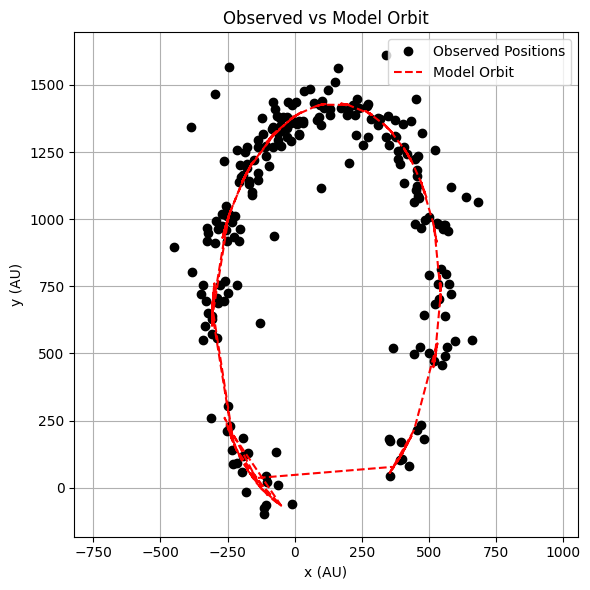

In [21]:
import matplotlib.pyplot as plt

x_AU = data["x_AU"].values
y_AU = data["y_AU"].values

plt.figure(figsize=(6, 6))
plt.plot(x_AU, y_AU, 'ko', label='Observed Positions')
plt.plot(x_model, y_model, 'r--', label='Model Orbit')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.title('Observed vs Model Orbit')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.tight_layout()
plt.savefig("orbit_trace.png", dpi=300)
plt.show()

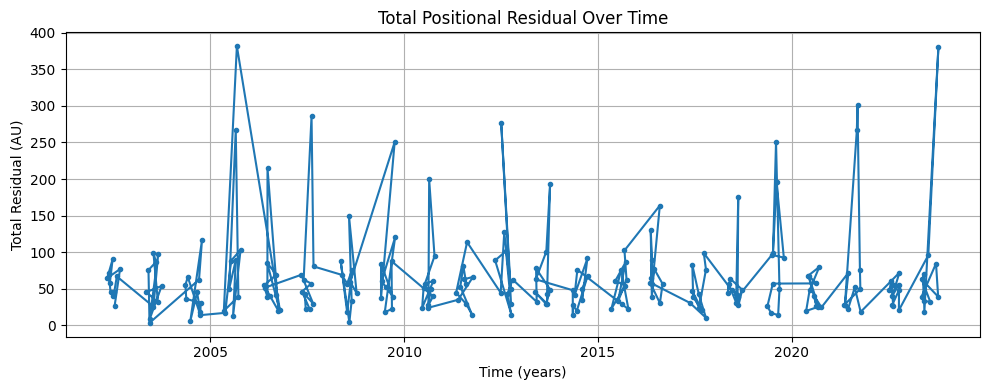

In [22]:
t_decimal = obs_times.decimalyear  # or use obs_times.jd if needed

plt.figure(figsize=(10, 4))
plt.plot(t_decimal, residuals_total, '.-')
plt.xlabel("Time (years)")
plt.ylabel("Total Residual (AU)")
plt.title("Total Positional Residual Over Time")
plt.grid(True)
plt.tight_layout()
plt.savefig("residuals_over_time.png", dpi=300)
plt.show()